In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

 🛒 L'objectif principal de cette analyse était de déterminer des axes d'amélioration pour optimiser les ventes 💰 et la rentabilité 💹 d'un de ces deux magasins.

📊 Dans cet article, je vais partager avec vous les résultats de cette analyse comparative, tout en précisant que j'ai anonymisé les noms des magasins afin de garantir la protection des données 🛡️.

"Les Magasins R" sont une chaîne de boucherie et de supérette bien établie dans la région toulousaine. Fondée il y a plusieurs années, cette entreprise est devenue un acteur clé de la distribution alimentaire dans la région. 🥩🛒 Elle propose une vaste gamme de produits régionaux, allant des viandes 🥩 aux articles d'épicerie 🛒.

###  Importation des Donnée nettoyé

Plusieurs problèmes ont été rencontré sur les données. A date, elles ont été retirées de l’analyse car au vu du faible volume, il a été estimé qu’elles n’auront pas d’impact sur le résultat de l’analyse. 

In [3]:
Mag1 = pd.read_csv('TABLE_csv/Mag2.csv')
# Renommer la colonne "Unnamed: 0" en "ID_df"
Mag1.rename(columns={'Unnamed: 0': 'index_df'}, inplace=True)
Mag1['Marge_brute'] = ((Mag1['PV_HT'] - Mag1['PA_BRUT']) / Mag1['PV_HT'])*100
Mag1['Marge_brute'] = Mag1['Marge_brute'].round(2)  # Arrondir à deux décimales
# Convertir la colonne 'DATE_MVT' en format datetime64 si nécessaire
Mag1['DATE_MVT'] = pd.to_datetime(Mag1['DATE_MVT'])
# Filtrer les données où la colonne Marge_brute n'est pas nulle
Mag1_filtered = Mag1.dropna(subset=['Marge_brute'])
# Filtrer les données où la colonne Marge_brute n'est pas infinie
Mag1 = Mag1_filtered[~Mag1_filtered['Marge_brute'].apply(lambda x: np.isinf(x))]
# Filtrer les données où la colonne TYP_MVT est CLI
Mag1 = Mag1[Mag1['TYP_MVT']=='CLI']
Mag1 = Mag1[Mag1['LIB_DEP']!= 'DEPART.DIVERS NON AFFEC.']

C:\Users\puech\AppData\Local\Temp\ipykernel_25584\67179287.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  Mag1 = pd.read_csv('TABLE_csv/Mag2.csv')


In [4]:
Mag2 = pd.read_csv('TABLE_csv/Mag2.csv')
# Renommer la colonne "Unnamed: 0" en "ID_df"
Mag2.rename(columns={'Unnamed: 0': 'index_df'}, inplace=True)
Mag2['Marge_brute'] = ((Mag2['PV_HT'] - Mag2['PA_BRUT']) / Mag2['PV_HT']) * 100
Mag2['Marge_brute'] = Mag2['Marge_brute'].round(2)  # Arrondir à deux décimales
# Convertir la colonne 'DATE_MVT' en format datetime64 si nécessaire
Mag2['DATE_MVT'] = pd.to_datetime(Mag2['DATE_MVT'])
# Filtrer les données où la colonne Marge_brute n'est pas nulle
Mag2_filtered = Mag2.dropna(subset=['Marge_brute'])
# Filtrer les données où la colonne Marge_brute n'est pas infinie
Mag2 = Mag2_filtered[~Mag2_filtered['Marge_brute'].apply(lambda x: np.isinf(x))]
# Filtrer les données où la colonne TYP_MVT est CLI
Mag2 = Mag2[Mag2['TYP_MVT']=='CLI']

C:\Users\puech\AppData\Local\Temp\ipykernel_25584\2000415164.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  Mag2 = pd.read_csv('TABLE_csv/Mag2.csv')


In [5]:
Mag1 = Mag1[Mag1['LIB_DEP']!= 'DEPART.DIVERS NON AFFEC.']

In [6]:
Mag1[Mag1['LIB_DEP']!= 'DEPART.DIVERS NON AFFEC.']

,index_df,ID_MAG,ID_ART,IND_MVT,TYP_MVT,LIBELLE,LIB_SFA,LIB_FAM,LIB_RAY,LIB_DEP,LIBMAG,ID_REFFOUR,DATE_MVT,PA_BRUT,PA_NET,PV_HT,PV_TTC,QTE_MVT,SFA,FAM,RAY,DEP,CODMAG,periode,montant ha,montant ca,Marge_brute
0,130345,1,39771,F,CLI,CHIPS BRETS INDIAN CURRY 125G,Chips,PLATS CUISINES A PREPARER,EPICERIE,E L D P H,G20 LANTA,74982.0,2022-03-16 12:00:00,1.090,1.09,1.52,1.6,1.0,10.0,24.0,1.0,1.0,100,202203,1.09,1.52000,28.29
1,130346,1,37063,F,CLI,CHIPS BREST CHEVRE PIMENT/ESPELET 125GRS,Chips,PLATS CUISINES A PREPARER,EPICERIE,E L D P H,G20 LANTA,70294.0,2022-03-01 12:00:00,0.920,0.92,1.52,1.6,1.0,10.0,24.0,1.0,1.0,100,202203,0.92,1.52000,39.47
2,130347,1,37063,F,CLI,CHIPS CHEVRE PIMENT BRETS,Chips,PLATS CUISINES A PREPARER,EPICERIE,E L D P H,G20 LANTA,70294.0,2022-03-01 12:00:00,0.920,0.92,1.52,1.6,1.0,10.0,24.0,1.0,1.0,100,202203,0.92,1.52000,39.47
3,130348,1,37063,F,CLI,CHIPS CHEVRE PIMENT BRETS,Chips,PLATS CUISINES A PREPARER,EPICERIE,E L D P H,G20 LANTA,70294.0,2022-03-01 12:00:00,0.920,0.92,1.52,1.6,1.0,10.0,24.0,1.0,1.0,100,202203,0.92,1.52000,39.47
4,130349,1,34398,F,CLI,CHIPS BARBECUE 125G BRETS,Chips,PLATS CUISINES A PREPARER,EPICERIE,E L D P H,G20 LANTA,73468.0,2022-03-02 12:00:00,0.920,0.92,1.52,1.6,1.0,10.0,24.0,1.0,1.0,100,202203,0.92,1.52000,39.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111053,4680810,1,60988,F,CLI,DEMARQUE CREMERIE 1.1?,Lait frais,CREMERIE FRAICHE,CREMERIE FROMAGE SURGELES,PRODUITS FRAIS,G20 LANTA,112506.0,2023-04-13 12:00:00,0.000,0.00,1.04,1.1,3.0,10.0,42.0,10.0,2.0,100,202304,0.00,3.12000,100.00
1111054,4680844,1,28785,F,CLI,OIGNONS FRAIS ÿAU KILO,legumes,FRUITS ET LEGUMES MAGASIN,FRUITS ET LEGUMES INVENTORIES,PRODUITS FRAIS,G20 LANTA,50897.0,2023-05-03 12:00:00,0.000,0.00,3.79,4.0,NaN,20.0,28.0,90.0,2.0,100,202305,0.00,0.90202,100.00
1111067,4680934,1,16672,QM,CLI,BAGUETTE,depot de pain,DEPOT DE PAIN,CREMERIE FROMAGE SURGELES,PRODUITS FRAIS,G20 LANTA,16674.0,2023-05-28 12:00:00,0.597,0.53,0.95,1.0,0.0,10.0,93.0,10.0,2.0,100,202305,0.00,0.00000,37.16
1111068,4680935,1,16672,QM,CLI,BAGUETTE,depot de pain,DEPOT DE PAIN,CREMERIE FROMAGE SURGELES,PRODUITS FRAIS,G20 LANTA,16674.0,2023-05-28 12:00:00,0.597,0.53,0.95,1.0,0.0,10.0,93.0,10.0,2.0,100,202305,0.00,0.00000,37.16


# Marges brutes

📊 La marge brute est un concept essentiel lorsqu'il s'agit d'analyser la rentabilité 💹 d'un commerce. Elle représente la différence entre le chiffre d'affaires généré par les ventes 🛒 et le coût direct de production ou d'acquisition des biens vendus 📦. En d'autres termes, c'est la somme d'argent qui reste après avoir couvert les coûts liés à la fabrication ou à l'achat des produits vendus, mais avant de déduire les frais généraux, les taxes et autres dépenses.

Pour le calculer, vous pouvez utiliser la formule Markdown suivante :

Marge Brute = Chiffre d'affaires - Coût des biens vendus

La marge brute est cruciale dans l'analyse de rentabilité car elle indique combien d'argent une entreprise génère réellement à partir de ses activités principales, sans prendre en compte les frais généraux. Une marge brute élevée signifie que l'entreprise peut couvrir ses coûts de production tout en dégageant un bénéfice substantiel, ce qui est un signe positif de rentabilité. À l'inverse, une marge brute faible peut indiquer que l'entreprise a du mal à réaliser un profit avec ses produits ou services, ce qui nécessite souvent une optimisation des coûts ou une révision de la stratégie de prix.

## Marge brute classement

#### Département

In [7]:
Mag1[Mag1['LIB_DEP']=='DEPART.DIVERS NON AFFEC.']["LIB_SFA"].value_counts()

Series([], Name: LIB_SFA, dtype: int64)

In [8]:
# Calculer la moyenne des marges brutes par famille de produits
Mag1.groupby('LIB_DEP')['Marge_brute'].mean().sort_values(ascending=False).reset_index()

,LIB_DEP,Marge_brute
0,BAZAR,40.835943
1,PRODUITS FRAIS,34.315503
2,E L D P H,28.588487
3,STATION,18.073446


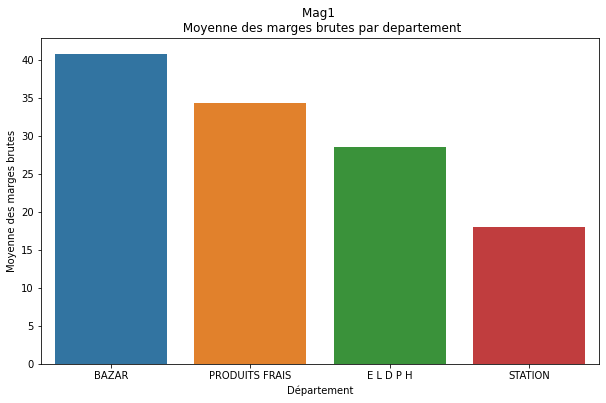

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x = Mag1.groupby('LIB_DEP')['Marge_brute'].mean().sort_values(ascending=False).reset_index()['LIB_DEP'], y=Mag1.groupby('LIB_DEP')['Marge_brute'].mean().sort_values(ascending=False).reset_index()['Marge_brute'])
plt.xlabel('Département')
plt.ylabel('Moyenne des marges brutes')
plt.title('Mag1 \n Moyenne des marges brutes par departement')
plt.show()

In [10]:
# Calculer la moyenne des marges brutes par famille de produits
Mag2.groupby('LIB_DEP')['Marge_brute'].mean().sort_values(ascending=False).reset_index()

,LIB_DEP,Marge_brute
0,BAZAR,40.835943
1,PRODUITS FRAIS,34.315503
2,E L D P H,28.588487
3,STATION,18.073446


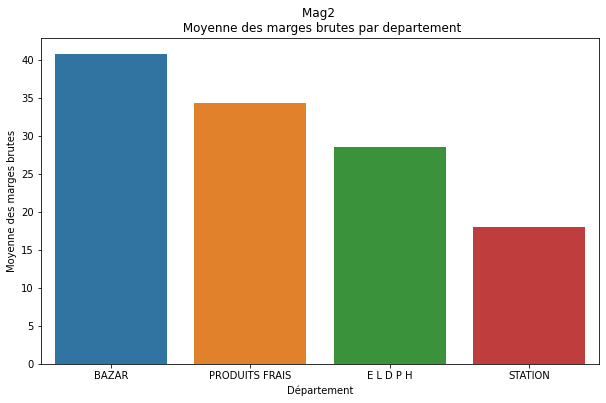

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x = Mag2.groupby('LIB_DEP')['Marge_brute'].mean().sort_values(ascending=False).reset_index()['LIB_DEP'], y=Mag2.groupby('LIB_DEP')['Marge_brute'].mean().sort_values(ascending=False).reset_index()['Marge_brute'])
plt.xlabel('Département')
plt.ylabel('Moyenne des marges brutes')
plt.title('Mag2 \n Moyenne des marges brutes par departement')
plt.show()

#### Rayon

In [12]:
# Calculer la moyenne des marges brutes par famille de produits
Mag1.groupby('LIB_RAY')['Marge_brute'].mean().sort_values(ascending=False).reset_index()

,LIB_RAY,Marge_brute
0,RAYON TRAD VIANDES INVENTORIEES,49.907918
1,MARCHANDISE GENERALE,41.221883
2,FROMAGE COUPE INVENTORIE,41.052886
3,FRUITS ET LEGUMES INVENTORIES,40.007363
4,PRODUITS FRAIS,35.219032
5,DIVERS,33.671095
6,VIANDES CHARC VOLAILLE TRAIT LS,33.288579
7,D P H,32.820175
8,EPICERIE,28.773340
9,LIQUIDES,26.605110


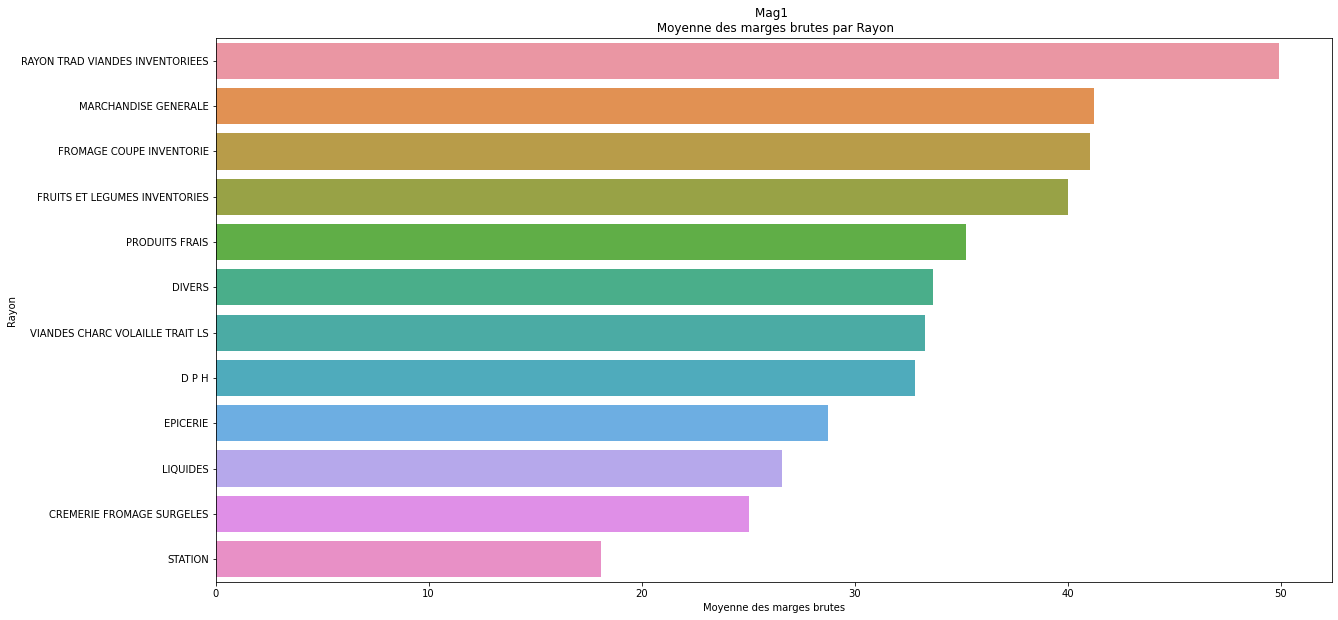

In [13]:
plt.figure(figsize=(20, 10))
sns.barplot(x =Mag1.groupby('LIB_RAY')['Marge_brute'].mean().sort_values(ascending=False).reset_index()['Marge_brute'], y=Mag1.groupby('LIB_RAY')['Marge_brute'].mean().sort_values(ascending=False).reset_index()['LIB_RAY'])
plt.ylabel('Rayon')
plt.xlabel('Moyenne des marges brutes')
plt.title('Mag1 \n Moyenne des marges brutes par Rayon')
plt.show()

In [14]:
# Calculer la moyenne des marges brutes par famille de produits
Mag2.groupby('LIB_RAY')['Marge_brute'].mean().sort_values(ascending=False).reset_index()

,LIB_RAY,Marge_brute
0,RAYON TRAD VIANDES INVENTORIEES,49.907918
1,MARCHANDISE GENERALE,41.221883
2,FROMAGE COUPE INVENTORIE,41.052886
3,FRUITS ET LEGUMES INVENTORIES,40.007363
4,PRODUITS FRAIS,35.219032
5,DIVERS,33.671095
6,VIANDES CHARC VOLAILLE TRAIT LS,33.288579
7,D P H,32.820175
8,EPICERIE,28.773340
9,LIQUIDES,26.605110


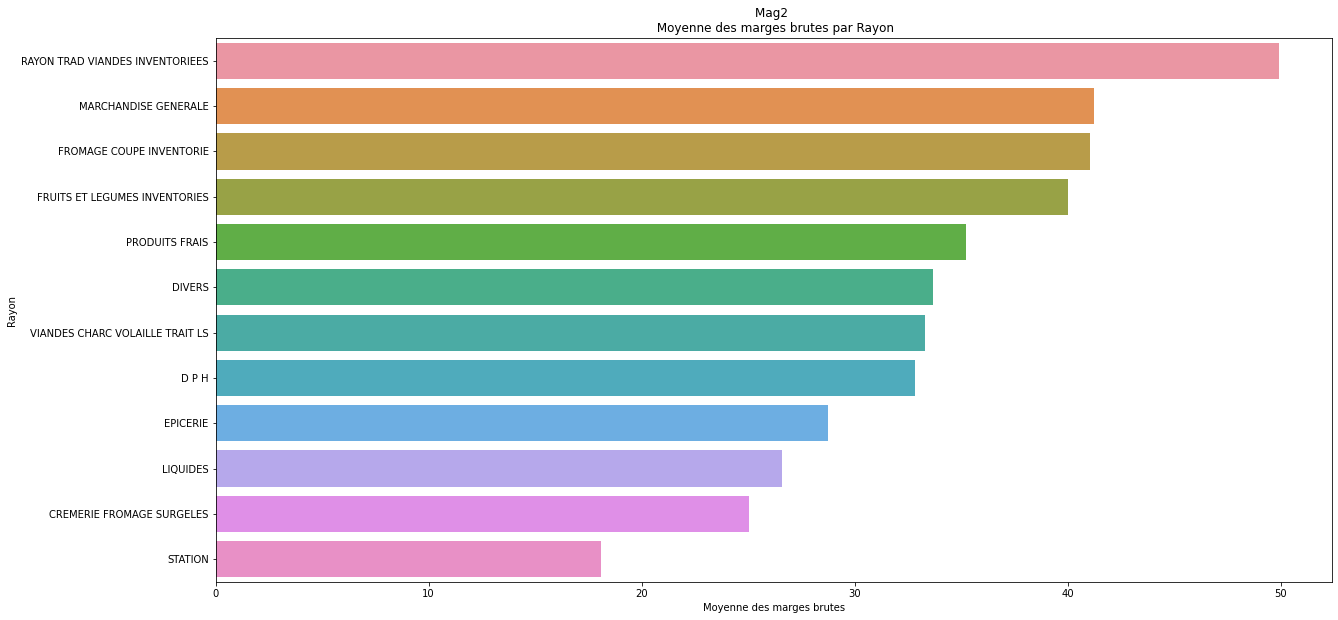

In [15]:
plt.figure(figsize=(20, 10))
sns.barplot(x = Mag2.groupby('LIB_RAY')['Marge_brute'].mean().sort_values(ascending=False).reset_index()['Marge_brute'], y=Mag2.groupby('LIB_RAY')['Marge_brute'].mean().sort_values(ascending=False).reset_index()['LIB_RAY'])
plt.ylabel('Rayon')
plt.xlabel('Moyenne des marges brutes')
plt.title('Mag2 \n Moyenne des marges brutes par Rayon')
plt.show()

#### Famille

In [16]:
# Calculer la moyenne des marges brutes par famille de produits
Mag1.groupby('LIB_FAM')['Marge_brute'].mean().sort_values(ascending=False).reset_index().head(10)

,LIB_FAM,Marge_brute
0,DEPOT VENTE,58.519494
1,BIJOUTERIE-HORLOGERIE-FANTAISI,50.928140
2,BOUCHERIE TRAD,49.907918
3,ECLAIRAGE & ELECTRICITE,47.334407
4,PAPETERIE,46.706747
5,EPICES & POIVRES,46.460479
6,PLEIN AIR,45.815222
7,ARTICLES DE MENAGE,45.114287
8,LEGUMES RECAFOUR,43.608366
9,JARDINAGE,42.388492


In [17]:
# Calculer la moyenne des marges brutes par famille de produits
Mag1.groupby('LIB_FAM')['Marge_brute'].mean().sort_values(ascending=False).reset_index().tail(10)

,LIB_FAM,Marge_brute
71,BIERES - CIDRES & PANCHES,23.057465
72,FROMAGES,23.016291
73,PRODUIT POUR PETIT DEJEUNERS,22.517656
74,PETIT ELECTRO MENAGER,20.980000
75,CHAMPAGNES & MOUSSEUX,20.601841
76,CAFE - CHICOREE - MALT,19.910000
77,GAZ,18.900100
78,PRODUITS DIETETIQUES PR ENFANT,18.197313
79,LIBRAIRIE,0.000000
80,CONSIGNES GAZ EXO,-1.472034


In [18]:
mb_fam_df = Mag1.groupby('LIB_FAM')['Marge_brute'].mean().sort_values(ascending=False).reset_index()


In [19]:
# Calculer la moyenne des marges brutes par famille de produits
Mag2.groupby('LIB_FAM')['Marge_brute'].mean().sort_values(ascending=False).reset_index().head(10)

,LIB_FAM,Marge_brute
0,DEPOT VENTE,58.519494
1,BIJOUTERIE-HORLOGERIE-FANTAISI,50.928140
2,BOUCHERIE TRAD,49.907918
3,ECLAIRAGE & ELECTRICITE,47.334407
4,PAPETERIE,46.706747
5,EPICES & POIVRES,46.460479
6,PLEIN AIR,45.815222
7,ARTICLES DE MENAGE,45.114287
8,LEGUMES RECAFOUR,43.608366
9,JARDINAGE,42.388492


In [20]:
# Calculer la moyenne des marges brutes par famille de produits
Mag2.groupby('LIB_FAM')['Marge_brute'].mean().sort_values(ascending=False).reset_index().tail(10)

,LIB_FAM,Marge_brute
71,BIERES - CIDRES & PANCHES,23.057465
72,FROMAGES,23.016291
73,PRODUIT POUR PETIT DEJEUNERS,22.517656
74,PETIT ELECTRO MENAGER,20.980000
75,CHAMPAGNES & MOUSSEUX,20.601841
76,CAFE - CHICOREE - MALT,19.910000
77,GAZ,18.900100
78,PRODUITS DIETETIQUES PR ENFANT,18.197313
79,LIBRAIRIE,0.000000
80,CONSIGNES GAZ EXO,-1.472034


#### Sous Famille

In [21]:
# Calculer la moyenne des marges brutes par sous famille de produits
Mag1.groupby('LIB_SFA')['Marge_brute'].mean().sort_values(ascending=False).reset_index().head(10)

,LIB_SFA,Marge_brute
0,dmarque,92.409176
1,Lait frais,88.211196
2,Maquillage du visage,62.976250
3,Boules et disques dmaquille,60.759864
4,ECOGAN,59.914211
5,PORC,58.073248
6,Papiers cadeaux,57.884515
7,Gants caoutchouc,57.670000
8,Cirages en botes,57.440000
9,TRIPERIE,56.178792


In [22]:
# Calculer la moyenne des marges brutes par sous famille de produits
Mag1.groupby('LIB_SFA')['Marge_brute'].mean().sort_values(ascending=False).reset_index().tail(10)

,LIB_SFA,Marge_brute
597,Rtis de dinde,8.668333
598,Autres ptes fraches,8.660000
599,Maquillage des yeux,7.354500
600,A l'huile,6.912432
601,Coquillages,5.160000
602,divers librairie,0.000000
603,divers charcuterie salaison,0.000000
604,CONSIGNES GAZ EXO,-1.472034
605,Canards,-1.474000
606,"Pts fins (alouette,canard,fo",-12.326923


In [23]:
# Calculer la moyenne des marges brutes par sous famille de produits
Mag2.groupby('LIB_SFA')['Marge_brute'].mean().sort_values(ascending=False).reset_index().head(10)

,LIB_SFA,Marge_brute
0,dmarque,92.409176
1,Lait frais,88.211196
2,Maquillage du visage,62.976250
3,Boules et disques dmaquille,60.759864
4,ECOGAN,59.914211
5,PORC,58.073248
6,Papiers cadeaux,57.884515
7,Gants caoutchouc,57.670000
8,Cirages en botes,57.440000
9,TRIPERIE,56.178792


In [24]:
# Calculer la moyenne des marges brutes par sous famille de produits
Mag2.groupby('LIB_SFA')['Marge_brute'].mean().sort_values(ascending=False).reset_index().tail(10)

,LIB_SFA,Marge_brute
597,Rtis de dinde,8.668333
598,Autres ptes fraches,8.660000
599,Maquillage des yeux,7.354500
600,A l'huile,6.912432
601,Coquillages,5.160000
602,divers librairie,0.000000
603,divers charcuterie salaison,0.000000
604,CONSIGNES GAZ EXO,-1.472034
605,Canards,-1.474000
606,"Pts fins (alouette,canard,fo",-12.326923


In [25]:
Mag1.groupby('ID_ART')['Marge_brute'].mean().sort_values(ascending=False).reset_index().head(10)

,ID_ART,Marge_brute
0,60988,100.000000
1,56606,100.000000
2,56607,100.000000
3,28785,100.000000
4,43912,99.943333
5,17712,97.870000
6,22138,96.480000
7,22137,95.780000
8,22142,95.780000
9,22136,94.740000


In [26]:
Mag1.groupby('ID_ART')['Marge_brute'].mean().sort_values(ascending=False).reset_index().tail(10)

,ID_ART,Marge_brute
7752,57940,-24.140000
7753,58840,-24.350000
7754,45637,-24.350000
7755,61190,-25.190000
7756,61189,-25.190000
7757,54677,-25.500000
7758,61121,-25.500000
7759,808,-28.160000
7760,46237,-29.046667
7761,12212,-105.585333


In [27]:
Mag2.groupby('ID_ART')['Marge_brute'].mean().sort_values(ascending=False).reset_index().head(10)

,ID_ART,Marge_brute
0,60988,100.000000
1,56606,100.000000
2,56607,100.000000
3,28785,100.000000
4,43912,99.943333
5,17712,97.870000
6,22138,96.480000
7,22137,95.780000
8,22142,95.780000
9,22136,94.740000


In [28]:
Mag2.groupby('ID_ART')['Marge_brute'].mean().sort_values(ascending=False).reset_index().tail(10)

,ID_ART,Marge_brute
7752,57940,-24.140000
7753,58840,-24.350000
7754,45637,-24.350000
7755,61190,-25.190000
7756,61189,-25.190000
7757,54677,-25.500000
7758,61121,-25.500000
7759,808,-28.160000
7760,46237,-29.046667
7761,12212,-105.585333


## Marges brutes négatives

### Mag1

In [29]:
Mag1.shape

(827895, 27)

In [30]:
Mag1_marge_neg = Mag1[Mag1['Marge_brute'] < 0].sort_values(by='Marge_brute', ascending=False)
Mag1_marge_neg['Marge_brute'].describe()

count    5031.000000
mean      -17.905679
std        45.020408
min     -1859.090000
25%       -21.600000
50%       -12.670000
75%        -5.600000
max        -0.040000
Name: Marge_brute, dtype: float64

In [31]:
Mag1_marge_neg.groupby('ID_ART')['Marge_brute'].mean().sort_values(ascending=True).reset_index().head(10)

,ID_ART,Marge_brute
0,12212,-949.060
1,59318,-361.124
2,39486,-227.625
3,60239,-124.230
4,52048,-119.080
5,2757,-115.170
6,7851,-112.540
7,14521,-111.700
8,52043,-98.940
9,48486,-98.900


In [32]:
Mag1_marge_neg.groupby('ID_ART')['Marge_brute'].mean().sort_values(ascending=True).reset_index().tail(10)

,ID_ART,Marge_brute
760,59708,-0.43
761,59626,-0.40
762,56949,-0.36
763,57060,-0.31
764,1967,-0.26
765,48328,-0.24
766,31543,-0.15
767,48483,-0.12
768,42525,-0.09
769,689,-0.06


In [33]:
Mag1_marge_neg.groupby('ID_ART')['Marge_brute'].mean().sort_values(ascending=True).reset_index().shape

(770, 2)

In [34]:
Mag1_marge_neg.groupby('LIB_DEP')['Marge_brute'].mean().sort_values(ascending=True).reset_index()

,LIB_DEP,Marge_brute
0,E L D P H,-19.258724
1,STATION,-15.501111
2,PRODUITS FRAIS,-14.753454
3,BAZAR,-13.706316


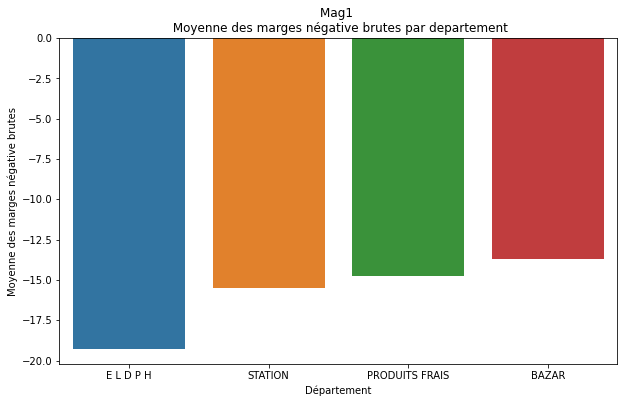

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x = Mag1_marge_neg.groupby('LIB_DEP')['Marge_brute'].mean().sort_values(ascending=True).reset_index()['LIB_DEP'], y=Mag1_marge_neg.groupby('LIB_DEP')['Marge_brute'].mean().sort_values(ascending=True).reset_index()['Marge_brute'])
plt.xlabel('Département')
plt.ylabel('Moyenne des marges négative brutes')
plt.title('Mag1 \n Moyenne des marges négative brutes par departement')
plt.show()

In [36]:
Mag1_marge_neg.groupby('LIB_RAY')['Marge_brute'].mean().sort_values(ascending=True).reset_index()

,LIB_RAY,Marge_brute
0,D P H,-24.864626
1,FRUITS ET LEGUMES INVENTORIES,-24.719373
2,LIQUIDES,-18.326139
3,EPICERIE,-17.589036
4,CREMERIE FROMAGE SURGELES,-16.147997
5,STATION,-15.501111
6,MARCHANDISE GENERALE,-13.706316
7,VIANDES CHARC VOLAILLE TRAIT LS,-8.237977
8,PRODUITS FRAIS,-4.355000
9,RAYON TRAD VIANDES INVENTORIEES,-3.920000


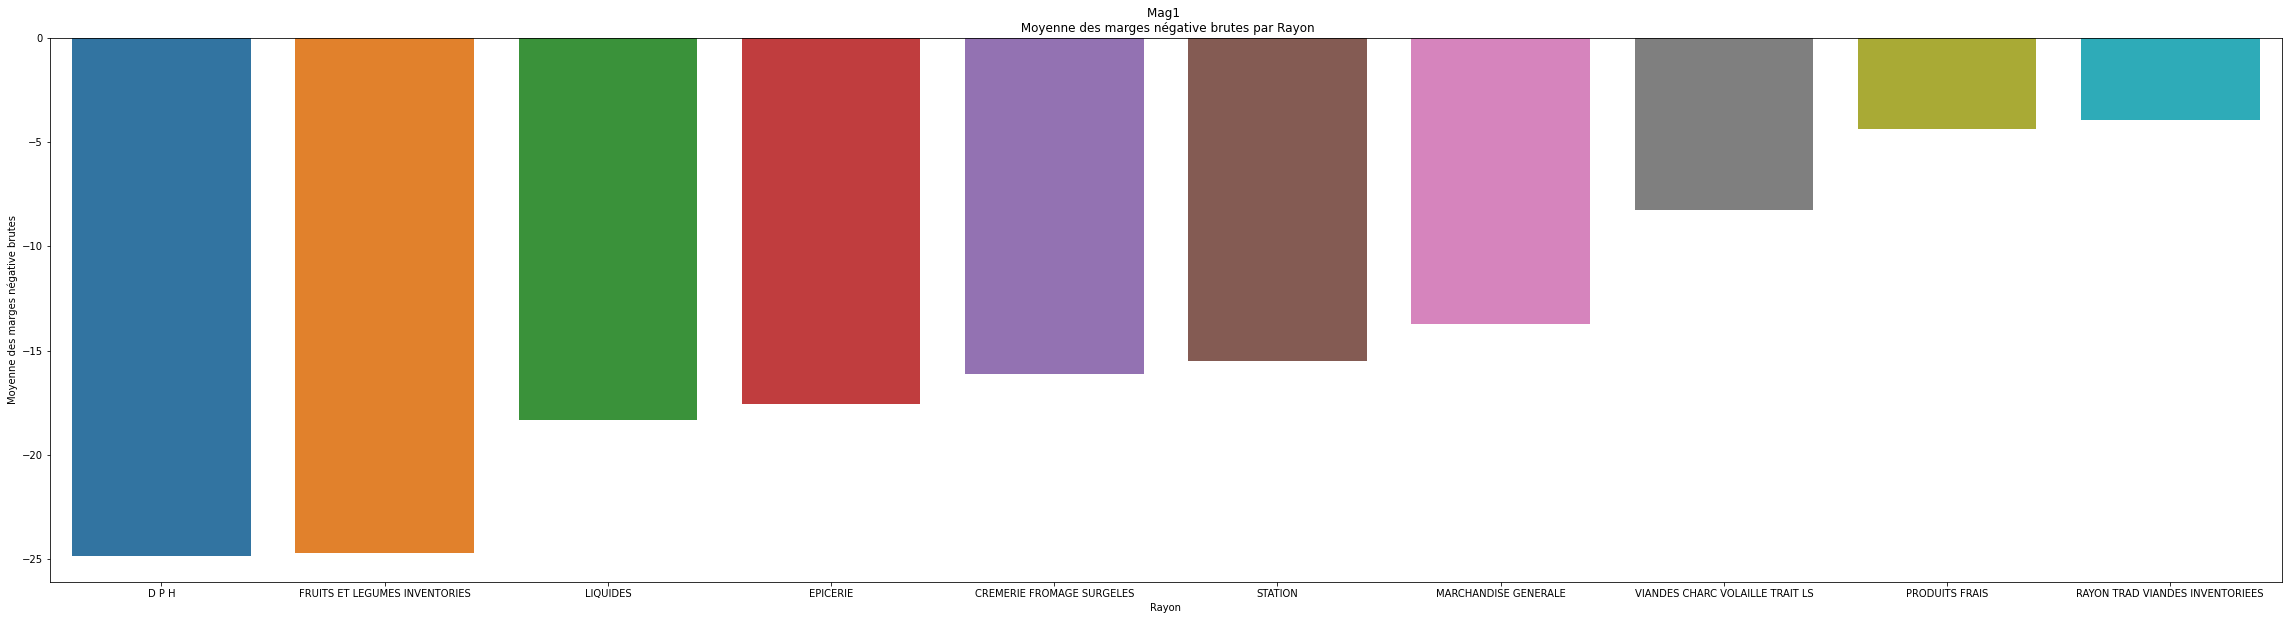

In [37]:
plt.figure(figsize=(40, 10))
sns.barplot(x = Mag1_marge_neg.groupby('LIB_RAY')['Marge_brute'].mean().sort_values(ascending=True).reset_index()['LIB_RAY'], y=Mag1_marge_neg.groupby('LIB_RAY')['Marge_brute'].mean().sort_values(ascending=True).reset_index()['Marge_brute'])
plt.xlabel('Rayon')
plt.ylabel('Moyenne des marges négative brutes')
plt.title('Mag1 \n Moyenne des marges négative brutes par Rayon')
plt.show()

In [38]:
Mag1_marge_neg.groupby('LIB_FAM')['Marge_brute'].mean().sort_values(ascending=True).reset_index().head(10)

,LIB_FAM,Marge_brute
0,CHAMPAGNES & MOUSSEUX,-86.479091
1,EAUX MINERALES,-81.881852
2,SOINS DU CORPS,-54.194167
3,CONSIGNES GAZ EXO,-28.950000
4,BEAUTE DU CORPS ET DU VISAGE,-28.656111
5,CREMERIE FRAICHE,-28.352766
6,CONFISERIE DE SUCRE,-27.363846
7,PRODUITS DIETETIQUES,-26.714667
8,SOIN ET BEAUTE DE LA CHEVELURE,-24.966667
9,FRUITS ET LEGUMES MAGASIN,-24.719373


In [39]:
Mag1_marge_neg.groupby('LIB_FAM')['Marge_brute'].mean().sort_values(ascending=True).reset_index().tail(10)

,LIB_FAM,Marge_brute
45,TRAITEUR,-5.023696
46,LAITS DE CONSERVES,-4.870000
47,FRUITS RECAFOUR,-4.355000
48,BOUCHERIE TRAD,-3.920000
49,THES ET INFUSIONS,-3.782353
50,HUILES,-3.731944
51,ALCOOLS-EAUX DE VIE & LIQUEURS,-3.725294
52,SELS,-3.330000
53,VINAIGRES,-1.060000
54,PAINS & PATISSERIE FRAICHE,-0.740000


In [40]:
Mag1_marge_neg.groupby('LIB_SFA')['Marge_brute'].mean().sort_values(ascending=True).reset_index().head(10)

,LIB_SFA,Marge_brute
0,"Savons crmes,mousses raser,",-949.060000
1,Eaux de table plates,-361.124000
2,Mousseux trangers,-184.216000
3,Fromages frais aromatiss,-76.755000
4,Biscuits secs ordinaires,-72.170000
5,Bombes pr faciliter le repass.,-63.820000
6,Aux fruits,-53.669677
7,A boire,-51.840000
8,Croissants et ptes tarte,-43.880000
9,Potages en sachets dshydrats,-43.230000


In [41]:
Mag1_marge_neg.groupby('LIB_SFA')['Marge_brute'].mean().sort_values(ascending=True).reset_index().tail(10)

,LIB_SFA,Marge_brute
196,Ptes armatises et exotiques,-1.367143
197,Filets,-1.350000
198,brebis,-1.336667
199,Autres chvres,-1.120000
200,"Vinaigre spciaux (ail,estrago",-1.060000
201,Gins et alcools tangers,-0.960000
202,Pains courants,-0.740000
203,Alcools fantaisies & de prpar,-0.430000
204,Dcoupe de poulet,-0.310000
205,Jus fruits frais,-0.090000


### Mag2

In [42]:
Mag2.shape

(827895, 27)

In [43]:
Mag2_marge_neg = Mag2[Mag2['Marge_brute'] < 0].sort_values(by='Marge_brute', ascending=False)

In [44]:
Mag2_marge_neg['Marge_brute'].describe()

count    5031.000000
mean      -17.905679
std        45.020408
min     -1859.090000
25%       -21.600000
50%       -12.670000
75%        -5.600000
max        -0.040000
Name: Marge_brute, dtype: float64

In [45]:
Mag2_marge_neg.groupby('ID_ART')['Marge_brute'].mean().sort_values(ascending=True).reset_index().head(10)

,ID_ART,Marge_brute
0,12212,-949.060
1,59318,-361.124
2,39486,-227.625
3,60239,-124.230
4,52048,-119.080
5,2757,-115.170
6,7851,-112.540
7,14521,-111.700
8,52043,-98.940
9,48486,-98.900


In [46]:
Mag2_marge_neg.groupby('ID_ART')['Marge_brute'].mean().sort_values(ascending=True).reset_index().tail(10)

,ID_ART,Marge_brute
760,59708,-0.43
761,59626,-0.40
762,56949,-0.36
763,57060,-0.31
764,1967,-0.26
765,48328,-0.24
766,31543,-0.15
767,48483,-0.12
768,42525,-0.09
769,689,-0.06


In [47]:
Mag2_marge_neg.groupby('ID_ART')['Marge_brute'].mean().sort_values(ascending=True).reset_index().shape

(770, 2)

In [48]:
Mag2_marge_neg.groupby('LIB_DEP')['Marge_brute'].mean().sort_values(ascending=True).reset_index()

,LIB_DEP,Marge_brute
0,E L D P H,-19.258724
1,STATION,-15.501111
2,PRODUITS FRAIS,-14.753454
3,BAZAR,-13.706316


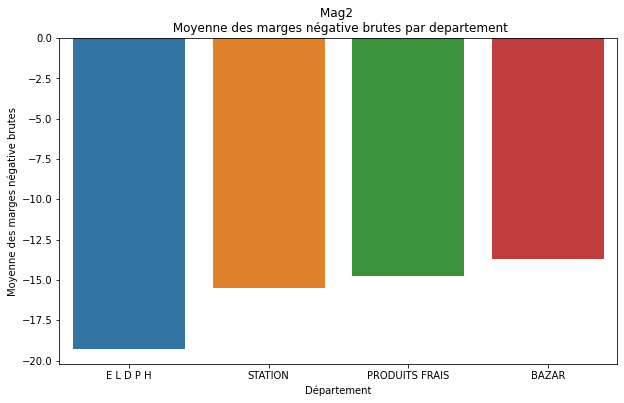

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x = Mag2_marge_neg.groupby('LIB_DEP')['Marge_brute'].mean().sort_values(ascending=True).reset_index()['LIB_DEP'], y=Mag2_marge_neg.groupby('LIB_DEP')['Marge_brute'].mean().sort_values(ascending=True).reset_index()['Marge_brute'])
plt.xlabel('Département')
plt.ylabel('Moyenne des marges négative brutes')
plt.title('Mag2 \n Moyenne des marges négative brutes par departement')
plt.show()

In [50]:
Mag2_marge_neg.groupby('LIB_RAY')['Marge_brute'].mean().sort_values(ascending=True).reset_index()

,LIB_RAY,Marge_brute
0,D P H,-24.864626
1,FRUITS ET LEGUMES INVENTORIES,-24.719373
2,LIQUIDES,-18.326139
3,EPICERIE,-17.589036
4,CREMERIE FROMAGE SURGELES,-16.147997
5,STATION,-15.501111
6,MARCHANDISE GENERALE,-13.706316
7,VIANDES CHARC VOLAILLE TRAIT LS,-8.237977
8,PRODUITS FRAIS,-4.355000
9,RAYON TRAD VIANDES INVENTORIEES,-3.920000


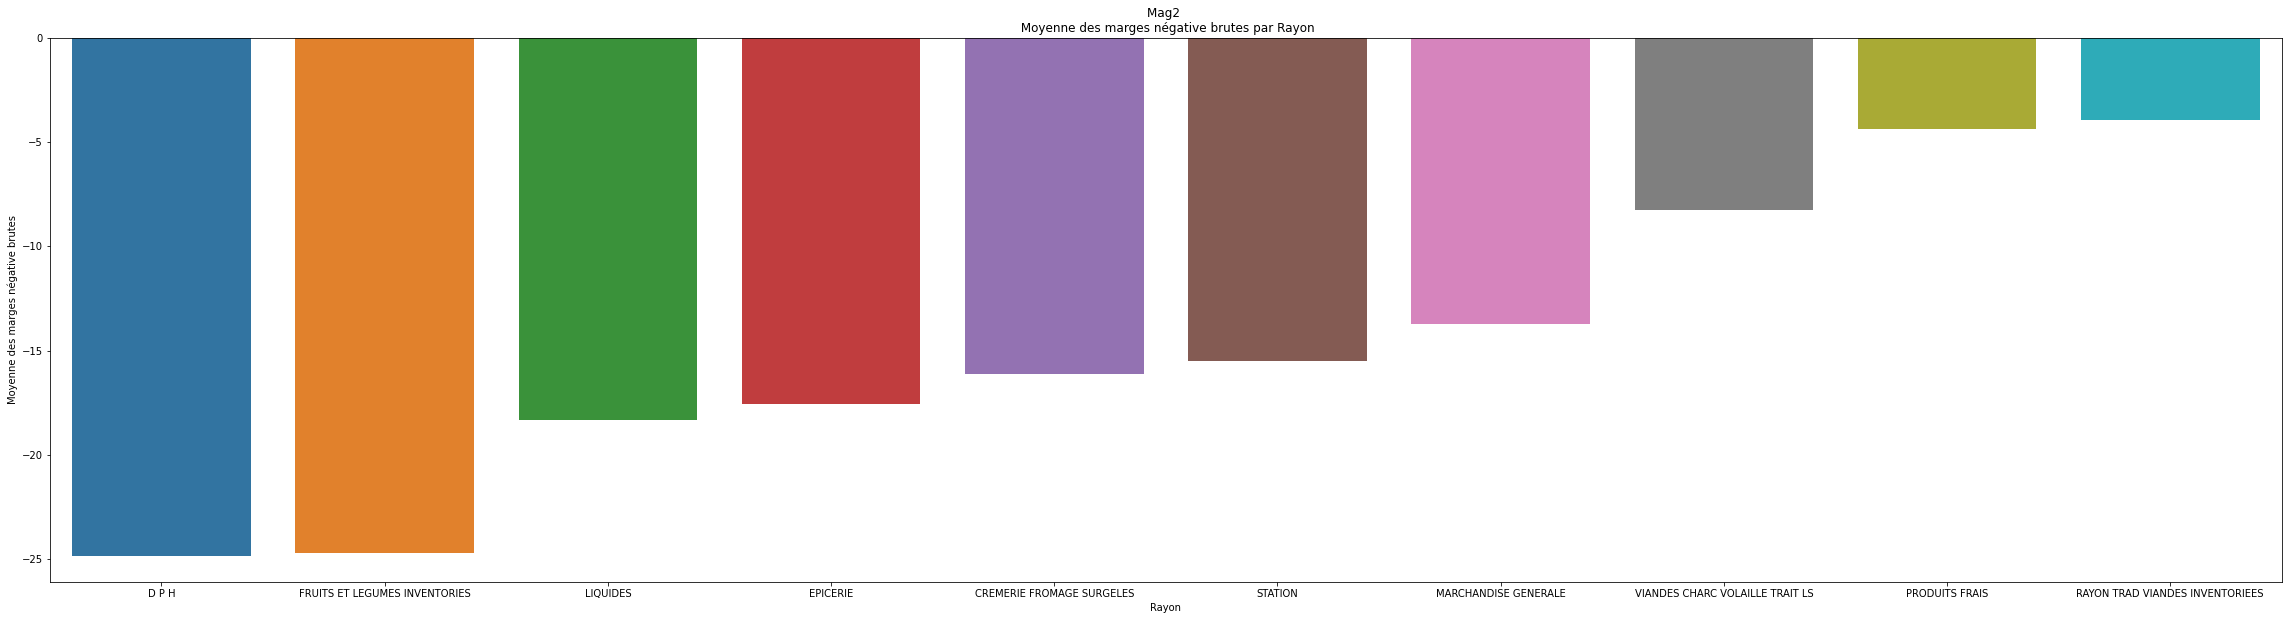

In [51]:
plt.figure(figsize=(40, 10))
sns.barplot(x = Mag2_marge_neg.groupby('LIB_RAY')['Marge_brute'].mean().sort_values(ascending=True).reset_index()['LIB_RAY'], y=Mag2_marge_neg.groupby('LIB_RAY')['Marge_brute'].mean().sort_values(ascending=True).reset_index()['Marge_brute'])
plt.xlabel('Rayon')
plt.ylabel('Moyenne des marges négative brutes')
plt.title('Mag2 \n Moyenne des marges négative brutes par Rayon')
plt.show()

In [52]:
Mag2_marge_neg.groupby('LIB_FAM')['Marge_brute'].mean().sort_values(ascending=True).reset_index().head(10)

,LIB_FAM,Marge_brute
0,CHAMPAGNES & MOUSSEUX,-86.479091
1,EAUX MINERALES,-81.881852
2,SOINS DU CORPS,-54.194167
3,CONSIGNES GAZ EXO,-28.950000
4,BEAUTE DU CORPS ET DU VISAGE,-28.656111
5,CREMERIE FRAICHE,-28.352766
6,CONFISERIE DE SUCRE,-27.363846
7,PRODUITS DIETETIQUES,-26.714667
8,SOIN ET BEAUTE DE LA CHEVELURE,-24.966667
9,FRUITS ET LEGUMES MAGASIN,-24.719373


In [53]:
Mag2_marge_neg.groupby('LIB_FAM')['Marge_brute'].mean().sort_values(ascending=True).reset_index().tail(10)

,LIB_FAM,Marge_brute
45,TRAITEUR,-5.023696
46,LAITS DE CONSERVES,-4.870000
47,FRUITS RECAFOUR,-4.355000
48,BOUCHERIE TRAD,-3.920000
49,THES ET INFUSIONS,-3.782353
50,HUILES,-3.731944
51,ALCOOLS-EAUX DE VIE & LIQUEURS,-3.725294
52,SELS,-3.330000
53,VINAIGRES,-1.060000
54,PAINS & PATISSERIE FRAICHE,-0.740000


In [54]:
Mag2_marge_neg.groupby('LIB_SFA')['Marge_brute'].mean().sort_values(ascending=True).reset_index().head(10)

,LIB_SFA,Marge_brute
0,"Savons crmes,mousses raser,",-949.060000
1,Eaux de table plates,-361.124000
2,Mousseux trangers,-184.216000
3,Fromages frais aromatiss,-76.755000
4,Biscuits secs ordinaires,-72.170000
5,Bombes pr faciliter le repass.,-63.820000
6,Aux fruits,-53.669677
7,A boire,-51.840000
8,Croissants et ptes tarte,-43.880000
9,Potages en sachets dshydrats,-43.230000


In [55]:
Mag2_marge_neg.groupby('LIB_SFA')['Marge_brute'].mean().sort_values(ascending=True).reset_index().tail(10)

,LIB_SFA,Marge_brute
196,Ptes armatises et exotiques,-1.367143
197,Filets,-1.350000
198,brebis,-1.336667
199,Autres chvres,-1.120000
200,"Vinaigre spciaux (ail,estrago",-1.060000
201,Gins et alcools tangers,-0.960000
202,Pains courants,-0.740000
203,Alcools fantaisies & de prpar,-0.430000
204,Dcoupe de poulet,-0.310000
205,Jus fruits frais,-0.090000


## Les plus grandes différences de marge 

#### Département

In [56]:
Mag1_dep_marge = Mag1.groupby('LIB_DEP')[['Marge_brute']].mean()

In [57]:
Mag2_dep_marge = Mag2.groupby('LIB_DEP')[['Marge_brute']].mean()

In [58]:
# Fusionner les deux DataFrames sur la colonne 'ID_ART'
merged_dep_marge = Mag1_dep_marge.merge(Mag2_dep_marge, on='LIB_DEP', suffixes=('_Mag1', '_Mag2'), how='inner')
# Créer une nouvelle colonne avec la différence de marge brute
merged_dep_marge['Difference_Marge'] = merged_dep_marge['Marge_brute_Mag1'] - merged_dep_marge['Marge_brute_Mag2']
merged_dep_marge.sort_values(by='Difference_Marge', ascending=False)

,Marge_brute_Mag1,Marge_brute_Mag2,Difference_Marge
LIB_DEP,,,
BAZAR,40.835943,40.835943,0.0
E L D P H,28.588487,28.588487,0.0
PRODUITS FRAIS,34.315503,34.315503,0.0
STATION,18.073446,18.073446,0.0


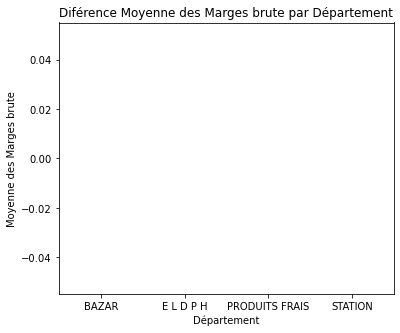

In [59]:
plt.figure(figsize=(6, 5))
sns.barplot(y = merged_dep_marge['Difference_Marge'], x=merged_dep_marge.index)
plt.xlabel('Département')
plt.ylabel("Moyenne des Marges brute")
plt.title("Diférence Moyenne des Marges brute par Département")
plt.show()

#### Rayon

In [60]:
Mag1_ray_marge = Mag1.groupby('LIB_RAY')[['Marge_brute']].mean()

In [61]:
Mag2_ray_marge = Mag2.groupby('LIB_RAY')[['Marge_brute']].mean()

In [62]:
# Fusionner les deux DataFrames sur la colonne 'ID_ART'
merged_ray_marge = Mag1_ray_marge.merge(Mag2_ray_marge, on='LIB_RAY', suffixes=('_Mag1', '_Mag2'), how='inner')
# Créer une nouvelle colonne avec la différence de marge brute
merged_ray_marge['Difference_Marge'] = merged_ray_marge['Marge_brute_Mag1'] - merged_ray_marge['Marge_brute_Mag2']
merged_ray_marge.sort_values(by='Difference_Marge', ascending=False)

,Marge_brute_Mag1,Marge_brute_Mag2,Difference_Marge
LIB_RAY,,,
CREMERIE FROMAGE SURGELES,25.037130,25.037130,0.0
D P H,32.820175,32.820175,0.0
DIVERS,33.671095,33.671095,0.0
EPICERIE,28.773340,28.773340,0.0
FROMAGE COUPE INVENTORIE,41.052886,41.052886,0.0
FRUITS ET LEGUMES INVENTORIES,40.007363,40.007363,0.0
LIQUIDES,26.605110,26.605110,0.0
MARCHANDISE GENERALE,41.221883,41.221883,0.0
PRODUITS FRAIS,35.219032,35.219032,0.0


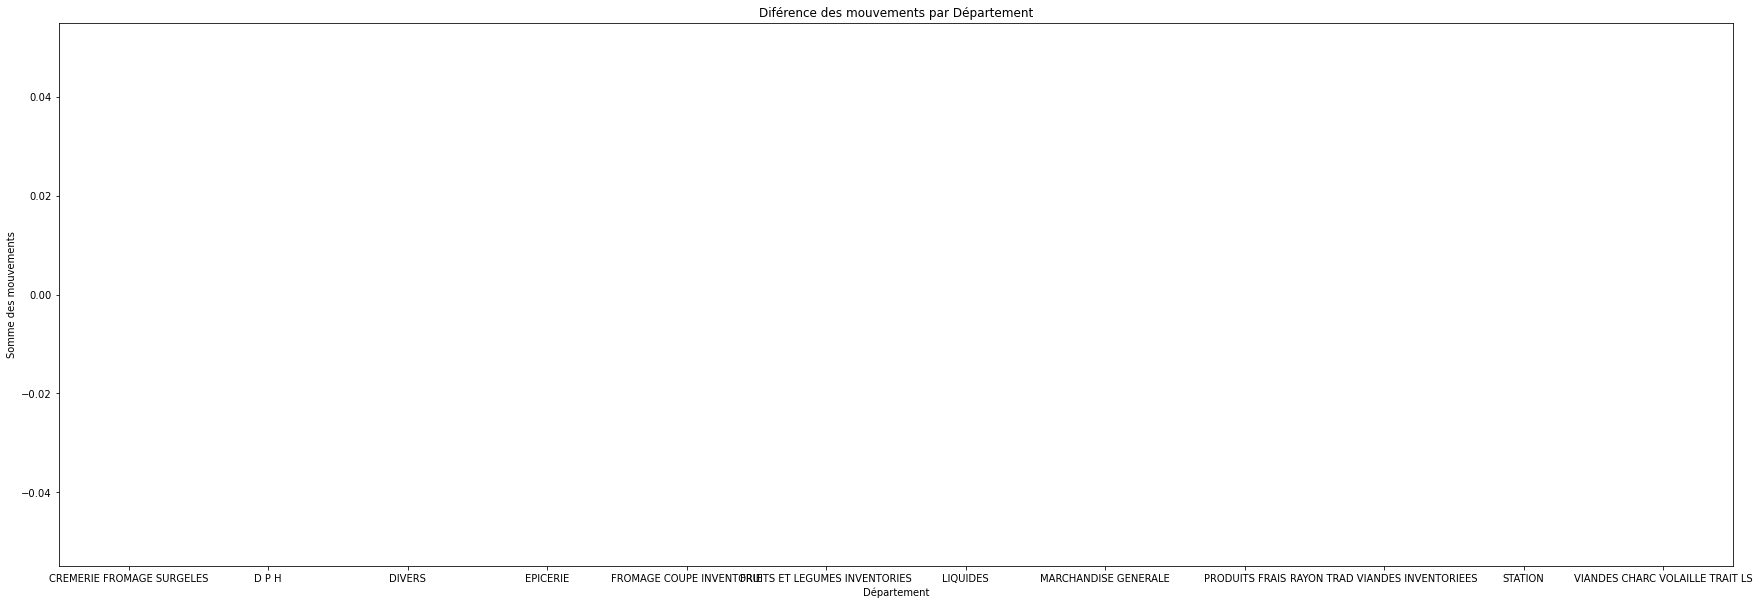

In [63]:
plt.figure(figsize=(30, 10))
sns.barplot(y = merged_ray_marge['Difference_Marge'], x=merged_ray_marge.index)
plt.xlabel('Département')
plt.ylabel("Somme des mouvements")
plt.title("Diférence des mouvements par Département")
plt.show()

#### Famille

In [64]:
Mag1_fam_marge = Mag1.groupby('LIB_FAM')[['Marge_brute']].mean()

In [65]:
Mag2_fam_marge = Mag2.groupby('LIB_FAM')[['Marge_brute']].mean()

In [66]:
# Fusionner les deux DataFrames sur la colonne 'ID_ART'
merged_fam_marge = Mag1_fam_marge.merge(Mag2_fam_marge, on='LIB_FAM', suffixes=('_Mag1', '_Mag2'), how='inner')
# Créer une nouvelle colonne avec la différence de marge brute
merged_fam_marge['Difference_Marge'] = merged_fam_marge['Marge_brute_Mag1'] - merged_fam_marge['Marge_brute_Mag2']
merged_fam_marge.sort_values(by='Difference_Marge', ascending=False).head(10)

,Marge_brute_Mag1,Marge_brute_Mag2,Difference_Marge
LIB_FAM,,,
ALCOOLS-EAUX DE VIE & LIQUEURS,25.725393,25.725393,0.0
FRUITS - LEGUMES SECS - RIZ,36.487210,36.487210,0.0
PETIT ELECTRO MENAGER,20.980000,20.980000,0.0
PATES ALIMENTAIRES,24.083869,24.083869,0.0
PAPETERIE,46.706747,46.706747,0.0
PAINS & PATISSERIE FRAICHE,26.245145,26.245145,0.0
MERCERIE,29.290312,29.290312,0.0
LIMONADES-SODAS-JUS DE FRUIT &,26.578244,26.578244,0.0
LIBRAIRIE,0.000000,0.000000,0.0


In [67]:
merged_fam_marge.sort_values(by='Difference_Marge', ascending=False).tail(10)

,Marge_brute_Mag1,Marge_brute_Mag2,Difference_Marge
LIB_FAM,,,
DEPOT VENTE,58.519494,58.519494,0.0
CONSERVES DE LEGUMES,28.720440,28.720440,0.0
DEPOT DE PAIN,34.906424,34.906424,0.0
CREMES GLACEES-GLACES & SURGEL,27.804293,27.804293,0.0
CREMERIE FRAICHE,24.819295,24.819295,0.0
CONSIGNES GAZ EXO,-1.472034,-1.472034,0.0
CONSERVES RECAPE,36.794688,36.794688,0.0
CONSERVES DE VIANDES,36.008016,36.008016,0.0
CONSERVES DE POISSONS,24.867326,24.867326,0.0


#### Sous famille

In [68]:
Mag1_sfa_marge = Mag1.groupby('LIB_SFA')[['Marge_brute']].mean()

In [69]:
Mag2_sfa_marge = Mag2.groupby('LIB_SFA')[['Marge_brute']].mean()

In [70]:
# Fusionner les deux DataFrames sur la colonne 'ID_ART'
merged_sfa_marge = Mag1_sfa_marge.merge(Mag2_sfa_marge, on='LIB_SFA', suffixes=('_Mag1', '_Mag2'), how='inner')
# Créer une nouvelle colonne avec la différence de marge brute
merged_sfa_marge['Difference_Marge'] = merged_sfa_marge['Marge_brute_Mag1'] - merged_sfa_marge['Marge_brute_Mag2']
merged_sfa_marge.sort_values(by='Difference_Marge', ascending=False).head(10)

,Marge_brute_Mag1,Marge_brute_Mag2,Difference_Marge
LIB_SFA,,,
100% fruits,31.945545,31.945545,0.0
Poivres grains et poudre,53.995102,53.995102,0.0
Pommes de terre,31.789586,31.789586,0.0
Potages en boites et bricks,24.455428,24.455428,0.0
Potages en sachets dshydrats,29.985138,29.985138,0.0
Poudres,14.217313,14.217313,0.0
Poudres et cristaux,40.078630,40.078630,0.0
Poudres et liquides,21.947890,21.947890,0.0
"Poudres,liquides,crme et gel",26.426521,26.426521,0.0


In [71]:
merged_sfa_marge.sort_values(by='Difference_Marge', ascending=False).tail(10)

,Marge_brute_Mag1,Marge_brute_Mag2,Difference_Marge
LIB_SFA,,,
Crmes glaces en vrac,19.861582,19.861582,0.0
"Crmes, mousses et beurres",23.648000,23.648000,0.0
Cuisins,21.178196,21.178196,0.0
Cuites,24.042333,24.042333,0.0
Cuve close,19.852593,19.852593,0.0
Crales,23.269202,23.269202,0.0
DLS,28.989062,28.989062,0.0
De Pques,20.313108,20.313108,0.0
De couche,28.430845,28.430845,0.0


#### Article

In [72]:
Mag1_art_marge = Mag1.groupby('ID_ART')[['Marge_brute']].mean()

In [73]:
Mag2_art_marge = Mag2.groupby('ID_ART')[['Marge_brute']].mean()

In [74]:
# Fusionner les deux DataFrames sur la colonne 'ID_ART'
merged_df = Mag1_art_marge.merge(Mag2_art_marge, on='ID_ART', suffixes=('_Mag1', '_Mag2'), how='inner')
# Créer une nouvelle colonne avec la différence de marge brute
merged_df['Difference_Marge'] = merged_df['Marge_brute_Mag1'] - merged_df['Marge_brute_Mag2']
merged_df.sort_values(by='Difference_Marge', ascending=False)

,Marge_brute_Mag1,Marge_brute_Mag2,Difference_Marge
ID_ART,,,
2,24.428000,24.428000,0.0
51209,20.022008,20.022008,0.0
51405,35.450000,35.450000,0.0
51404,35.748750,35.748750,0.0
51403,45.650000,45.650000,0.0
...,...,...,...
19629,39.355646,39.355646,0.0
19621,32.680000,32.680000,0.0
19615,39.668913,39.668913,0.0


# Analyse des nombres de vente

📊 Le nombre de ventes, également appelé volume des ventes, est une mesure qui évalue la quantité d'unités ou de produits vendus par une entreprise sur une période donnée. Il ne prend pas en compte la valeur monétaire, mais se focalise uniquement sur la quantité d'articles écoulés.

C'est une mesure essentielle pour évaluer la performance de vente d'une entreprise en termes de quantité de produits écoulés. 🛒📈

## classement de nombres de vente

### Mag1

#### Département

In [75]:
mvt_Mag1_dep = Mag1.groupby('LIB_DEP')['QTE_MVT'].sum().sort_values(ascending=False).reset_index().head(10)
mvt_Mag1_dep

,LIB_DEP,QTE_MVT
0,E L D P H,647026.0
1,PRODUITS FRAIS,603239.0
2,BAZAR,25310.0
3,STATION,2143.0


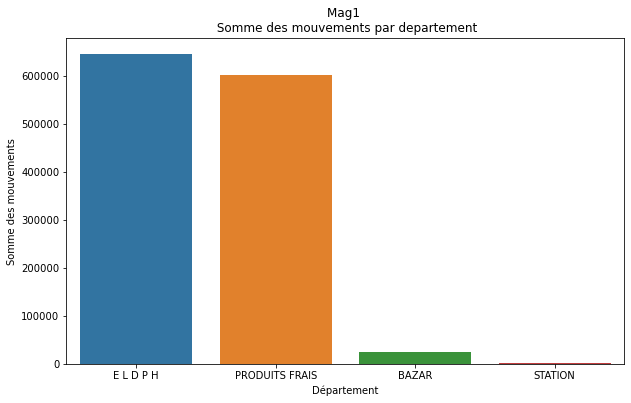

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(x = mvt_Mag1_dep['LIB_DEP'], y=mvt_Mag1_dep['QTE_MVT'])
plt.xlabel('Département')
plt.ylabel('Somme des mouvements')
plt.title('Mag1 \n Somme des mouvements par departement')
plt.show()

#### Rayon

In [77]:
mvt_Mag1_ray = Mag1.groupby('LIB_RAY')['QTE_MVT'].sum().sort_values(ascending=False).reset_index()
mvt_Mag1_ray

,LIB_RAY,QTE_MVT
0,EPICERIE,385618.0
1,CREMERIE FROMAGE SURGELES,353114.0
2,LIQUIDES,207814.0
3,FRUITS ET LEGUMES INVENTORIES,114770.0
4,VIANDES CHARC VOLAILLE TRAIT LS,99563.0
5,D P H,53594.0
6,PRODUITS FRAIS,24330.0
7,MARCHANDISE GENERALE,24238.0
8,RAYON TRAD VIANDES INVENTORIEES,7724.0
9,FROMAGE COUPE INVENTORIE,3738.0


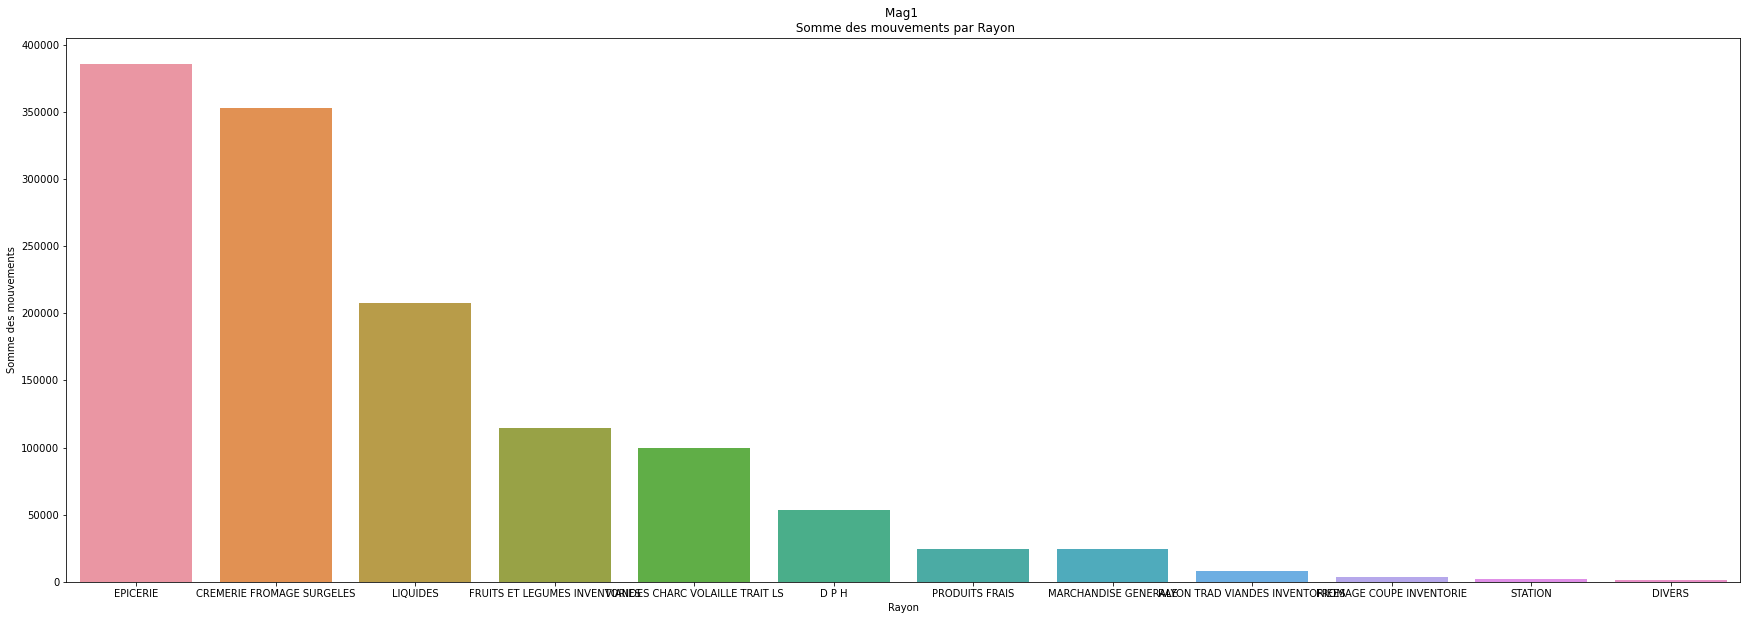

In [78]:
plt.figure(figsize=(30, 10))
sns.barplot(x = mvt_Mag1_ray['LIB_RAY'], y=mvt_Mag1_ray['QTE_MVT'])
plt.xlabel('Rayon')
plt.ylabel('Somme des mouvements')
plt.title('Mag1 \n Somme des mouvements par Rayon')
plt.show()

#### Famille

In [79]:
Mag1.groupby('LIB_FAM')['QTE_MVT'].sum().sort_values(ascending=False).reset_index().head(10)

,LIB_FAM,QTE_MVT
0,CREMERIE FRAICHE,188796.0
1,FRUITS ET LEGUMES MAGASIN,114770.0
2,BISC.-PAIN EPICE-PATIS.INDUS.,91971.0
3,LIMONADES-SODAS-JUS DE FRUIT &,77472.0
4,FROMAGES,72989.0
5,BIERES - CIDRES & PANCHES,60269.0
6,CHARCUT.-SALAIS.-VOLAIL.&GIBIE,49331.0
7,TRAITEUR,45071.0
8,DEPOT DE PAIN,42016.0
9,CONFISERIE DE SUCRE,28361.0


In [80]:
Mag1.groupby('LIB_FAM')['QTE_MVT'].sum().sort_values(ascending=False).reset_index().tail(10)

,LIB_FAM,QTE_MVT
71,DEPOT VENTE,98.0
72,FLEURS ET PLANTES 5.5,80.0
73,MERCERIE,64.0
74,CONSIGNES GAZ EXO,50.0
75,BIJOUTERIE-HORLOGERIE-FANTAISI,45.0
76,RECAPE,11.0
77,POISSONNERIE,7.0
78,PETIT ELECTRO MENAGER,1.0
79,GLACES,1.0
80,VOLAILLES LS,1.0


#### Sous Famille

In [81]:
Mag1.groupby('LIB_SFA')['QTE_MVT'].sum().sort_values(ascending=False).reset_index().head(10)

,LIB_SFA,QTE_MVT
0,fruits,58530.0
1,legumes,56969.0
2,Oeufs,48451.0
3,Blondes,48170.0
4,depot de pain,41985.0
5,Upris UHT,26283.0
6,Colas,22407.0
7,Desserts frais exgelif,21968.0
8,Pains courants,19723.0
9,Chips,18184.0


In [82]:
Mag1.groupby('LIB_SFA')['QTE_MVT'].sum().sort_values(ascending=False).reset_index().tail(10)

,LIB_SFA,QTE_MVT
597,Produits seches,0.0
598,VOLAILLES GRASSES,0.0
599,"Dindes fraches, congeles",0.0
600,Mouton,0.0
601,prparations de vaindes,0.0
602,Produits sals,0.0
603,Cognac et armagnac,0.0
604,CHARCUTERIE BOUCHERE CUITE,0.0
605,GIBIER,0.0
606,charcuterie ls ATELIER,0.0


#### Article

In [83]:
Mag1.groupby('ID_ART')['QTE_MVT'].sum().sort_values(ascending=False).reset_index().head(10)

,ID_ART,QTE_MVT
0,14977,40764.0
1,16672,29895.0
2,14572,17529.0
3,14575,12792.0
4,13312,12090.0
5,1958,8838.0
6,40192,6730.0
7,14764,6214.0
8,14513,5724.0
9,49865,5398.0


In [84]:
Mag1.groupby('ID_ART')['QTE_MVT'].sum().sort_values(ascending=False).reset_index().tail(10)

,ID_ART,QTE_MVT
7752,20542,0.0
7753,51419,0.0
7754,50508,-1.0
7755,14466,-1.0
7756,55700,-1.0
7757,14389,-1.0
7758,53646,-1.0
7759,14357,-3.0
7760,14475,-5.0
7761,14574,-6.0


### Mag2 

#### Département

In [85]:
Mag2.groupby('LIB_DEP')['QTE_MVT'].sum().sort_values(ascending=False).reset_index().head(10)

,LIB_DEP,QTE_MVT
0,E L D P H,647026.0
1,PRODUITS FRAIS,603239.0
2,BAZAR,25310.0
3,STATION,2143.0


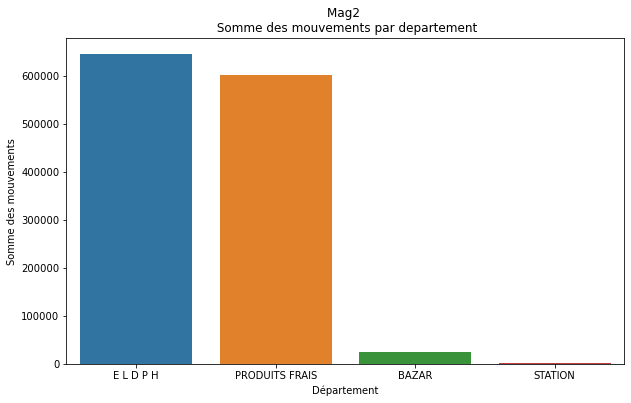

In [86]:
plt.figure(figsize=(10, 6))
sns.barplot(x = Mag2.groupby('LIB_DEP')['QTE_MVT'].sum().sort_values(ascending=False).reset_index().head(10)['LIB_DEP'], y=Mag2.groupby('LIB_DEP')['QTE_MVT'].sum().sort_values(ascending=False).reset_index().head(10)['QTE_MVT'])
plt.xlabel('Département')
plt.ylabel('Somme des mouvements')
plt.title('Mag2 \n Somme des mouvements par departement')
plt.show()

#### Rayon

In [87]:
Mag2.groupby('LIB_RAY')['QTE_MVT'].sum().sort_values(ascending=False).reset_index()

,LIB_RAY,QTE_MVT
0,EPICERIE,385618.0
1,CREMERIE FROMAGE SURGELES,353114.0
2,LIQUIDES,207814.0
3,FRUITS ET LEGUMES INVENTORIES,114770.0
4,VIANDES CHARC VOLAILLE TRAIT LS,99563.0
5,D P H,53594.0
6,PRODUITS FRAIS,24330.0
7,MARCHANDISE GENERALE,24238.0
8,RAYON TRAD VIANDES INVENTORIEES,7724.0
9,FROMAGE COUPE INVENTORIE,3738.0


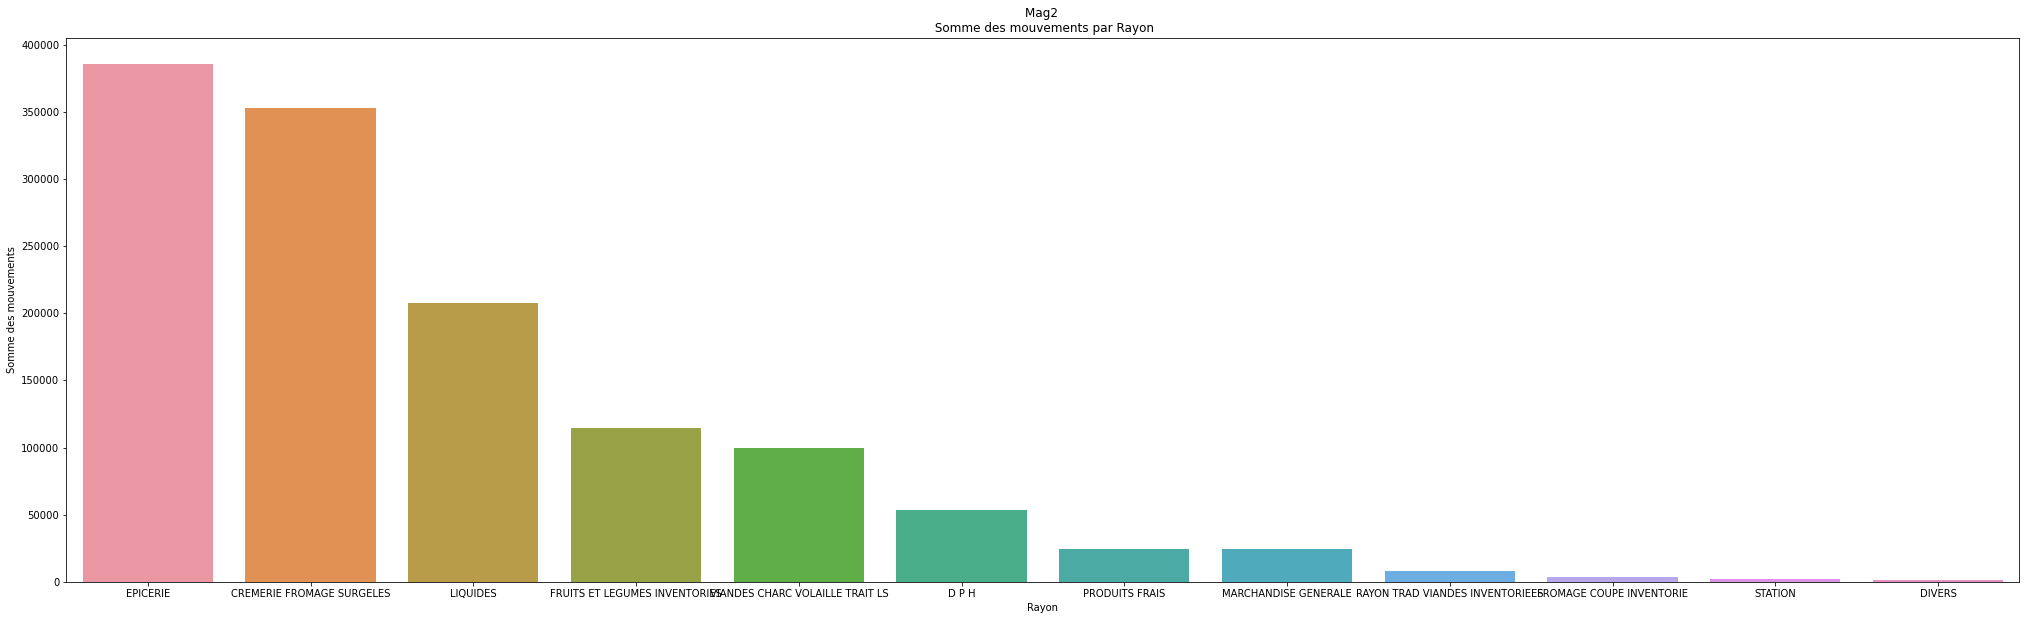

In [88]:
plt.figure(figsize=(35, 10))
sns.barplot(x = Mag2.groupby('LIB_RAY')['QTE_MVT'].sum().sort_values(ascending=False).reset_index()['LIB_RAY'], y=Mag2.groupby('LIB_RAY')['QTE_MVT'].sum().sort_values(ascending=False).reset_index()['QTE_MVT'])
plt.xlabel('Rayon')
plt.ylabel('Somme des mouvements')
plt.title('Mag2 \n Somme des mouvements par Rayon')
plt.show()

#### Famille

In [89]:
Mag2.groupby('LIB_FAM')['QTE_MVT'].sum().sort_values(ascending=False).reset_index().head(10)

,LIB_FAM,QTE_MVT
0,CREMERIE FRAICHE,188796.0
1,FRUITS ET LEGUMES MAGASIN,114770.0
2,BISC.-PAIN EPICE-PATIS.INDUS.,91971.0
3,LIMONADES-SODAS-JUS DE FRUIT &,77472.0
4,FROMAGES,72989.0
5,BIERES - CIDRES & PANCHES,60269.0
6,CHARCUT.-SALAIS.-VOLAIL.&GIBIE,49331.0
7,TRAITEUR,45071.0
8,DEPOT DE PAIN,42016.0
9,CONFISERIE DE SUCRE,28361.0


In [90]:
Mag2.groupby('LIB_FAM')['QTE_MVT'].sum().sort_values(ascending=False).reset_index().tail(10)

,LIB_FAM,QTE_MVT
71,DEPOT VENTE,98.0
72,FLEURS ET PLANTES 5.5,80.0
73,MERCERIE,64.0
74,CONSIGNES GAZ EXO,50.0
75,BIJOUTERIE-HORLOGERIE-FANTAISI,45.0
76,RECAPE,11.0
77,POISSONNERIE,7.0
78,PETIT ELECTRO MENAGER,1.0
79,GLACES,1.0
80,VOLAILLES LS,1.0


#### Sous Famille

In [91]:
Mag2.groupby('LIB_SFA')['QTE_MVT'].sum().sort_values(ascending=False).reset_index().head(10)

,LIB_SFA,QTE_MVT
0,fruits,58530.0
1,legumes,56969.0
2,Oeufs,48451.0
3,Blondes,48170.0
4,depot de pain,41985.0
5,Upris UHT,26283.0
6,Colas,22407.0
7,Desserts frais exgelif,21968.0
8,Pains courants,19723.0
9,Chips,18184.0


In [92]:
Mag2.groupby('LIB_SFA')['QTE_MVT'].sum().sort_values(ascending=False).reset_index().tail(10)

,LIB_SFA,QTE_MVT
597,Produits seches,0.0
598,VOLAILLES GRASSES,0.0
599,"Dindes fraches, congeles",0.0
600,Mouton,0.0
601,prparations de vaindes,0.0
602,Produits sals,0.0
603,Cognac et armagnac,0.0
604,CHARCUTERIE BOUCHERE CUITE,0.0
605,GIBIER,0.0
606,charcuterie ls ATELIER,0.0


#### Article

In [93]:
Mag2.groupby('ID_ART')['QTE_MVT'].sum().sort_values(ascending=False).reset_index().head(10)

,ID_ART,QTE_MVT
0,14977,40764.0
1,16672,29895.0
2,14572,17529.0
3,14575,12792.0
4,13312,12090.0
5,1958,8838.0
6,40192,6730.0
7,14764,6214.0
8,14513,5724.0
9,49865,5398.0


In [94]:
Mag2.groupby('ID_ART')['QTE_MVT'].sum().sort_values(ascending=False).reset_index().tail(10)

,ID_ART,QTE_MVT
7752,20542,0.0
7753,51419,0.0
7754,50508,-1.0
7755,14466,-1.0
7756,55700,-1.0
7757,14389,-1.0
7758,53646,-1.0
7759,14357,-3.0
7760,14475,-5.0
7761,14574,-6.0


## Nombres de vente nulle ou négative 

### Mag1

In [95]:
Mag1_mvt_neg = Mag1[Mag1['QTE_MVT'] <= 0].sort_values(by='QTE_MVT', ascending=False)
Mag1_mvt_neg['QTE_MVT'].describe()

count    234.000000
mean      -1.277778
std        1.378785
min      -12.000000
25%       -1.000000
50%       -1.000000
75%       -1.000000
max        0.000000
Name: QTE_MVT, dtype: float64

#### Département

In [96]:
Mag1_mvt_neg.groupby('LIB_DEP')['QTE_MVT'].sum().sort_values(ascending=True).reset_index().head(10)

,LIB_DEP,QTE_MVT
0,PRODUITS FRAIS,-187.0
1,E L D P H,-90.0
2,STATION,-15.0
3,BAZAR,-7.0


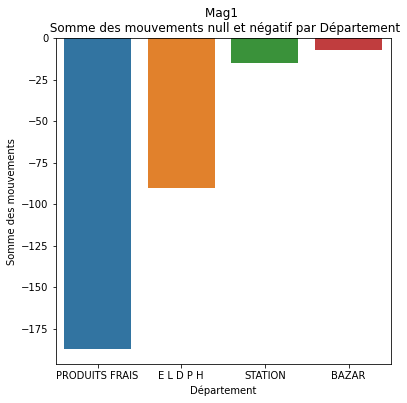

In [97]:
plt.figure(figsize=(6, 6))
sns.barplot(x = Mag1_mvt_neg.groupby('LIB_DEP')['QTE_MVT'].sum().sort_values(ascending=True).reset_index().head(10)['LIB_DEP'], y=Mag1_mvt_neg.groupby('LIB_DEP')['QTE_MVT'].sum().sort_values(ascending=True).reset_index().head(10)['QTE_MVT'])
plt.xlabel('Département')
plt.ylabel('Somme des mouvements')
plt.title('Mag1 \n Somme des mouvements null et négatif par Département')
plt.show()

#### Rayon

In [98]:
Mag1_mvt_neg.groupby('LIB_RAY')['QTE_MVT'].sum().sort_values(ascending=True).reset_index()

,LIB_RAY,QTE_MVT
0,FRUITS ET LEGUMES INVENTORIES,-129.0
1,EPICERIE,-59.0
2,CREMERIE FROMAGE SURGELES,-28.0
3,LIQUIDES,-25.0
4,STATION,-15.0
5,RAYON TRAD VIANDES INVENTORIEES,-12.0
6,VIANDES CHARC VOLAILLE TRAIT LS,-11.0
7,D P H,-6.0
8,PRODUITS FRAIS,-6.0
9,MARCHANDISE GENERALE,-5.0


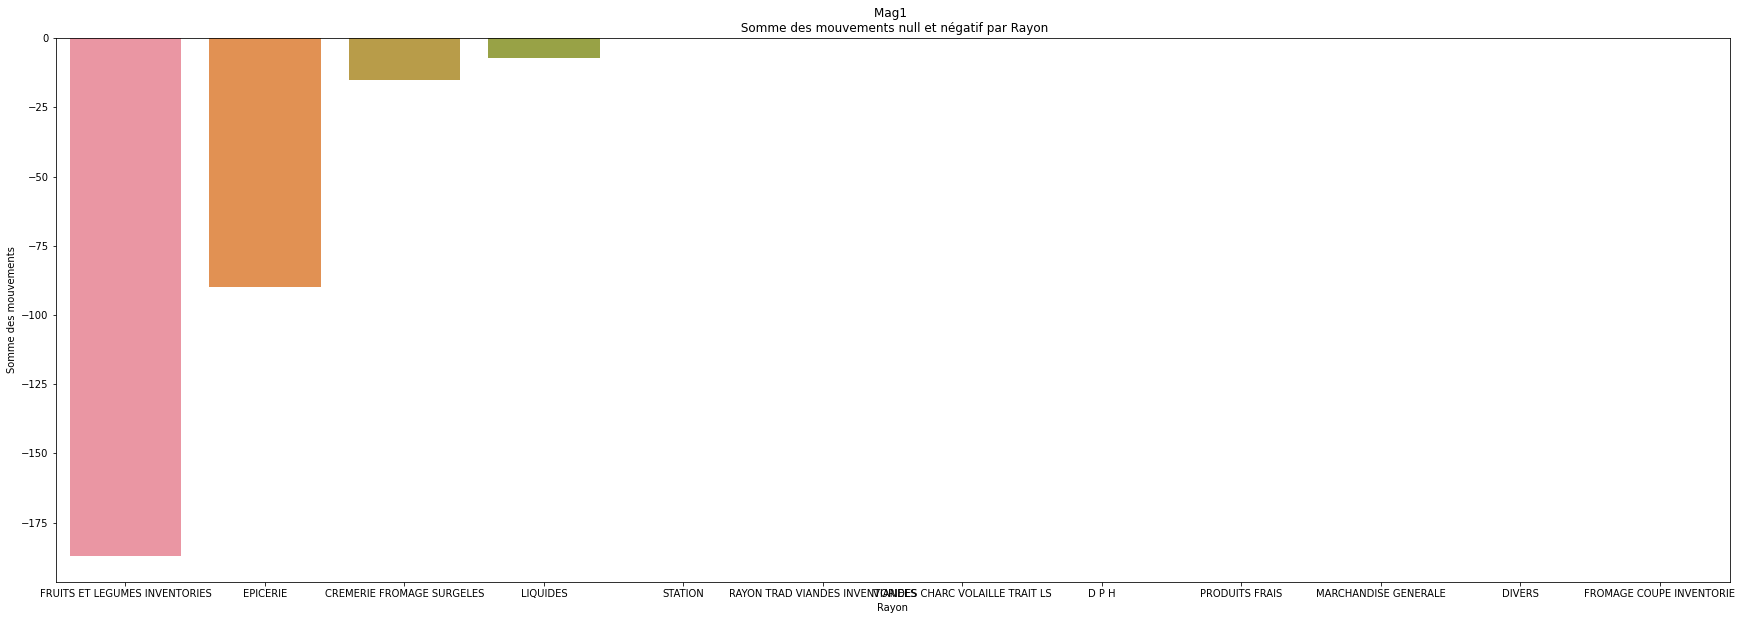

In [99]:
plt.figure(figsize=(30, 10))
sns.barplot(x =Mag1_mvt_neg.groupby('LIB_RAY')['QTE_MVT'].sum().sort_values(ascending=True).reset_index()['LIB_RAY'], y=Mag1_mvt_neg.groupby('LIB_DEP')['QTE_MVT'].sum().sort_values(ascending=True).reset_index().head(10)['QTE_MVT'])
plt.xlabel('Rayon')
plt.ylabel('Somme des mouvements')
plt.title('Mag1 \n Somme des mouvements null et négatif par Rayon')
plt.show()

#### Famille

In [100]:
Mag1_mvt_neg.groupby('LIB_FAM')['QTE_MVT'].sum().sort_values(ascending=True).reset_index().head(10)

,LIB_FAM,QTE_MVT
0,FRUITS ET LEGUMES MAGASIN,-129.0
1,CREMERIE FRAICHE,-14.0
2,CAFE - CHICOREE - MALT,-13.0
3,BOUCHERIE TRAD,-12.0
4,FROMAGES,-11.0
5,CONFISERIE DE SUCRE,-10.0
6,VINS FINS APPEL.ORG. &VINS SUP,-9.0
7,BISCOTTES ET ASSIMILES,-9.0
8,GAZ,-8.0
9,TRAITEUR,-7.0


In [101]:
Mag1_mvt_neg.groupby('LIB_FAM')['QTE_MVT'].sum().sort_values(ascending=True).reset_index().tail(10)

,LIB_FAM,QTE_MVT
26,FARINE-PUREE-FECULE-SEMOULE-TA,-2.0
27,VAISSELLE - VERRERIE,-2.0
28,JEUX ET JOUETS,-1.0
29,CREMES GLACEES-GLACES & SURGEL,-1.0
30,CONSERVES RECAPE,-1.0
31,FROMAGE COUPE,-1.0
32,DEPOT VENTE,-1.0
33,APERITIFS,-1.0
34,CONSERVES DE LEGUMES,-1.0
35,DEPOT DE PAIN,0.0


#### Sous Famille

In [102]:
Mag1_mvt_neg.groupby('LIB_SFA')['QTE_MVT'].sum().sort_values(ascending=True).reset_index().head(10)

,LIB_SFA,QTE_MVT
0,fruits,-87.0
1,legumes,-42.0
2,recape,-12.0
3,Caf moulu normal,-10.0
4,Biscottes avec sel,-9.0
5,station,-8.0
6,CONSIGNES GAZ EXO,-7.0
7,Lait frais,-6.0
8,dmarque,-6.0
9,Chips,-6.0


In [103]:
Mag1_mvt_neg.groupby('LIB_SFA')['QTE_MVT'].sum().sort_values(ascending=True).reset_index().tail(10)

,LIB_SFA,QTE_MVT
52,fromage coupe,-1.0
53,recape coffrets,-1.0
54,Crmes glaces en vrac,-1.0
55,Midoc Jouets,-1.0
56,Vins blancs,-1.0
57,Petits pois,-1.0
58,Sodas aux extraits de fruits,-1.0
59,Cognac et armagnac,-1.0
60,depot vente,-1.0
61,depot de pain,0.0


#### Article

In [104]:
Mag1_mvt_neg.groupby('ID_ART')['QTE_MVT'].sum().sort_values(ascending=True).reset_index().head(10)

,ID_ART,QTE_MVT
0,14437,-57.0
1,14556,-36.0
2,14575,-15.0
3,14445,-12.0
4,14357,-9.0
5,14475,-8.0
6,18347,-6.0
7,14574,-6.0
8,15404,-4.0
9,8402,-4.0


In [105]:
Mag1_mvt_neg.groupby('ID_ART')['QTE_MVT'].sum().sort_values(ascending=True).reset_index().tail(10)

,ID_ART,QTE_MVT
85,14403,-1.0
86,14401,-1.0
87,14399,-1.0
88,44145,-1.0
89,44359,-1.0
90,14393,-1.0
91,17431,-1.0
92,14466,-1.0
93,14392,-1.0
94,16672,0.0


### Mag2

In [106]:
Mag2_mvt_neg = Mag2[Mag2['QTE_MVT'] <= 0].sort_values(by='QTE_MVT', ascending=False)
Mag2_mvt_neg['QTE_MVT'].describe()

count    234.000000
mean      -1.277778
std        1.378785
min      -12.000000
25%       -1.000000
50%       -1.000000
75%       -1.000000
max        0.000000
Name: QTE_MVT, dtype: float64

#### Département

In [107]:
Mag2_mvt_neg.groupby('LIB_DEP')['QTE_MVT'].sum().sort_values(ascending=True).reset_index().head(10)

,LIB_DEP,QTE_MVT
0,PRODUITS FRAIS,-187.0
1,E L D P H,-90.0
2,STATION,-15.0
3,BAZAR,-7.0


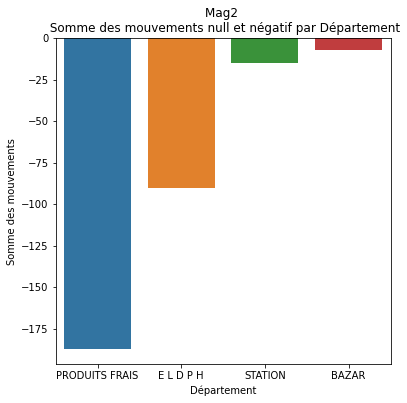

In [108]:
plt.figure(figsize=(6, 6))
sns.barplot(x = Mag2_mvt_neg.groupby('LIB_DEP')['QTE_MVT'].sum().sort_values(ascending=True).reset_index().head(10)['LIB_DEP'], y=Mag2_mvt_neg.groupby('LIB_DEP')['QTE_MVT'].sum().sort_values(ascending=True).reset_index().head(10)['QTE_MVT'])
plt.xlabel('Département')
plt.ylabel('Somme des mouvements')
plt.title('Mag2 \n Somme des mouvements null et négatif par Département')
plt.show()

#### Rayon

In [109]:
Mag2_mvt_neg.groupby('LIB_RAY')['QTE_MVT'].sum().sort_values(ascending=True).reset_index()

,LIB_RAY,QTE_MVT
0,FRUITS ET LEGUMES INVENTORIES,-129.0
1,EPICERIE,-59.0
2,CREMERIE FROMAGE SURGELES,-28.0
3,LIQUIDES,-25.0
4,STATION,-15.0
5,RAYON TRAD VIANDES INVENTORIEES,-12.0
6,VIANDES CHARC VOLAILLE TRAIT LS,-11.0
7,D P H,-6.0
8,PRODUITS FRAIS,-6.0
9,MARCHANDISE GENERALE,-5.0


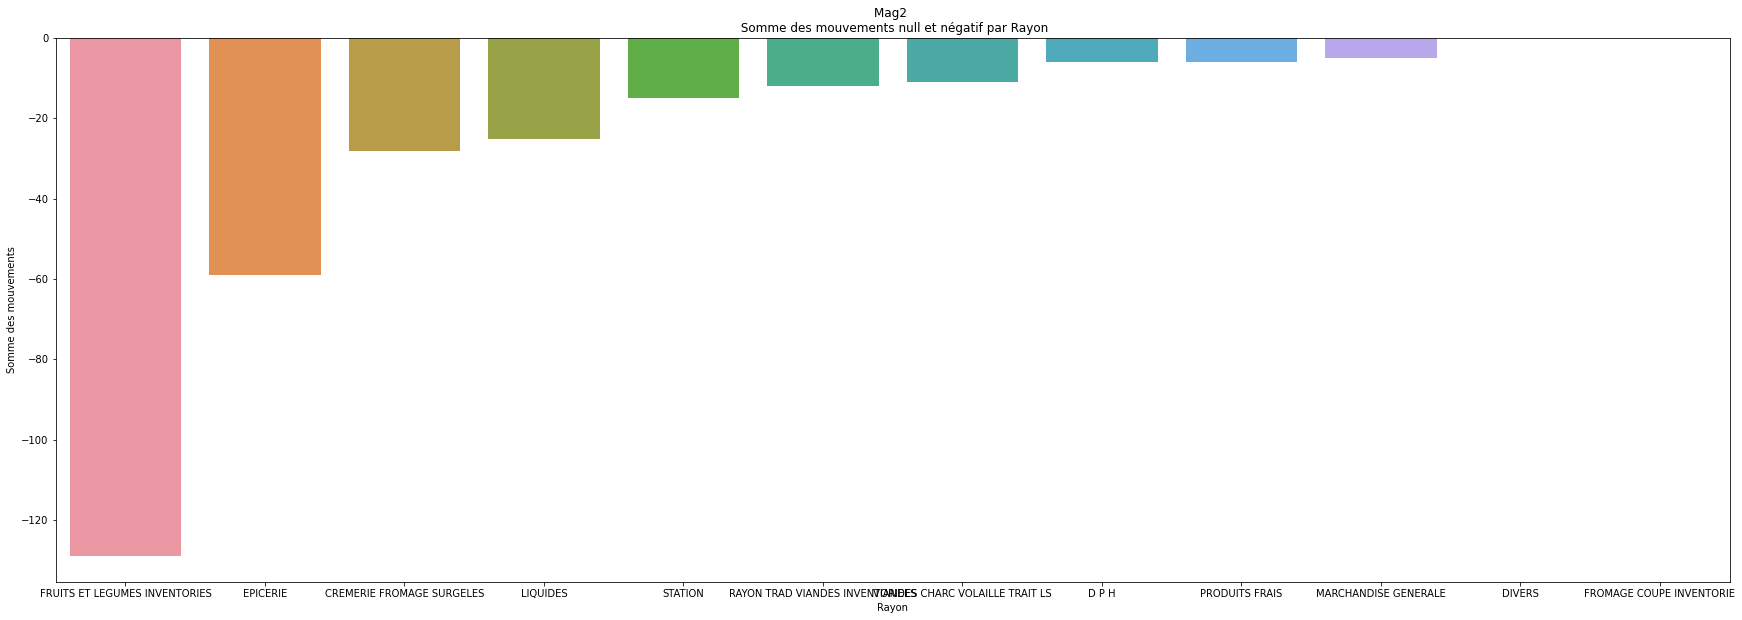

In [110]:
plt.figure(figsize=(30, 10))
sns.barplot(x = Mag2_mvt_neg.groupby('LIB_RAY')['QTE_MVT'].sum().sort_values(ascending=True).reset_index()['LIB_RAY'], y=Mag2_mvt_neg.groupby('LIB_RAY')['QTE_MVT'].sum().sort_values(ascending=True).reset_index().head(10)['QTE_MVT'])
plt.xlabel('Rayon')
plt.ylabel('Somme des mouvements')
plt.title('Mag2 \n Somme des mouvements null et négatif par Rayon')
plt.show()

#### Famille

In [111]:
Mag2_mvt_neg.groupby('LIB_FAM')['QTE_MVT'].sum().sort_values(ascending=True).reset_index().head(10)

,LIB_FAM,QTE_MVT
0,FRUITS ET LEGUMES MAGASIN,-129.0
1,CREMERIE FRAICHE,-14.0
2,CAFE - CHICOREE - MALT,-13.0
3,BOUCHERIE TRAD,-12.0
4,FROMAGES,-11.0
5,CONFISERIE DE SUCRE,-10.0
6,VINS FINS APPEL.ORG. &VINS SUP,-9.0
7,BISCOTTES ET ASSIMILES,-9.0
8,GAZ,-8.0
9,TRAITEUR,-7.0


In [112]:
Mag2_mvt_neg.groupby('LIB_FAM')['QTE_MVT'].sum().sort_values(ascending=True).reset_index().tail(10)

,LIB_FAM,QTE_MVT
26,FARINE-PUREE-FECULE-SEMOULE-TA,-2.0
27,VAISSELLE - VERRERIE,-2.0
28,JEUX ET JOUETS,-1.0
29,CREMES GLACEES-GLACES & SURGEL,-1.0
30,CONSERVES RECAPE,-1.0
31,FROMAGE COUPE,-1.0
32,DEPOT VENTE,-1.0
33,APERITIFS,-1.0
34,CONSERVES DE LEGUMES,-1.0
35,DEPOT DE PAIN,0.0


#### Sous Famille

In [113]:
Mag2_mvt_neg.groupby('LIB_SFA')['QTE_MVT'].sum().sort_values(ascending=True).reset_index().head(10)

,LIB_SFA,QTE_MVT
0,fruits,-87.0
1,legumes,-42.0
2,recape,-12.0
3,Caf moulu normal,-10.0
4,Biscottes avec sel,-9.0
5,station,-8.0
6,CONSIGNES GAZ EXO,-7.0
7,Lait frais,-6.0
8,dmarque,-6.0
9,Chips,-6.0


In [114]:
Mag2_mvt_neg.groupby('LIB_SFA')['QTE_MVT'].sum().sort_values(ascending=True).reset_index().tail(10)

,LIB_SFA,QTE_MVT
52,fromage coupe,-1.0
53,recape coffrets,-1.0
54,Crmes glaces en vrac,-1.0
55,Midoc Jouets,-1.0
56,Vins blancs,-1.0
57,Petits pois,-1.0
58,Sodas aux extraits de fruits,-1.0
59,Cognac et armagnac,-1.0
60,depot vente,-1.0
61,depot de pain,0.0


#### Article

In [115]:
Mag2_mvt_neg.groupby('ID_ART')['QTE_MVT'].sum().sort_values(ascending=True).reset_index().head(10)

,ID_ART,QTE_MVT
0,14437,-57.0
1,14556,-36.0
2,14575,-15.0
3,14445,-12.0
4,14357,-9.0
5,14475,-8.0
6,18347,-6.0
7,14574,-6.0
8,15404,-4.0
9,8402,-4.0


In [116]:
Mag2_mvt_neg.groupby('ID_ART')['QTE_MVT'].sum().sort_values(ascending=True).reset_index().tail(10)

,ID_ART,QTE_MVT
85,14403,-1.0
86,14401,-1.0
87,14399,-1.0
88,44145,-1.0
89,44359,-1.0
90,14393,-1.0
91,17431,-1.0
92,14466,-1.0
93,14392,-1.0
94,16672,0.0


## Les plus grandes différences de nombres de vente pour un produit entre les deux magasins

#### Département

In [117]:
Mag1_dep_mvt = Mag1.groupby('LIB_DEP')[['QTE_MVT']].sum()
Mag2_dep_mvt = Mag2.groupby('LIB_DEP')[['QTE_MVT']].sum()

In [118]:
# Fusionner les deux DataFrames sur la colonne 'ID_ART'
merged_mvt = Mag1_dep_mvt.merge(Mag2_dep_mvt, on='LIB_DEP', suffixes=('_Mag1', '_Mag2'), how='inner')
# Créer une nouvelle colonne avec la différence de marge brute
merged_mvt['Difference_mouvement'] = merged_mvt['QTE_MVT_Mag1'] - merged_mvt['QTE_MVT_Mag2']
merged_mvt.sort_values(by='Difference_mouvement', ascending=False)

,QTE_MVT_Mag1,QTE_MVT_Mag2,Difference_mouvement
LIB_DEP,,,
BAZAR,25310.0,25310.0,0.0
E L D P H,647026.0,647026.0,0.0
PRODUITS FRAIS,603239.0,603239.0,0.0
STATION,2143.0,2143.0,0.0


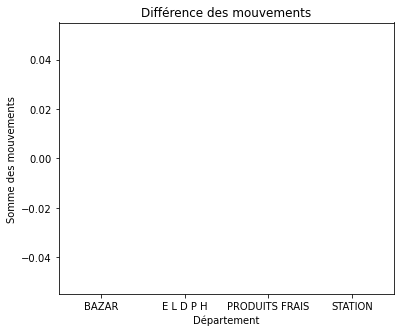

In [119]:
plt.figure(figsize=(6, 5))
sns.barplot(y = merged_mvt['Difference_mouvement'], x=merged_mvt.index)
plt.xlabel('Département')
plt.ylabel("Somme des mouvements")
plt.title("Différence des mouvements")
plt.show()

#### Rayon

In [120]:
Mag1_ray_mvt = Mag1.groupby('LIB_RAY')[['QTE_MVT']].sum()
Mag2_ray_mvt = Mag2.groupby('LIB_RAY')[['QTE_MVT']].sum()

In [121]:
# Fusionner les deux DataFrames sur la colonne 'ID_ART'
merged_mvt_ray = Mag1_ray_mvt.merge(Mag2_ray_mvt, on='LIB_RAY', suffixes=('_Mag1', '_Mag2'), how='inner')
# Créer une nouvelle colonne avec la différence de marge brute
merged_mvt_ray['Difference_mouvement'] = merged_mvt_ray['QTE_MVT_Mag1'] - merged_mvt_ray['QTE_MVT_Mag2']
merged_mvt_ray.sort_values(by='Difference_mouvement', ascending=False)

,QTE_MVT_Mag1,QTE_MVT_Mag2,Difference_mouvement
LIB_RAY,,,
CREMERIE FROMAGE SURGELES,353114.0,353114.0,0.0
D P H,53594.0,53594.0,0.0
DIVERS,1072.0,1072.0,0.0
EPICERIE,385618.0,385618.0,0.0
FROMAGE COUPE INVENTORIE,3738.0,3738.0,0.0
FRUITS ET LEGUMES INVENTORIES,114770.0,114770.0,0.0
LIQUIDES,207814.0,207814.0,0.0
MARCHANDISE GENERALE,24238.0,24238.0,0.0
PRODUITS FRAIS,24330.0,24330.0,0.0


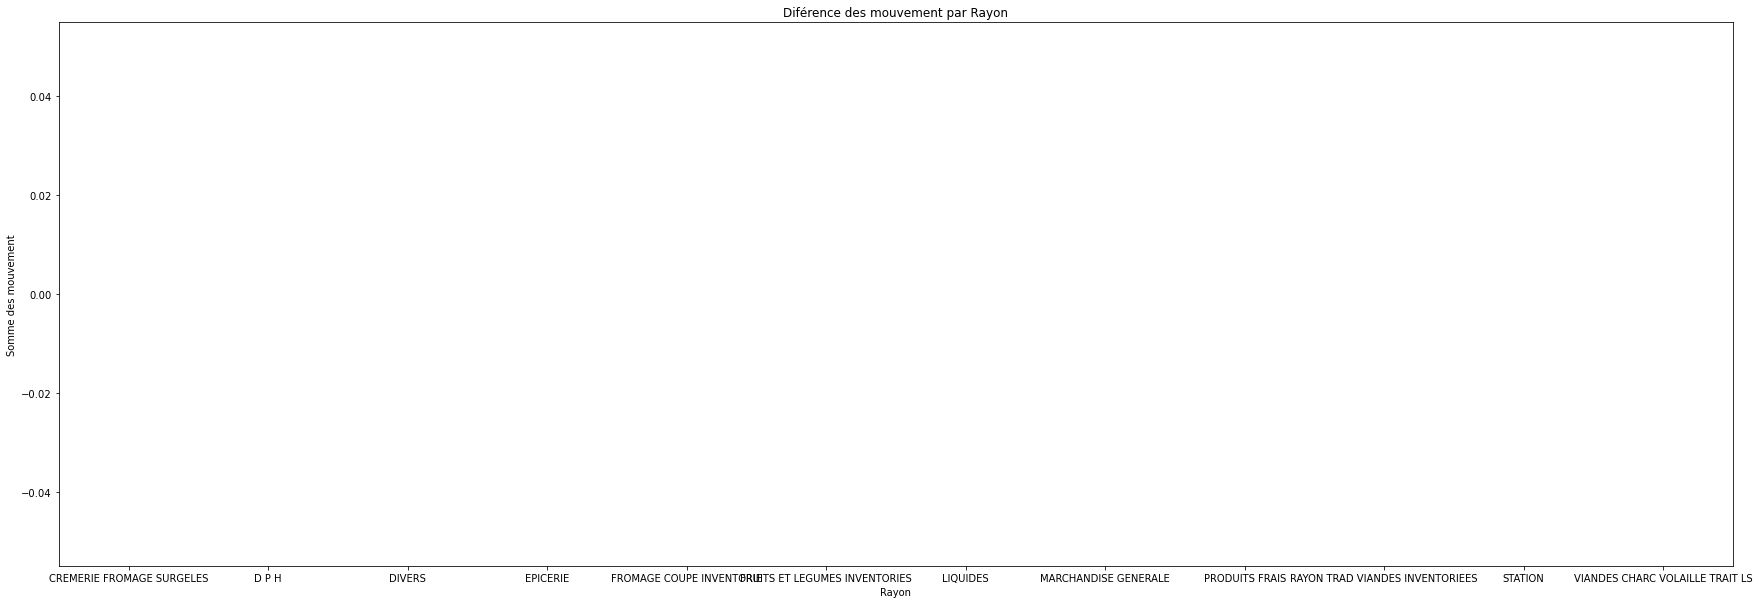

In [122]:
plt.figure(figsize=(30, 10))
sns.barplot(y = merged_mvt_ray['Difference_mouvement'], x=merged_mvt_ray.index)
plt.xlabel('Rayon')
plt.ylabel("Somme des mouvement")
plt.title("Diférence des mouvement par Rayon")
plt.show()

#### Famille

In [123]:
Mag1_fam_mvt = Mag1.groupby('LIB_FAM')[['QTE_MVT']].sum()
Mag2_fam_mvt = Mag2.groupby('LIB_FAM')[['QTE_MVT']].sum()

In [124]:
# Fusionner les deux DataFrames sur la colonne 'ID_ART'
merged_mvt_fam = Mag1_fam_mvt.merge(Mag2_fam_mvt, on='LIB_FAM', suffixes=('_Mag1', '_Mag2'), how='inner')
# Créer une nouvelle colonne avec la différence de marge brute
merged_mvt_fam['Difference_mouvement'] = merged_mvt_fam['QTE_MVT_Mag1'] - merged_mvt_fam['QTE_MVT_Mag2']
merged_mvt_fam.sort_values(by='Difference_mouvement', ascending=False).head(10)

,QTE_MVT_Mag1,QTE_MVT_Mag2,Difference_mouvement
LIB_FAM,,,
ALCOOLS-EAUX DE VIE & LIQUEURS,7914.0,7914.0,0.0
FRUITS - LEGUMES SECS - RIZ,17924.0,17924.0,0.0
PETIT ELECTRO MENAGER,1.0,1.0,0.0
PATES ALIMENTAIRES,14262.0,14262.0,0.0
PAPETERIE,1479.0,1479.0,0.0
PAINS & PATISSERIE FRAICHE,21069.0,21069.0,0.0
MERCERIE,64.0,64.0,0.0
LIMONADES-SODAS-JUS DE FRUIT &,77472.0,77472.0,0.0
LIBRAIRIE,260.0,260.0,0.0


In [125]:
merged_mvt_fam.sort_values(by='Difference_mouvement', ascending=False).tail(10)

,QTE_MVT_Mag1,QTE_MVT_Mag2,Difference_mouvement
LIB_FAM,,,
DEPOT VENTE,98.0,98.0,0.0
CONSERVES DE LEGUMES,20026.0,20026.0,0.0
DEPOT DE PAIN,42016.0,42016.0,0.0
CREMES GLACEES-GLACES & SURGEL,28236.0,28236.0,0.0
CREMERIE FRAICHE,188796.0,188796.0,0.0
CONSIGNES GAZ EXO,50.0,50.0,0.0
CONSERVES RECAPE,4883.0,4883.0,0.0
CONSERVES DE VIANDES,762.0,762.0,0.0
CONSERVES DE POISSONS,13576.0,13576.0,0.0


#### Sous Famille 

In [126]:
Mag1_sfa_mvt = Mag1.groupby('LIB_SFA')[['QTE_MVT']].sum()
Mag2_sfa_mvt = Mag2.groupby('LIB_SFA')[['QTE_MVT']].sum()

In [127]:
# Fusionner les deux DataFrames sur la colonne 'ID_ART'
merged_mvt_sfa = Mag1_sfa_mvt.merge(Mag2_sfa_mvt, on='LIB_SFA', suffixes=('_Mag1', '_Mag2'), how='inner')
# Créer une nouvelle colonne avec la différence de marge brute
merged_mvt_sfa['Difference_mouvement'] = merged_mvt_sfa['QTE_MVT_Mag1'] - merged_mvt_sfa['QTE_MVT_Mag2']
merged_mvt_sfa.sort_values(by='Difference_mouvement', ascending=False).head(10)

,QTE_MVT_Mag1,QTE_MVT_Mag2,Difference_mouvement
LIB_SFA,,,
100% fruits,2978.0,2978.0,0.0
Poivres grains et poudre,474.0,474.0,0.0
Pommes de terre,454.0,454.0,0.0
Potages en boites et bricks,3390.0,3390.0,0.0
Potages en sachets dshydrats,1882.0,1882.0,0.0
Poudres,69.0,69.0,0.0
Poudres et cristaux,85.0,85.0,0.0
Poudres et liquides,1018.0,1018.0,0.0
"Poudres,liquides,crme et gel",1364.0,1364.0,0.0


In [128]:
merged_mvt_sfa.sort_values(by='Difference_mouvement', ascending=False).tail(10)

,QTE_MVT_Mag1,QTE_MVT_Mag2,Difference_mouvement
LIB_SFA,,,
Crmes glaces en vrac,1431.0,1431.0,0.0
"Crmes, mousses et beurres",98.0,98.0,0.0
Cuisins,454.0,454.0,0.0
Cuites,16130.0,16130.0,0.0
Cuve close,200.0,200.0,0.0
Crales,4832.0,4832.0,0.0
DLS,36.0,36.0,0.0
De Pques,1228.0,1228.0,0.0
De couche,1680.0,1680.0,0.0


#### Article

In [129]:
Mag1_art_mvt = Mag1.groupby('ID_ART')[['QTE_MVT']].sum()

In [130]:
Mag2_art_mvt = Mag2.groupby('ID_ART')[['QTE_MVT']].sum()

In [131]:
# Fusionner les deux DataFrames sur la colonne 'ID_ART'
merged_mvt_art = Mag1_art_mvt.merge(Mag2_art_mvt, on='ID_ART', suffixes=('_Mag1', '_Mag2'), how='inner')
# Créer une nouvelle colonne avec la différence de marge brute
merged_mvt_art['Difference_mouvement'] = merged_mvt_art['QTE_MVT_Mag1'] - merged_mvt_art['QTE_MVT_Mag2']
merged_mvt_art.sort_values(by='Difference_mouvement', ascending=False)

,QTE_MVT_Mag1,QTE_MVT_Mag2,Difference_mouvement
ID_ART,,,
2,336.0,336.0,0.0
51209,980.0,980.0,0.0
51405,105.0,105.0,0.0
51404,33.0,33.0,0.0
51403,0.0,0.0,0.0
...,...,...,...
19629,464.0,464.0,0.0
19621,154.0,154.0,0.0
19615,120.0,120.0,0.0


In [132]:
merged_mvt['Difference_mouvement'].mean()

0.0

# Analyse du chiffre d'affaires

📈 Le chiffre d'affaires représente le montant total des ventes générées par une entreprise sur une période donnée. Il est calculé en multipliant le nombre d'unités vendues par le prix unitaire de vente. Le chiffre d'affaires reflète la somme totale d'argent que l'entreprise a encaissée grâce à ses ventes.

Chiffre d'affaires = Nombre d'unités vendues x Prix unitaire de vente

## Classement du chiffre d'afaires

## Mag1

#### Département

In [133]:
Mag1.groupby('LIB_DEP')['montant ca '].sum().sort_values(ascending=False).reset_index().head(10)

,LIB_DEP,montant ca
0,PRODUITS FRAIS,3.011649e+06
1,E L D P H,1.511360e+06
2,STATION,6.294234e+04
3,BAZAR,5.275854e+04


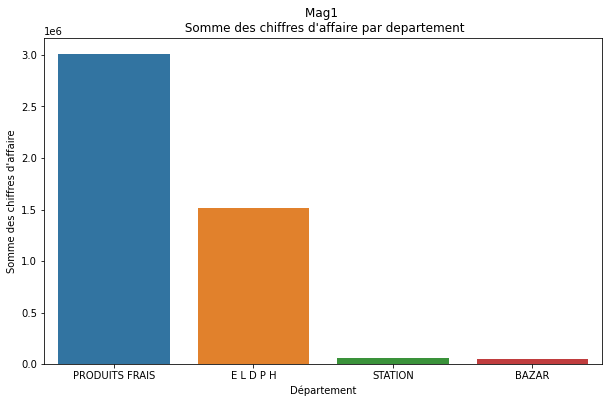

In [134]:
plt.figure(figsize=(10, 6))
sns.barplot(x = Mag1.groupby('LIB_DEP')['montant ca '].sum().sort_values(ascending=False).reset_index().head(10)['LIB_DEP'], y=Mag1.groupby('LIB_DEP')['montant ca '].sum().sort_values(ascending=False).reset_index().head(10)['montant ca '])
plt.xlabel('Département')
plt.ylabel("Somme des chiffres d'affaire")
plt.title("Mag1 \n Somme des chiffres d'affaire par departement")
plt.show()

#### Rayon

In [135]:
Mag1.groupby('LIB_RAY')['montant ca '].sum().sort_values(ascending=False).reset_index()

,LIB_RAY,montant ca
0,RAYON TRAD VIANDES INVENTORIEES,1.427712e+06
1,EPICERIE,7.683507e+05
2,LIQUIDES,6.262643e+05
3,CREMERIE FROMAGE SURGELES,6.139089e+05
4,FRUITS ET LEGUMES INVENTORIES,5.802959e+05
5,VIANDES CHARC VOLAILLE TRAIT LS,2.674509e+05
6,D P H,1.167454e+05
7,PRODUITS FRAIS,6.553737e+04
8,STATION,6.294234e+04
9,FROMAGE COUPE INVENTORIE,5.674434e+04


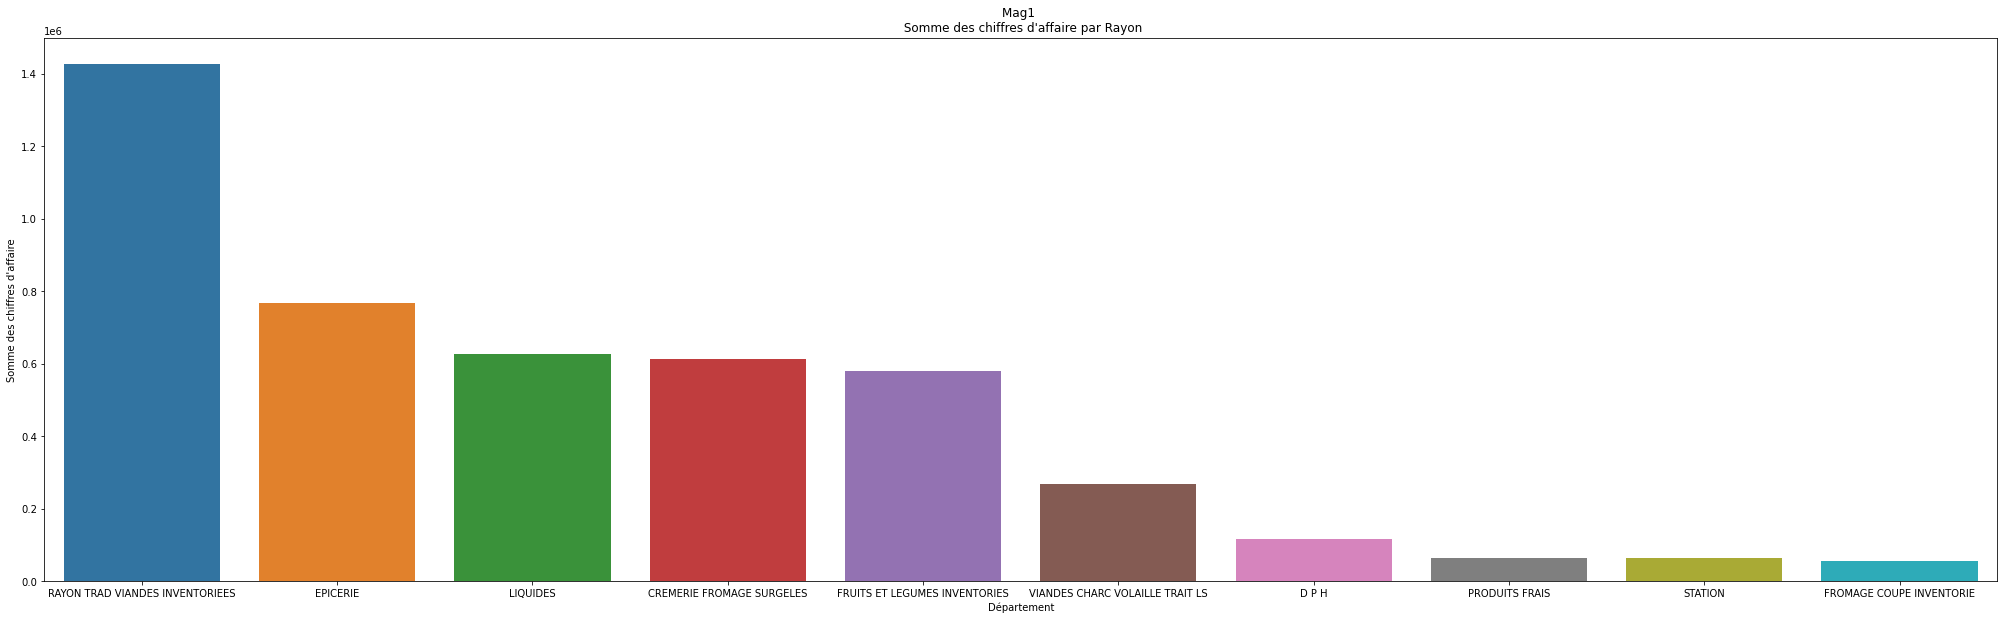

In [136]:
plt.figure(figsize=(35,10))
sns.barplot(x = Mag1.groupby('LIB_RAY')['montant ca '].sum().sort_values(ascending=False).reset_index().head(10)['LIB_RAY'], y=Mag1.groupby('LIB_RAY')['montant ca '].sum().sort_values(ascending=False).reset_index().head(10)['montant ca '])
plt.xlabel('Département')
plt.ylabel("Somme des chiffres d'affaire")
plt.title("Mag1 \n Somme des chiffres d'affaire par Rayon")
plt.show()

#### Famille

In [137]:
Mag1.groupby('LIB_FAM')['montant ca '].sum().sort_values(ascending=False).reset_index().head(10)

,LIB_FAM,montant ca
0,BOUCHERIE TRAD,1.427712e+06
1,FRUITS ET LEGUMES MAGASIN,5.802959e+05
2,CREMERIE FRAICHE,2.847974e+05
3,FROMAGES,1.631040e+05
4,BISC.-PAIN EPICE-PATIS.INDUS.,1.589395e+05
5,BIERES - CIDRES & PANCHES,1.543329e+05
6,LIMONADES-SODAS-JUS DE FRUIT &,1.360876e+05
7,CHARCUT.-SALAIS.-VOLAIL.&GIBIE,1.275127e+05
8,TRAITEUR,1.146770e+05
9,VINS FINS APPEL.ORG. &VINS SUP,1.102761e+05


In [138]:
Mag1.groupby('LIB_FAM')['montant ca '].sum().sort_values(ascending=False).reset_index().tail(10)

,LIB_FAM,montant ca
71,CHAUSSEUR,794.9100
72,POISSONNERIE,702.4935
73,BAS - COLLANTS - CHAUSSETTES,524.8800
74,BIJOUTERIE-HORLOGERIE-FANTAISI,388.8100
75,CHIPS,332.9100
76,MERCERIE,285.2800
77,RECAPE,95.2700
78,GLACES,12.6400
79,VOLAILLES LS,3.0300
80,PETIT ELECTRO MENAGER,2.5500


#### Sous Famille

In [139]:
Mag1.groupby('LIB_SFA')['montant ca '].sum().sort_values(ascending=False).reset_index().head(10)

,LIB_SFA,montant ca
0,BOEUF,336496.71537
1,legumes,316106.81808
2,fruits,265542.40415
3,VOLAILLES,258370.25382
4,Saucisserie base de porc,173689.13942
5,Charc/plats cuis achet,142703.12504
6,Blondes,119998.74000
7,charcuterie cuite,95969.74814
8,PORC,73244.25658
9,gaz,60430.04000


In [140]:
Mag1.groupby('LIB_SFA')['montant ca '].sum().sort_values(ascending=False).reset_index().tail(10)

,LIB_SFA,montant ca
597,coupes de fleurs,5.00
598,Petits-djeuners,4.92
599,Laits,3.84
600,volaille ls,3.03
601,Th en feuilles,2.98
602,Shampooings,2.42
603,Viandes de boeuf et de veau,1.98
604,Pommes,1.65
605,Aliments appertiss en pots,1.62
606,depot vente,-3.34


#### Article

In [141]:
Mag1.groupby('ID_ART')['montant ca '].sum().sort_values(ascending=False).reset_index().head(10)

,ID_ART,montant ca
0,15701,129712.05927
1,20209,52902.19866
2,15508,51034.14303
3,19525,49986.88380
4,15653,49149.51826
5,15497,42874.61265
6,15492,42403.88536
7,18541,41971.54290
8,19506,38233.49340
9,19648,37384.29172


In [142]:
Mag1.groupby('ID_ART')['montant ca '].sum().sort_values(ascending=False).reset_index().tail(10)

,ID_ART,montant ca
7752,29146,0.00
7753,59294,0.00
7754,55700,-0.17
7755,50508,-0.25
7756,14466,-0.64
7757,14389,-4.55
7758,53646,-13.18
7759,14574,-19.32
7760,14357,-70.82
7761,14475,-118.95


### Mag2

#### Département

In [143]:
Mag2.groupby('LIB_DEP')['montant ca '].sum().sort_values(ascending=False).reset_index().head(10)

,LIB_DEP,montant ca
0,PRODUITS FRAIS,3.011649e+06
1,E L D P H,1.511360e+06
2,STATION,6.294234e+04
3,BAZAR,5.275854e+04


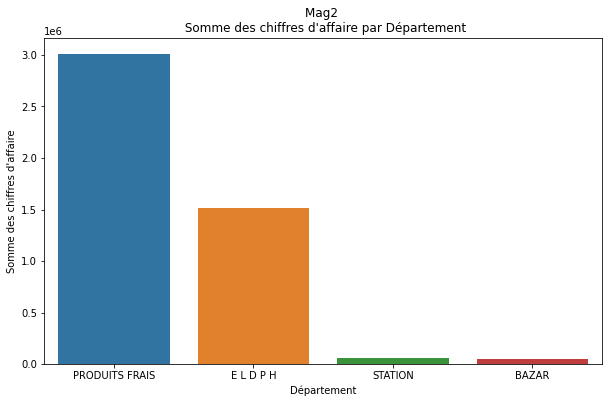

In [144]:
plt.figure(figsize=(10,6))
sns.barplot(x = Mag2.groupby('LIB_DEP')['montant ca '].sum().sort_values(ascending=False).reset_index().head(10)['LIB_DEP'], y=Mag2.groupby('LIB_DEP')['montant ca '].sum().sort_values(ascending=False).reset_index().head(10)['montant ca '])
plt.xlabel('Département')
plt.ylabel("Somme des chiffres d'affaire")
plt.title("Mag2 \n Somme des chiffres d'affaire par Département")
plt.show()

#### Rayon

In [145]:
Mag2.groupby('LIB_RAY')['montant ca '].sum().sort_values(ascending=False).reset_index()

,LIB_RAY,montant ca
0,RAYON TRAD VIANDES INVENTORIEES,1.427712e+06
1,EPICERIE,7.683507e+05
2,LIQUIDES,6.262643e+05
3,CREMERIE FROMAGE SURGELES,6.139089e+05
4,FRUITS ET LEGUMES INVENTORIES,5.802959e+05
5,VIANDES CHARC VOLAILLE TRAIT LS,2.674509e+05
6,D P H,1.167454e+05
7,PRODUITS FRAIS,6.553737e+04
8,STATION,6.294234e+04
9,FROMAGE COUPE INVENTORIE,5.674434e+04


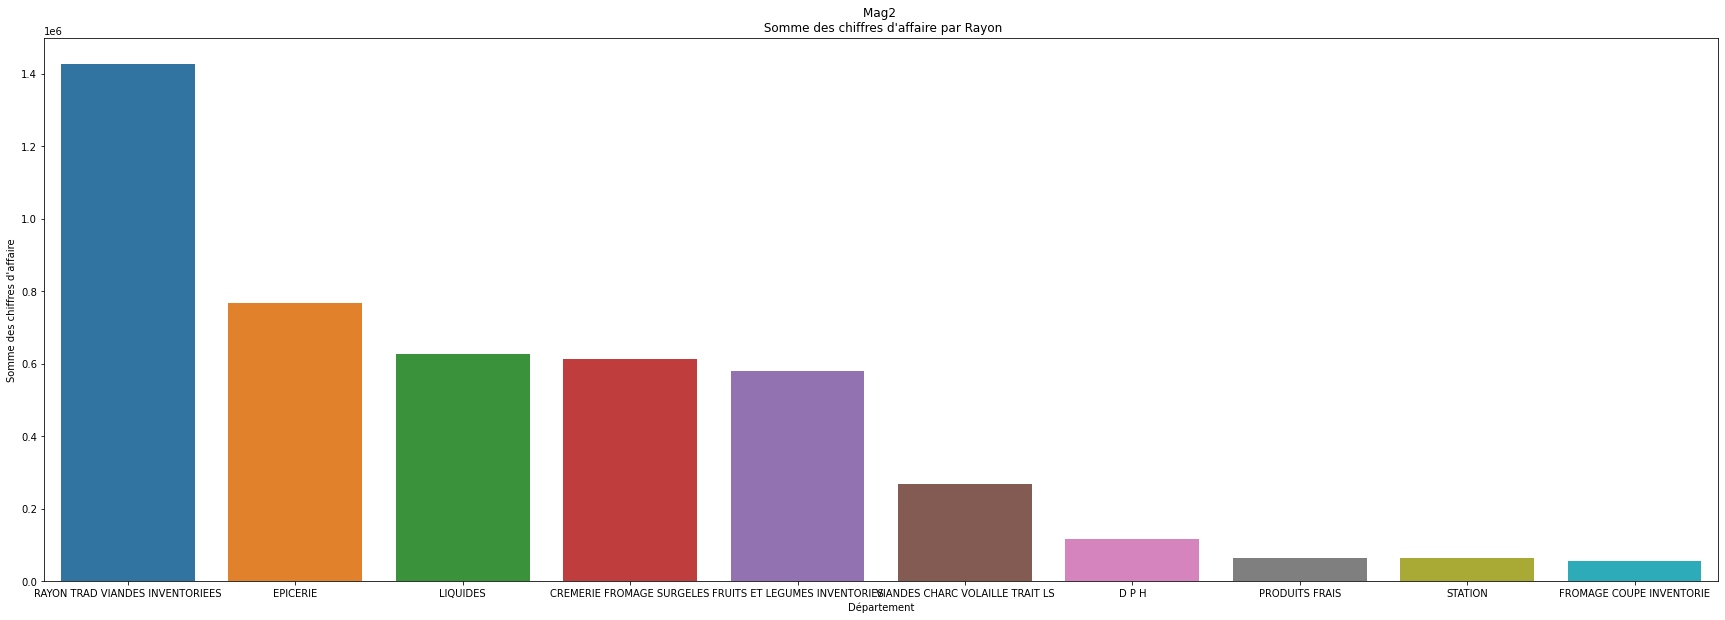

In [146]:
plt.figure(figsize=(30,10))
sns.barplot(x = Mag2.groupby('LIB_RAY')['montant ca '].sum().sort_values(ascending=False).reset_index().head(10)['LIB_RAY'], y=Mag2.groupby('LIB_RAY')['montant ca '].sum().sort_values(ascending=False).reset_index().head(10)['montant ca '])
plt.xlabel('Département')
plt.ylabel("Somme des chiffres d'affaire")
plt.title("Mag2 \n Somme des chiffres d'affaire par Rayon")
plt.show()

#### Famille

In [147]:
Mag2.groupby('LIB_FAM')['montant ca '].sum().sort_values(ascending=False).reset_index().head(10)

,LIB_FAM,montant ca
0,BOUCHERIE TRAD,1.427712e+06
1,FRUITS ET LEGUMES MAGASIN,5.802959e+05
2,CREMERIE FRAICHE,2.847974e+05
3,FROMAGES,1.631040e+05
4,BISC.-PAIN EPICE-PATIS.INDUS.,1.589395e+05
5,BIERES - CIDRES & PANCHES,1.543329e+05
6,LIMONADES-SODAS-JUS DE FRUIT &,1.360876e+05
7,CHARCUT.-SALAIS.-VOLAIL.&GIBIE,1.275127e+05
8,TRAITEUR,1.146770e+05
9,VINS FINS APPEL.ORG. &VINS SUP,1.102761e+05


In [148]:
Mag2.groupby('LIB_FAM')['montant ca '].sum().sort_values(ascending=False).reset_index().tail(10)

,LIB_FAM,montant ca
71,CHAUSSEUR,794.9100
72,POISSONNERIE,702.4935
73,BAS - COLLANTS - CHAUSSETTES,524.8800
74,BIJOUTERIE-HORLOGERIE-FANTAISI,388.8100
75,CHIPS,332.9100
76,MERCERIE,285.2800
77,RECAPE,95.2700
78,GLACES,12.6400
79,VOLAILLES LS,3.0300
80,PETIT ELECTRO MENAGER,2.5500


#### Sous Famille

In [149]:
Mag2.groupby('LIB_SFA')['montant ca '].sum().sort_values(ascending=False).reset_index().head(10)

,LIB_SFA,montant ca
0,BOEUF,336496.71537
1,legumes,316106.81808
2,fruits,265542.40415
3,VOLAILLES,258370.25382
4,Saucisserie base de porc,173689.13942
5,Charc/plats cuis achet,142703.12504
6,Blondes,119998.74000
7,charcuterie cuite,95969.74814
8,PORC,73244.25658
9,gaz,60430.04000


In [150]:
Mag2.groupby('LIB_SFA')['montant ca '].sum().sort_values(ascending=False).reset_index().tail(10)

,LIB_SFA,montant ca
597,coupes de fleurs,5.00
598,Petits-djeuners,4.92
599,Laits,3.84
600,volaille ls,3.03
601,Th en feuilles,2.98
602,Shampooings,2.42
603,Viandes de boeuf et de veau,1.98
604,Pommes,1.65
605,Aliments appertiss en pots,1.62
606,depot vente,-3.34


#### Article

In [151]:
Mag1.groupby('ID_ART')['montant ca '].sum().sort_values(ascending=False).reset_index().head(10)

,ID_ART,montant ca
0,15701,129712.05927
1,20209,52902.19866
2,15508,51034.14303
3,19525,49986.88380
4,15653,49149.51826
5,15497,42874.61265
6,15492,42403.88536
7,18541,41971.54290
8,19506,38233.49340
9,19648,37384.29172


In [152]:
Mag1.groupby('ID_ART')['montant ca '].sum().sort_values(ascending=False).reset_index().tail(10)

,ID_ART,montant ca
7752,29146,0.00
7753,59294,0.00
7754,55700,-0.17
7755,50508,-0.25
7756,14466,-0.64
7757,14389,-4.55
7758,53646,-13.18
7759,14574,-19.32
7760,14357,-70.82
7761,14475,-118.95


## Chiffres d'affaires négatifs

### Mag1

In [153]:
Mag1_ca_neg = Mag1[Mag1['montant ca '] <= 0].sort_values(by='montant ca ', ascending=False)
Mag1_ca_neg['montant ca '].describe()

count    290.000000
mean      -5.460219
std        9.192185
min      -99.780000
25%       -6.005000
50%       -2.645000
75%       -1.230000
max        0.000000
Name: montant ca , dtype: float64

#### Département

In [154]:
Mag1_ca_neg.groupby('LIB_DEP')['montant ca '].sum().sort_values(ascending=True).reset_index().head(10)

,LIB_DEP,montant ca
0,PRODUITS FRAIS,-697.05338
1,E L D P H,-458.77000
2,STATION,-359.29000
3,BAZAR,-68.35000


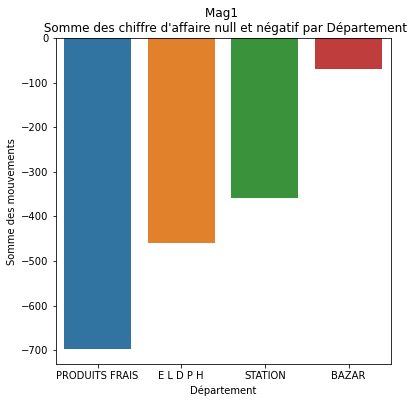

In [155]:
plt.figure(figsize=(6, 6))
sns.barplot(x = Mag1_ca_neg.groupby('LIB_DEP')['montant ca '].sum().sort_values(ascending=True).reset_index().head(10)['LIB_DEP'], y=Mag1_ca_neg.groupby('LIB_DEP')['montant ca '].sum().sort_values(ascending=True).reset_index().head(10)['montant ca '])
plt.xlabel('Département')
plt.ylabel('Somme des mouvements')
plt.title("Mag1 \n Somme des chiffre d'affaire null et négatif par Département")
plt.show()

#### Rayon

In [156]:
Mag1_ca_neg.groupby('LIB_RAY')['montant ca '].sum().sort_values(ascending=True).reset_index()

,LIB_RAY,montant ca
0,FRUITS ET LEGUMES INVENTORIES,-432.20962
1,STATION,-359.29000
2,EPICERIE,-212.32000
3,LIQUIDES,-204.19000
4,RAYON TRAD VIANDES INVENTORIEES,-110.98376
5,CREMERIE FROMAGE SURGELES,-98.73000
6,MARCHANDISE GENERALE,-43.59000
7,D P H,-42.26000
8,VIANDES CHARC VOLAILLE TRAIT LS,-31.80000
9,DIVERS,-24.76000


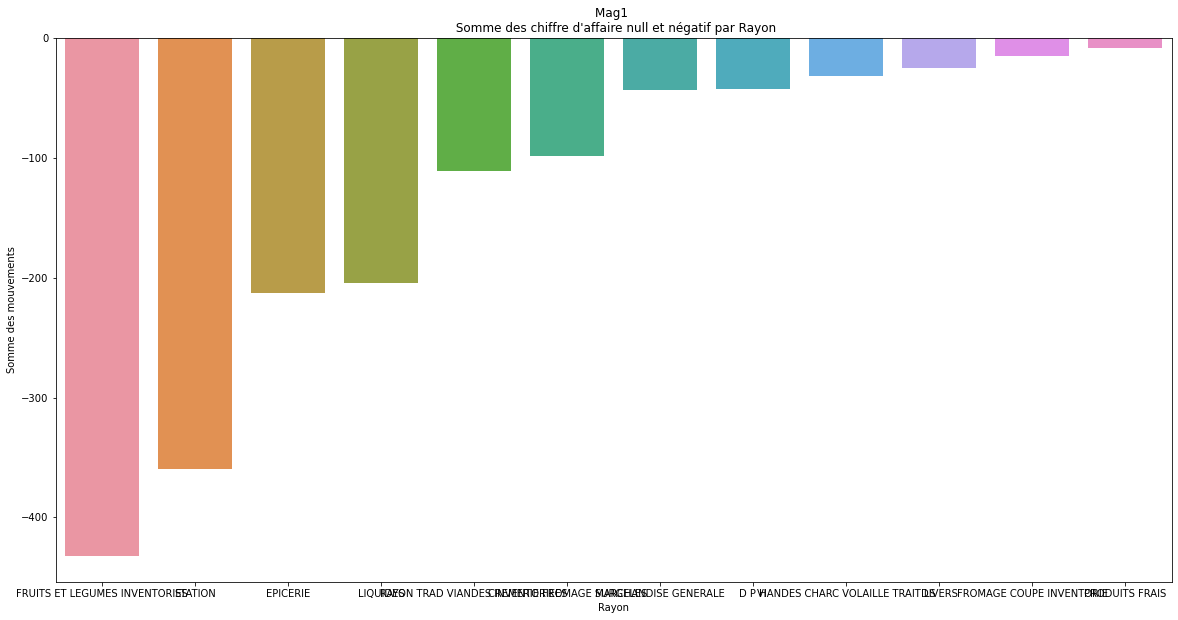

In [157]:
plt.figure(figsize=(20, 10))
sns.barplot(x = Mag1_ca_neg.groupby('LIB_RAY')['montant ca '].sum().sort_values(ascending=True).reset_index()['LIB_RAY'], y=Mag1_ca_neg.groupby('LIB_RAY')['montant ca '].sum().sort_values(ascending=True).reset_index()['montant ca '])
plt.xlabel('Rayon')
plt.ylabel('Somme des mouvements')
plt.title("Mag1 \n Somme des chiffre d'affaire null et négatif par Rayon")
plt.show()

#### Famille

In [158]:
Mag1_ca_neg.groupby('LIB_FAM')['montant ca '].sum().sort_values(ascending=True).reset_index().head(10)

,LIB_FAM,montant ca
0,FRUITS ET LEGUMES MAGASIN,-432.20962
1,CONSIGNES GAZ EXO,-187.00000
2,GAZ,-172.29000
3,VINS FINS APPEL.ORG. &VINS SUP,-127.59000
4,BOUCHERIE TRAD,-110.98376
5,BISCOTTES ET ASSIMILES,-88.47000
6,CAFE - CHICOREE - MALT,-53.05000
7,BIERES - CIDRES & PANCHES,-43.66000
8,POISSONNERIE,-34.27000
9,SOINS DU CORPS,-32.34000


In [159]:
Mag1_ca_neg.groupby('LIB_FAM')['montant ca '].sum().sort_values(ascending=True).reset_index().tail(10)

,LIB_FAM,montant ca
27,THES ET INFUSIONS,-5.86
28,FARINE-PUREE-FECULE-SEMOULE-TA,-5.63
29,LIMONADES-SODAS-JUS DE FRUIT &,-5.22
30,CREMES GLACEES-GLACES & SURGEL,-4.88
31,PRODUIT POUR PETIT DEJEUNERS,-3.04
32,EAUX MINERALES,-1.52
33,APERITIFS,-1.25
34,CONSERVES DE LEGUMES,-0.70
35,CONSERVES RECAPE,-0.64
36,DEPOT DE PAIN,0.00


#### Sous Famille

In [160]:
Mag1_ca_neg.groupby('LIB_SFA')['montant ca '].sum().sort_values(ascending=True).reset_index().head(10)

,LIB_SFA,montant ca
0,fruits,-335.18807
1,CONSIGNES GAZ EXO,-187.00000
2,station,-172.29000
3,Vins ross,-99.78000
4,legumes,-97.02155
5,Biscottes avec sel,-88.47000
6,recape,-73.03000
7,Caf moulu normal,-37.50000
8,Blondes,-36.42000
9,poisson frais ls,-34.27000


In [161]:
Mag1_ca_neg.groupby('LIB_SFA')['montant ca '].sum().sort_values(ascending=True).reset_index().tail(10)

,LIB_SFA,montant ca
56,Confiserie de sucre cuit,-2.40
57,divers confiserie,-2.09
58,"Dentifrices,ptes, poudre&liqu",-2.08
59,Eaux de table plates,-1.52
60,Sodas aux extraits de fruits,-1.42
61,Apritifs aniss,-1.25
62,Sucettes et sucres d'orge,-1.19
63,Petits pois,-0.70
64,recape coffrets,-0.64
65,depot de pain,0.00


#### Article

In [162]:
Mag1_ca_neg.groupby('ID_ART')['montant ca '].sum().sort_values(ascending=True).reset_index().head(10)

,ID_ART,montant ca
0,14437,-262.19
1,14475,-172.29
2,18347,-99.78
3,14357,-88.47
4,27980,-78.00
5,14556,-73.80
6,14445,-73.03
7,28018,-70.00
8,28017,-39.00
9,21769,-36.42


In [163]:
Mag1_ca_neg.groupby('ID_ART')['montant ca '].sum().sort_values(ascending=True).reset_index().tail(10)

,ID_ART,montant ca
109,14553,-0.05376
110,53697,-0.02484
111,14586,-0.02268
112,14582,-0.02046
113,14546,-0.02040
114,14590,-0.01848
115,14561,-0.01816
116,14551,-0.01744
117,28785,-0.01137
118,16672,0.00000


### Mag2

In [164]:
Mag2_ca_neg = Mag2[Mag2['montant ca '] <= 0].sort_values(by='montant ca ', ascending=False)
Mag2_ca_neg['montant ca '].describe()

count    290.000000
mean      -5.460219
std        9.192185
min      -99.780000
25%       -6.005000
50%       -2.645000
75%       -1.230000
max        0.000000
Name: montant ca , dtype: float64

#### Département

In [165]:
Mag2_ca_neg.groupby('LIB_DEP')['montant ca '].sum().sort_values(ascending=True).reset_index().head(10)

,LIB_DEP,montant ca
0,PRODUITS FRAIS,-697.05338
1,E L D P H,-458.77000
2,STATION,-359.29000
3,BAZAR,-68.35000


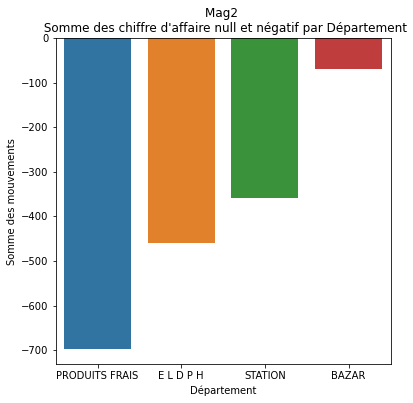

In [166]:
plt.figure(figsize=(6, 6))
sns.barplot(x = Mag2_ca_neg.groupby('LIB_DEP')['montant ca '].sum().sort_values(ascending=True).reset_index().head(10)['LIB_DEP'], y=Mag2_ca_neg.groupby('LIB_DEP')['montant ca '].sum().sort_values(ascending=True).reset_index().head(10)['montant ca '])
plt.xlabel('Département')
plt.ylabel('Somme des mouvements')
plt.title("Mag2 \n Somme des chiffre d'affaire null et négatif par Département")
plt.show()

#### Rayon

In [167]:
Mag2_ca_neg.groupby('LIB_RAY')['montant ca '].sum().sort_values(ascending=True).reset_index()

,LIB_RAY,montant ca
0,FRUITS ET LEGUMES INVENTORIES,-432.20962
1,STATION,-359.29000
2,EPICERIE,-212.32000
3,LIQUIDES,-204.19000
4,RAYON TRAD VIANDES INVENTORIEES,-110.98376
5,CREMERIE FROMAGE SURGELES,-98.73000
6,MARCHANDISE GENERALE,-43.59000
7,D P H,-42.26000
8,VIANDES CHARC VOLAILLE TRAIT LS,-31.80000
9,DIVERS,-24.76000


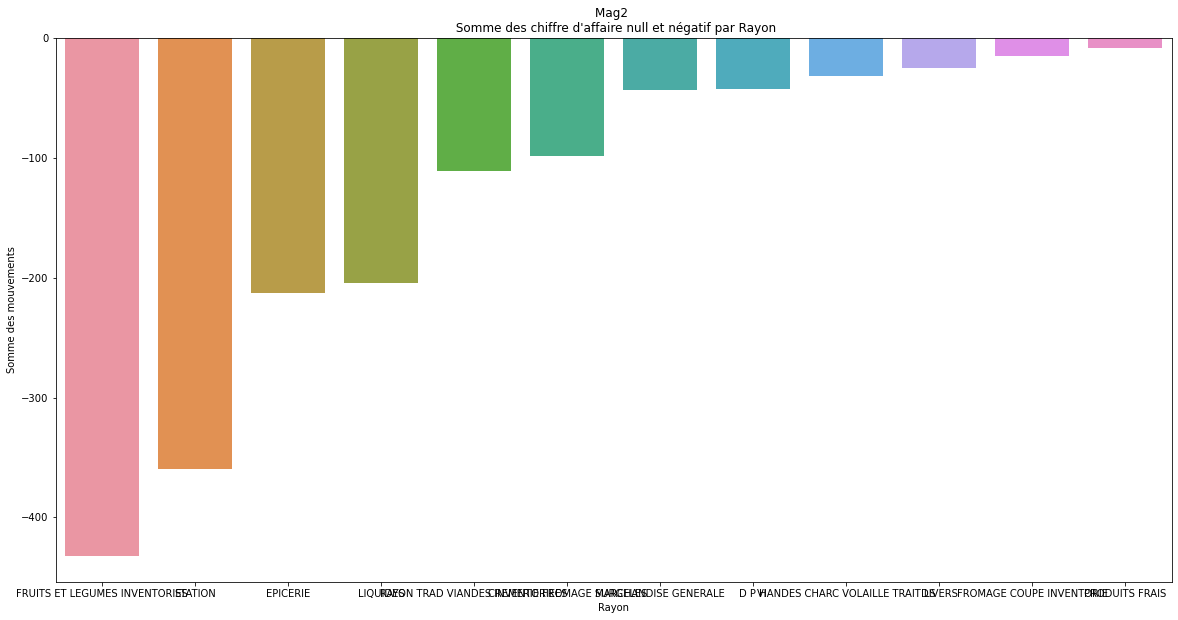

In [168]:
plt.figure(figsize=(20, 10))
sns.barplot(x = Mag2_ca_neg.groupby('LIB_RAY')['montant ca '].sum().sort_values(ascending=True).reset_index()['LIB_RAY'], y=Mag2_ca_neg.groupby('LIB_RAY')['montant ca '].sum().sort_values(ascending=True).reset_index()['montant ca '])
plt.xlabel('Rayon')
plt.ylabel('Somme des mouvements')
plt.title("Mag2 \n Somme des chiffre d'affaire null et négatif par Rayon")
plt.show()

#### Famille

In [169]:
Mag2_ca_neg.groupby('LIB_FAM')['montant ca '].sum().sort_values(ascending=True).reset_index().head(10)

,LIB_FAM,montant ca
0,FRUITS ET LEGUMES MAGASIN,-432.20962
1,CONSIGNES GAZ EXO,-187.00000
2,GAZ,-172.29000
3,VINS FINS APPEL.ORG. &VINS SUP,-127.59000
4,BOUCHERIE TRAD,-110.98376
5,BISCOTTES ET ASSIMILES,-88.47000
6,CAFE - CHICOREE - MALT,-53.05000
7,BIERES - CIDRES & PANCHES,-43.66000
8,POISSONNERIE,-34.27000
9,SOINS DU CORPS,-32.34000


In [170]:
Mag2_ca_neg.groupby('LIB_FAM')['montant ca '].sum().sort_values(ascending=True).reset_index().tail(10)

,LIB_FAM,montant ca
27,THES ET INFUSIONS,-5.86
28,FARINE-PUREE-FECULE-SEMOULE-TA,-5.63
29,LIMONADES-SODAS-JUS DE FRUIT &,-5.22
30,CREMES GLACEES-GLACES & SURGEL,-4.88
31,PRODUIT POUR PETIT DEJEUNERS,-3.04
32,EAUX MINERALES,-1.52
33,APERITIFS,-1.25
34,CONSERVES DE LEGUMES,-0.70
35,CONSERVES RECAPE,-0.64
36,DEPOT DE PAIN,0.00


#### Sous Famille

In [171]:
Mag2_ca_neg.groupby('LIB_SFA')['montant ca '].sum().sort_values(ascending=True).reset_index().head(10)

,LIB_SFA,montant ca
0,fruits,-335.18807
1,CONSIGNES GAZ EXO,-187.00000
2,station,-172.29000
3,Vins ross,-99.78000
4,legumes,-97.02155
5,Biscottes avec sel,-88.47000
6,recape,-73.03000
7,Caf moulu normal,-37.50000
8,Blondes,-36.42000
9,poisson frais ls,-34.27000


In [172]:
Mag2_ca_neg.groupby('LIB_SFA')['montant ca '].sum().sort_values(ascending=True).reset_index().tail(10)

,LIB_SFA,montant ca
56,Confiserie de sucre cuit,-2.40
57,divers confiserie,-2.09
58,"Dentifrices,ptes, poudre&liqu",-2.08
59,Eaux de table plates,-1.52
60,Sodas aux extraits de fruits,-1.42
61,Apritifs aniss,-1.25
62,Sucettes et sucres d'orge,-1.19
63,Petits pois,-0.70
64,recape coffrets,-0.64
65,depot de pain,0.00


#### Article

In [173]:
Mag2_ca_neg.groupby('ID_ART')['montant ca '].sum().sort_values(ascending=True).reset_index().head(10)

,ID_ART,montant ca
0,14437,-262.19
1,14475,-172.29
2,18347,-99.78
3,14357,-88.47
4,27980,-78.00
5,14556,-73.80
6,14445,-73.03
7,28018,-70.00
8,28017,-39.00
9,21769,-36.42


In [174]:
Mag2_ca_neg.groupby('ID_ART')['montant ca '].sum().sort_values(ascending=True).reset_index().tail(10)

,ID_ART,montant ca
109,14553,-0.05376
110,53697,-0.02484
111,14586,-0.02268
112,14582,-0.02046
113,14546,-0.02040
114,14590,-0.01848
115,14561,-0.01816
116,14551,-0.01744
117,28785,-0.01137
118,16672,0.00000


## Les plus grandes différences de chiffre d'affaires pour un produit entre les deux magasins

#### Département

In [175]:
Mag1_dep_ca = Mag1.groupby('LIB_DEP')[['montant ca ']].sum()

In [176]:
Mag2_dep_ca = Mag2.groupby('LIB_DEP')[['montant ca ']].sum()

In [177]:
# Fusionner les deux DataFrames sur la colonne 'ID_ART'
merged_ca_dep = Mag1_dep_ca.merge(Mag2_dep_ca, on='LIB_DEP', suffixes=('_Mag1', '_Mag2'), how='inner')
# Créer une nouvelle colonne avec la différence de marge brute
merged_ca_dep['Difference_ca'] = merged_ca_dep['montant ca _Mag1'] - merged_ca_dep['montant ca _Mag2']
merged_ca_dep.sort_values(by='Difference_ca', ascending=False)

,montant ca _Mag1,montant ca _Mag2,Difference_ca
LIB_DEP,,,
BAZAR,5.275854e+04,5.275854e+04,0.0
E L D P H,1.511360e+06,1.511360e+06,0.0
PRODUITS FRAIS,3.011649e+06,3.011649e+06,0.0
STATION,6.294234e+04,6.294234e+04,0.0


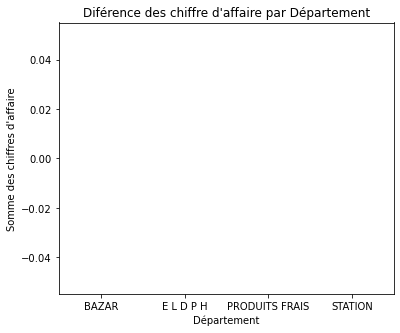

In [178]:
plt.figure(figsize=(6, 5))
sns.barplot(y = merged_ca_dep['Difference_ca'], x=merged_ca_dep.index)
plt.xlabel('Département')
plt.ylabel("Somme des chiffres d'affaire")
plt.title("Diférence des chiffre d'affaire par Département")
plt.show()

#### Rayon

In [179]:
Mag1_ray_ca = Mag1.groupby('LIB_RAY')[['montant ca ']].sum()

In [180]:
Mag2_ray_ca = Mag2.groupby('LIB_RAY')[['montant ca ']].sum()

In [181]:
# Fusionner les deux DataFrames sur la colonne 'ID_ART'
merged_ca_ray = Mag1_ray_ca.merge(Mag2_ray_ca, on='LIB_RAY', suffixes=('_Mag1', '_Mag2'), how='inner')
# Créer une nouvelle colonne avec la différence de marge brute
merged_ca_ray['Difference_ca'] = merged_ca_ray['montant ca _Mag1'] - merged_ca_ray['montant ca _Mag2']
merged_ca_ray.sort_values(by='Difference_ca', ascending=False)

,montant ca _Mag1,montant ca _Mag2,Difference_ca
LIB_RAY,,,
CREMERIE FROMAGE SURGELES,6.139089e+05,6.139089e+05,0.0
D P H,1.167454e+05,1.167454e+05,0.0
DIVERS,6.936880e+03,6.936880e+03,0.0
EPICERIE,7.683507e+05,7.683507e+05,0.0
FROMAGE COUPE INVENTORIE,5.674434e+04,5.674434e+04,0.0
FRUITS ET LEGUMES INVENTORIES,5.802959e+05,5.802959e+05,0.0
LIQUIDES,6.262643e+05,6.262643e+05,0.0
MARCHANDISE GENERALE,4.582166e+04,4.582166e+04,0.0
PRODUITS FRAIS,6.553737e+04,6.553737e+04,0.0


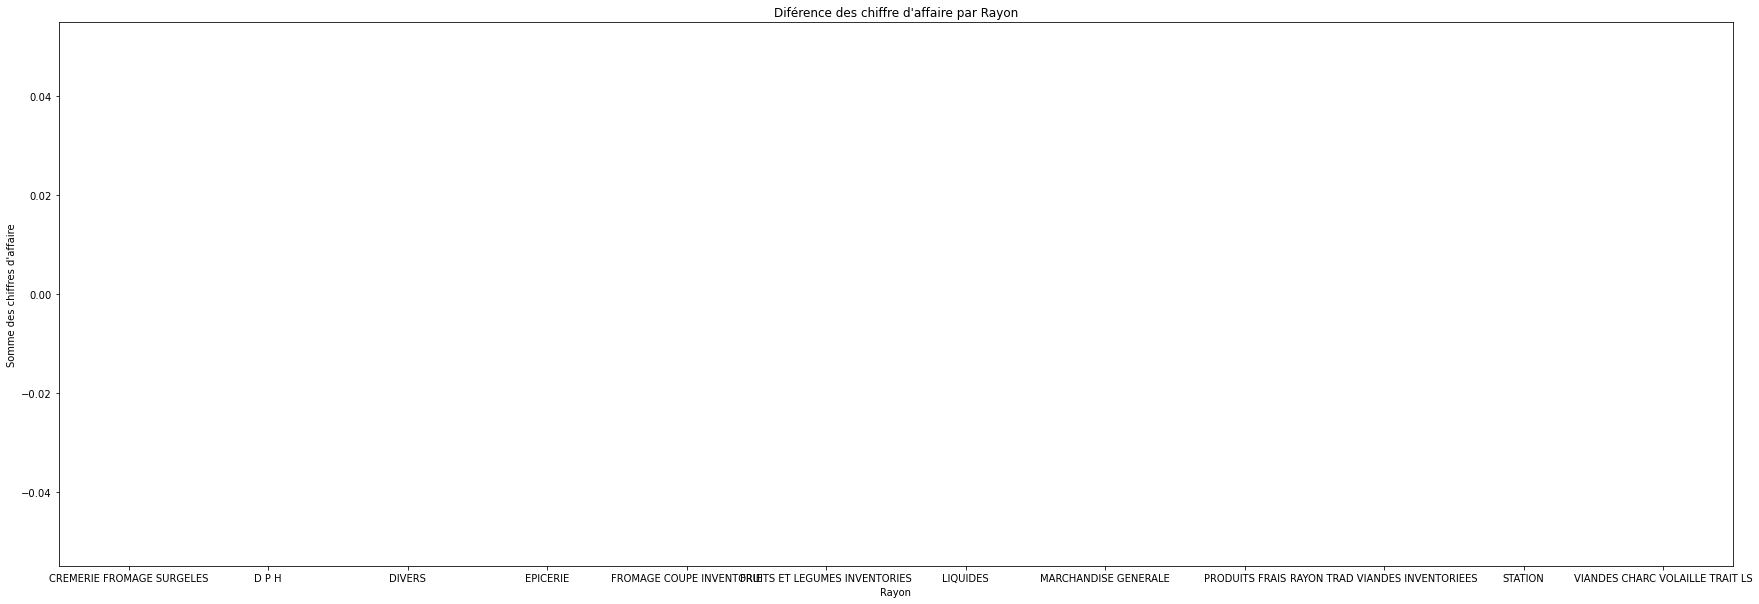

In [182]:
plt.figure(figsize=(30, 10))
sns.barplot(y = merged_ca_ray['Difference_ca'], x=merged_ca_ray.index)
plt.xlabel('Rayon')
plt.ylabel("Somme des chiffres d'affaire")
plt.title("Diférence des chiffre d'affaire par Rayon")
plt.show()

#### Famille

In [183]:
Mag1_fam_ca = Mag1.groupby('LIB_FAM')[['montant ca ']].sum()

In [184]:
Mag2_fam_ca = Mag2.groupby('LIB_FAM')[['montant ca ']].sum()

In [185]:
# Fusionner les deux DataFrames sur la colonne 'ID_ART'
merged_ca_fam = Mag1_fam_ca.merge(Mag2_fam_ca, on='LIB_FAM', suffixes=('_Mag1', '_Mag2'), how='inner')
# Créer une nouvelle colonne avec la différence de marge brute
merged_ca_fam['Difference_ca'] = merged_ca_fam['montant ca _Mag1'] - merged_ca_fam['montant ca _Mag2']
merged_ca_fam.sort_values(by='Difference_ca', ascending=False).head(10)

,montant ca _Mag1,montant ca _Mag2,Difference_ca
LIB_FAM,,,
ALCOOLS-EAUX DE VIE & LIQUEURS,86437.38000,86437.38000,0.0
FRUITS - LEGUMES SECS - RIZ,40262.92365,40262.92365,0.0
PETIT ELECTRO MENAGER,2.55000,2.55000,0.0
PATES ALIMENTAIRES,18232.31000,18232.31000,0.0
PAPETERIE,2382.78000,2382.78000,0.0
PAINS & PATISSERIE FRAICHE,29634.34800,29634.34800,0.0
MERCERIE,285.28000,285.28000,0.0
LIMONADES-SODAS-JUS DE FRUIT &,136087.63000,136087.63000,0.0
LIBRAIRIE,2105.20000,2105.20000,0.0


In [186]:
merged_ca_fam.sort_values(by='Difference_ca', ascending=False).tail(10)

,montant ca _Mag1,montant ca _Mag2,Difference_ca
LIB_FAM,,,
DEPOT VENTE,1234.04,1234.04,0.0
CONSERVES DE LEGUMES,31715.36,31715.36,0.0
DEPOT DE PAIN,41941.86,41941.86,0.0
CREMES GLACEES-GLACES & SURGEL,93716.07,93716.07,0.0
CREMERIE FRAICHE,284797.41,284797.41,0.0
CONSIGNES GAZ EXO,1350.00,1350.00,0.0
CONSERVES RECAPE,26682.74,26682.74,0.0
CONSERVES DE VIANDES,1519.54,1519.54,0.0
CONSERVES DE POISSONS,27162.82,27162.82,0.0


#### Sous Famille

In [187]:
Mag1_sfa_ca = Mag1.groupby('LIB_SFA')[['montant ca ']].sum()

In [188]:
Mag2_sfa_ca = Mag2.groupby('LIB_SFA')[['montant ca ']].sum()

In [189]:
# Fusionner les deux DataFrames sur la colonne 'ID_ART'
merged_ca_sfa = Mag1_sfa_ca.merge(Mag2_sfa_ca, on='LIB_SFA', suffixes=('_Mag1', '_Mag2'), how='inner')
# Créer une nouvelle colonne avec la différence de marge brute
merged_ca_sfa['Difference_ca'] = merged_ca_sfa['montant ca _Mag1'] - merged_ca_sfa['montant ca _Mag2']
merged_ca_sfa.sort_values(by='Difference_ca', ascending=False).head(10)

,montant ca _Mag1,montant ca _Mag2,Difference_ca
LIB_SFA,,,
100% fruits,4659.45,4659.45,0.0
Poivres grains et poudre,1101.16,1101.16,0.0
Pommes de terre,887.43,887.43,0.0
Potages en boites et bricks,7210.74,7210.74,0.0
Potages en sachets dshydrats,2489.24,2489.24,0.0
Poudres,324.74,324.74,0.0
Poudres et cristaux,200.76,200.76,0.0
Poudres et liquides,4712.06,4712.06,0.0
"Poudres,liquides,crme et gel",2713.32,2713.32,0.0


In [190]:
merged_ca_sfa.sort_values(by='Difference_ca', ascending=False).tail(10)

,montant ca _Mag1,montant ca _Mag2,Difference_ca
LIB_SFA,,,
Crmes glaces en vrac,4334.54,4334.54,0.0
"Crmes, mousses et beurres",144.30,144.30,0.0
Cuisins,823.72,823.72,0.0
Cuites,39111.36,39111.36,0.0
Cuve close,665.92,665.92,0.0
Crales,12493.04,12493.04,0.0
DLS,97.46,97.46,0.0
De Pques,5244.08,5244.08,0.0
De couche,2544.82,2544.82,0.0


#### Article

In [196]:
Mag1_art_ca = Mag1.groupby('ID_ART')[['montant ca ']].sum()

In [197]:
Mag2_art_ca = Mag2.groupby('ID_ART')[['montant ca ']].sum()

In [198]:
# Fusionner les deux DataFrames sur la colonne 'ID_ART'
merged_ca = Mag1_art_ca.merge(Mag2_art_ca, on='ID_ART', suffixes=('_Mag1', '_Mag2'), how='inner')
# Créer une nouvelle colonne avec la différence de marge brute
merged_ca['Difference_ca'] = merged_ca['montant ca _Mag1'] - merged_ca['montant ca _Mag2']
merged_ca.sort_values(by='Difference_ca', ascending=False).head(10)

,montant ca _Mag1,montant ca _Mag2,Difference_ca
ID_ART,,,
2,581.22,581.22,0.0
51209,910.32,910.32,0.0
51405,34.65,34.65,0.0
51404,228.90,228.90,0.0
51403,5.10,5.10,0.0
51386,242.92,242.92,0.0
51385,570.60,570.60,0.0
51384,200.60,200.60,0.0
51383,183.02,183.02,0.0


In [199]:
merged_ca.sort_values(by='Difference_ca', ascending=False).tail(10)

,montant ca _Mag1,montant ca _Mag2,Difference_ca
ID_ART,,,
19638,17674.78000,17674.78000,0.0
19637,1596.84000,1596.84000,0.0
19636,1104.30000,1104.30000,0.0
19635,221.66000,221.66000,0.0
19630,3214.38753,3214.38753,0.0
19629,921.36000,921.36000,0.0
19621,620.62000,620.62000,0.0
19615,504.98000,504.98000,0.0
19544,2277.87190,2277.87190,0.0


In [ ]:
dfdsf

# Création des Annexe

In [ ]:
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Paragraph
from reportlab.lib.styles import getSampleStyleSheet
import pandas as pd
from io import BytesIO

## Classement de Marge brute

### Mag1

#### Famille

In [ ]:
df = Mag1.groupby('LIB_FAM')['Marge_brute'].mean().sort_values(ascending=False).reset_index()
# Convertir DataFrame en liste de listes pour le PDF, y compris les index
data_for_table = [list(df.columns)] + [[index] + row.tolist() for index, row in df.iterrows()]

# Créer un objet BytesIO pour stocker le PDF en mémoire
buffer = BytesIO()

# Créer le document PDF
doc = SimpleDocTemplate(buffer, pagesize=letter)

# Créer un titre "Annexe" en dehors du tableau
styles = getSampleStyleSheet()
title = Paragraph("Annexe 1 Classement des marges par famille Mag1 ", styles['Title'])

# Créer le tableau à partir des données DataFrame
table = Table(data_for_table)

# Ajouter le style au tableau (optionnel)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), '#e1e1e1'),  # Première ligne en gris clair
    ('TEXTCOLOR', (0, 0), (-1, 0), '#000000'),  # Couleur du texte de la première ligne
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Alignement central pour tout le tableau
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),  # Police en gras pour la première ligne
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),  # Marge inférieure pour la première ligne
    ('BACKGROUND', (0, 1), (-1, -1), '#f7f7f7'),  # Couleur de fond pour les autres lignes
    ('BOX', (0, 0), (-1, -1), 1, '#000000'),  # Bordure noire pour tout le tableau
    ('GRID', (0, 0), (-1, -1), 1, '#d1d1d1'),  # Grille gris clair pour tout le tableau
]))

# Liste pour contenir les éléments du PDF (titre et tableau)
elements = [title, table]

# Construire le document PDF avec les éléments
doc.build(elements)

# Enregistrer le PDF dans un fichier
with open('Annexe_1_marges_fam_Mag1.pdf', 'wb') as f:
    f.write(buffer.getvalue().decode('latin1').encode('latin1'))


#### Sous Famille

In [ ]:
df = Mag1.groupby('LIB_SFA')['Marge_brute'].mean().sort_values(ascending=False).reset_index()
# Convertir DataFrame en liste de listes pour le PDF, y compris les index
data_for_table = [list(df.columns)] + [[index] + row.tolist() for index, row in df.iterrows()]

# Créer un objet BytesIO pour stocker le PDF en mémoire
buffer = BytesIO()

# Créer le document PDF
doc = SimpleDocTemplate(buffer, pagesize=letter)

# Créer un titre "Annexe" en dehors du tableau
styles = getSampleStyleSheet()
title = Paragraph("Annexe 2 Classement des marges par sous famille Mag1 ", styles['Title'])

# Créer le tableau à partir des données DataFrame
table = Table(data_for_table)

# Ajouter le style au tableau (optionnel)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), '#e1e1e1'),  # Première ligne en gris clair
    ('TEXTCOLOR', (0, 0), (-1, 0), '#000000'),  # Couleur du texte de la première ligne
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Alignement central pour tout le tableau
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),  # Police en gras pour la première ligne
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),  # Marge inférieure pour la première ligne
    ('BACKGROUND', (0, 1), (-1, -1), '#f7f7f7'),  # Couleur de fond pour les autres lignes
    ('BOX', (0, 0), (-1, -1), 1, '#000000'),  # Bordure noire pour tout le tableau
    ('GRID', (0, 0), (-1, -1), 1, '#d1d1d1'),  # Grille gris clair pour tout le tableau
]))

# Liste pour contenir les éléments du PDF (titre et tableau)
elements = [title, table]

# Construire le document PDF avec les éléments
doc.build(elements)

# Enregistrer le PDF dans un fichier
with open('Annexe_2_marges_sfa_Mag1.pdf', 'wb') as f:
    f.write(buffer.getvalue())



#### Article

In [ ]:
RECAPE_ART = pd.read_csv('TABLE_csv/RECAPE_ART.csv', delimiter=';', encoding='latin1')
ref = RECAPE_ART[['LIBELLE','ID_ART']]

In [ ]:
df = Mag1.groupby('ID_ART')['Marge_brute'].mean().sort_values(ascending=False).reset_index()
df =df.merge(ref, on='ID_ART')
# Convertir DataFrame en liste de listes pour le PDF, y compris les index
data_for_table = [list(df.columns)] + [[index] + row.tolist() for index, row in df.iterrows()]

# Créer un objet BytesIO pour stocker le PDF en mémoire
buffer = BytesIO()

# Créer le document PDF
doc = SimpleDocTemplate(buffer, pagesize=letter)

# Créer un titre "Annexe" en dehors du tableau
styles = getSampleStyleSheet()
title = Paragraph("Annexe 3 Classement des marges par Article Mag1 ", styles['Title'])

# Créer le tableau à partir des données DataFrame
table = Table(data_for_table)

# Ajouter le style au tableau (optionnel)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), '#e1e1e1'),  # Première ligne en gris clair
    ('TEXTCOLOR', (0, 0), (-1, 0), '#000000'),  # Couleur du texte de la première ligne
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Alignement central pour tout le tableau
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),  # Police en gras pour la première ligne
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),  # Marge inférieure pour la première ligne
    ('BACKGROUND', (0, 1), (-1, -1), '#f7f7f7'),  # Couleur de fond pour les autres lignes
    ('BOX', (0, 0), (-1, -1), 1, '#000000'),  # Bordure noire pour tout le tableau
    ('GRID', (0, 0), (-1, -1), 1, '#d1d1d1'),  # Grille gris clair pour tout le tableau
]))

# Liste pour contenir les éléments du PDF (titre et tableau)
elements = [title, table]

# Construire le document PDF avec les éléments
doc.build(elements)

# Enregistrer le PDF dans un fichier
with open('Annexe_3_marges_art_Mag1.pdf', 'wb') as f:
    f.write(buffer.getvalue())



### Mag2

#### Famille

In [ ]:
df = Mag2.groupby('LIB_FAM')['Marge_brute'].mean().sort_values(ascending=False).reset_index()
# Convertir DataFrame en liste de listes pour le PDF, y compris les index
data_for_table = [list(df.columns)] + [[index] + row.tolist() for index, row in df.iterrows()]

# Créer un objet BytesIO pour stocker le PDF en mémoire
buffer = BytesIO()

# Créer le document PDF
doc = SimpleDocTemplate(buffer, pagesize=letter)

# Créer un titre "Annexe" en dehors du tableau
styles = getSampleStyleSheet()
title = Paragraph("Annexe 4 Classement des marges par famille Mag2 ", styles['Title'])

# Créer le tableau à partir des données DataFrame
table = Table(data_for_table)

# Ajouter le style au tableau (optionnel)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), '#e1e1e1'),  # Première ligne en gris clair
    ('TEXTCOLOR', (0, 0), (-1, 0), '#000000'),  # Couleur du texte de la première ligne
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Alignement central pour tout le tableau
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),  # Police en gras pour la première ligne
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),  # Marge inférieure pour la première ligne
    ('BACKGROUND', (0, 1), (-1, -1), '#f7f7f7'),  # Couleur de fond pour les autres lignes
    ('BOX', (0, 0), (-1, -1), 1, '#000000'),  # Bordure noire pour tout le tableau
    ('GRID', (0, 0), (-1, -1), 1, '#d1d1d1'),  # Grille gris clair pour tout le tableau
]))

# Liste pour contenir les éléments du PDF (titre et tableau)
elements = [title, table]

# Construire le document PDF avec les éléments
doc.build(elements)

# Enregistrer le PDF dans un fichier
with open('Annexe_4_marges_fam_Mag2.pdf', 'wb') as f:
    f.write(buffer.getvalue())



#### Sous Famille

In [ ]:
df = Mag2.groupby('LIB_SFA')['Marge_brute'].mean().sort_values(ascending=False).reset_index()
# Convertir DataFrame en liste de listes pour le PDF, y compris les index
data_for_table = [list(df.columns)] + [[index] + row.tolist() for index, row in df.iterrows()]

# Créer un objet BytesIO pour stocker le PDF en mémoire
buffer = BytesIO()

# Créer le document PDF
doc = SimpleDocTemplate(buffer, pagesize=letter)

# Créer un titre "Annexe" en dehors du tableau
styles = getSampleStyleSheet()
title = Paragraph("Annexe 5 Classement des marges par sous famille Mag2", styles['Title'])

# Créer le tableau à partir des données DataFrame
table = Table(data_for_table)


# Ajouter le style au tableau (optionnel)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), '#e1e1e1'),  # Première ligne en gris clair
    ('TEXTCOLOR', (0, 0), (-1, 0), '#000000'),  # Couleur du texte de la première ligne
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Alignement central pour tout le tableau
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),  # Police en gras pour la première ligne
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),  # Marge inférieure pour la première ligne
    ('BACKGROUND', (0, 1), (-1, -1), '#f7f7f7'),  # Couleur de fond pour les autres lignes
    ('BOX', (0, 0), (-1, -1), 1, '#000000'),  # Bordure noire pour tout le tableau
    ('GRID', (0, 0), (-1, -1), 1, '#d1d1d1'),  # Grille gris clair pour tout le tableau
]))

# Liste pour contenir les éléments du PDF (titre et tableau)
elements = [title, table]

# Construire le document PDF avec les éléments
doc.build(elements)

# Enregistrer le PDF dans un fichier
with open('Annexe_5_marges_sfa_Mag2.pdf', 'wb') as f:
    f.write(buffer.getvalue().decode('latin1').encode('latin1'))


#### Article

In [ ]:
df = Mag2.groupby('ID_ART')['Marge_brute'].mean().sort_values(ascending=False).reset_index()
df =df.merge(ref, on='ID_ART')
# Convertir DataFrame en liste de listes pour le PDF, y compris les index
data_for_table = [list(df.columns)] + [[index] + row.tolist() for index, row in df.iterrows()]

# Créer un objet BytesIO pour stocker le PDF en mémoire
buffer = BytesIO()

# Créer le document PDF
doc = SimpleDocTemplate(buffer, pagesize=letter)

# Créer un titre "Annexe" en dehors du tableau
styles = getSampleStyleSheet()
title = Paragraph("Annexe 6 Classement des marges par Article Mag2", styles['Title'])

# Créer le tableau à partir des données DataFrame
table = Table(data_for_table)

# Ajouter le style au tableau (optionnel)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), '#e1e1e1'),  # Première ligne en gris clair
    ('TEXTCOLOR', (0, 0), (-1, 0), '#000000'),  # Couleur du texte de la première ligne
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Alignement central pour tout le tableau
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),  # Police en gras pour la première ligne
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),  # Marge inférieure pour la première ligne
    ('BACKGROUND', (0, 1), (-1, -1), '#f7f7f7'),  # Couleur de fond pour les autres lignes
    ('BOX', (0, 0), (-1, -1), 1, '#000000'),  # Bordure noire pour tout le tableau
    ('GRID', (0, 0), (-1, -1), 1, '#d1d1d1'),  # Grille gris clair pour tout le tableau
]))

# Liste pour contenir les éléments du PDF (titre et tableau)
elements = [title, table]

# Construire le document PDF avec les éléments
doc.build(elements)

# Enregistrer le PDF dans un fichier
with open('Annexe_6_marges_art_Mag2.pdf', 'wb') as f:
    f.write(buffer.getvalue())



### Diférence de marge

#### Famille

In [ ]:
df = merged_fam_marge
# Convertir DataFrame en liste de listes pour le PDF, y compris les index
data_for_table = [list(df.columns)] + [[index] + row.tolist() for index, row in df.iterrows()]

# Créer un objet BytesIO pour stocker le PDF en mémoire
buffer = BytesIO()

# Créer le document PDF
doc = SimpleDocTemplate(buffer, pagesize=letter)

# Créer un titre "Annexe" en dehors du tableau
styles = getSampleStyleSheet()
title = Paragraph("Annexe 7 Différence des marges de Mag2 et Mag1 par famille ", styles['Title'])

# Créer le tableau à partir des données DataFrame
table = Table(data_for_table)

# Ajouter le style au tableau (optionnel)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), '#e1e1e1'),  # Première ligne en gris clair
    ('TEXTCOLOR', (0, 0), (-1, 0), '#000000'),  # Couleur du texte de la première ligne
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Alignement central pour tout le tableau
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),  # Police en gras pour la première ligne
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),  # Marge inférieure pour la première ligne
    ('BACKGROUND', (0, 1), (-1, -1), '#f7f7f7'),  # Couleur de fond pour les autres lignes
    ('BOX', (0, 0), (-1, -1), 1, '#000000'),  # Bordure noire pour tout le tableau
    ('GRID', (0, 0), (-1, -1), 1, '#d1d1d1'),  # Grille gris clair pour tout le tableau
]))

# Liste pour contenir les éléments du PDF (titre et tableau)
elements = [title, table]

# Construire le document PDF avec les éléments
doc.build(elements)

# Enregistrer le PDF dans un fichier
with open('Annexe_7_marges_fam_delta.pdf', 'wb') as f:
    f.write(buffer.getvalue())



#### Sous Famille

In [ ]:
df = merged_sfa_marge
# Convertir DataFrame en liste de listes pour le PDF, y compris les index
data_for_table = [list(df.columns)] + [[index] + row.tolist() for index, row in df.iterrows()]

# Créer un objet BytesIO pour stocker le PDF en mémoire
buffer = BytesIO()

# Créer le document PDF
doc = SimpleDocTemplate(buffer, pagesize=letter)

# Créer un titre "Annexe" en dehors du tableau
styles = getSampleStyleSheet()
title = Paragraph("Annexe 8 Différence des marges de Mag2 et Mag1 par sous famille ", styles['Title'])

# Créer le tableau à partir des données DataFrame
table = Table(data_for_table)

# Ajouter le style au tableau (optionnel)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), '#e1e1e1'),  # Première ligne en gris clair
    ('TEXTCOLOR', (0, 0), (-1, 0), '#000000'),  # Couleur du texte de la première ligne
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Alignement central pour tout le tableau
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),  # Police en gras pour la première ligne
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),  # Marge inférieure pour la première ligne
    ('BACKGROUND', (0, 1), (-1, -1), '#f7f7f7'),  # Couleur de fond pour les autres lignes
    ('BOX', (0, 0), (-1, -1), 1, '#000000'),  # Bordure noire pour tout le tableau
    ('GRID', (0, 0), (-1, -1), 1, '#d1d1d1'),  # Grille gris clair pour tout le tableau
]))

# Liste pour contenir les éléments du PDF (titre et tableau)
elements = [title, table]

# Construire le document PDF avec les éléments
doc.build(elements)

# Enregistrer le PDF dans un fichier
with open('Annexe_8_marges_sfa_delta.pdf', 'wb') as f:
    f.write(buffer.getvalue())



#### Article

In [ ]:
df = merged_df
df =df.merge(ref, on='ID_ART')
# Convertir DataFrame en liste de listes pour le PDF, y compris les index
data_for_table = [list(df.columns)] + [[index] + row.tolist() for index, row in df.iterrows()]

# Créer un objet BytesIO pour stocker le PDF en mémoire
buffer = BytesIO()

# Créer le document PDF
doc = SimpleDocTemplate(buffer, pagesize=letter)

# Créer un titre "Annexe" en dehors du tableau
styles = getSampleStyleSheet()
title = Paragraph("Annexe 9 Différence des marges de Mag2 et Mag1 par Article ", styles['Title'])

# Créer le tableau à partir des données DataFrame
table = Table(data_for_table)

# Ajouter le style au tableau (optionnel)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), '#e1e1e1'),  # Première ligne en gris clair
    ('TEXTCOLOR', (0, 0), (-1, 0), '#000000'),  # Couleur du texte de la première ligne
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Alignement central pour tout le tableau
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),  # Police en gras pour la première ligne
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),  # Marge inférieure pour la première ligne
    ('BACKGROUND', (0, 1), (-1, -1), '#f7f7f7'),  # Couleur de fond pour les autres lignes
    ('BOX', (0, 0), (-1, -1), 1, '#000000'),  # Bordure noire pour tout le tableau
    ('GRID', (0, 0), (-1, -1), 1, '#d1d1d1'),  # Grille gris clair pour tout le tableau
]))

# Liste pour contenir les éléments du PDF (titre et tableau)
elements = [title, table]

# Construire le document PDF avec les éléments
doc.build(elements)

# Enregistrer le PDF dans un fichier
with open('Annexe_9_marges_art_delta.pdf', 'wb') as f:
    f.write(buffer.getvalue())



## Nombre de vente

### Mag1

In [ ]:
Mag1.columns

#### Famille

In [ ]:
df = Mag1.groupby('LIB_FAM')['QTE_MVT'].sum().sort_values(ascending=False).reset_index()
# Convertir DataFrame en liste de listes pour le PDF, y compris les index
data_for_table = [list(df.columns)] + [[index] + row.tolist() for index, row in df.iterrows()]

# Créer un objet BytesIO pour stocker le PDF en mémoire
buffer = BytesIO()

# Créer le document PDF
doc = SimpleDocTemplate(buffer, pagesize=letter)

# Créer un titre "Annexe" en dehors du tableau
styles = getSampleStyleSheet()
title = Paragraph("Annexe 10 Classement des mouvements par famille Mag1 ", styles['Title'])

# Créer le tableau à partir des données DataFrame
table = Table(data_for_table)

# Ajouter le style au tableau (optionnel)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), '#e1e1e1'),  # Première ligne en gris clair
    ('TEXTCOLOR', (0, 0), (-1, 0), '#000000'),  # Couleur du texte de la première ligne
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Alignement central pour tout le tableau
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),  # Police en gras pour la première ligne
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),  # Marge inférieure pour la première ligne
    ('BACKGROUND', (0, 1), (-1, -1), '#f7f7f7'),  # Couleur de fond pour les autres lignes
    ('BOX', (0, 0), (-1, -1), 1, '#000000'),  # Bordure noire pour tout le tableau
    ('GRID', (0, 0), (-1, -1), 1, '#d1d1d1'),  # Grille gris clair pour tout le tableau
]))

# Liste pour contenir les éléments du PDF (titre et tableau)
elements = [title, table]

# Construire le document PDF avec les éléments
doc.build(elements)

# Enregistrer le PDF dans un fichier
with open('Annexe_10_mvt_fam_Mag1.pdf', 'wb') as f:
    f.write(buffer.getvalue())



#### Sous Famille

In [ ]:
df = Mag1.groupby('LIB_SFA')['QTE_MVT'].sum().sort_values(ascending=False).reset_index()
# Convertir DataFrame en liste de listes pour le PDF, y compris les index
data_for_table = [list(df.columns)] + [[index] + row.tolist() for index, row in df.iterrows()]

# Créer un objet BytesIO pour stocker le PDF en mémoire
buffer = BytesIO()

# Créer le document PDF
doc = SimpleDocTemplate(buffer, pagesize=letter)

# Créer un titre "Annexe" en dehors du tableau
styles = getSampleStyleSheet()
title = Paragraph("Annexe 11 Classement des mouvements par sous famille Mag1 ", styles['Title'])

# Créer le tableau à partir des données DataFrame
table = Table(data_for_table)

# Ajouter le style au tableau (optionnel)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), '#e1e1e1'),  # Première ligne en gris clair
    ('TEXTCOLOR', (0, 0), (-1, 0), '#000000'),  # Couleur du texte de la première ligne
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Alignement central pour tout le tableau
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),  # Police en gras pour la première ligne
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),  # Marge inférieure pour la première ligne
    ('BACKGROUND', (0, 1), (-1, -1), '#f7f7f7'),  # Couleur de fond pour les autres lignes
    ('BOX', (0, 0), (-1, -1), 1, '#000000'),  # Bordure noire pour tout le tableau
    ('GRID', (0, 0), (-1, -1), 1, '#d1d1d1'),  # Grille gris clair pour tout le tableau
]))

# Liste pour contenir les éléments du PDF (titre et tableau)
elements = [title, table]

# Construire le document PDF avec les éléments
doc.build(elements)

# Enregistrer le PDF dans un fichier
with open('Annexe_11_mvt_sfa_Mag1.pdf', 'wb') as f:
    f.write(buffer.getvalue())



#### Article

In [ ]:
df = Mag1.groupby('ID_ART')['QTE_MVT'].sum().sort_values(ascending=False).reset_index()
df =df.merge(ref, on='ID_ART')
# Convertir DataFrame en liste de listes pour le PDF, y compris les index
data_for_table = [list(df.columns)] + [[index] + row.tolist() for index, row in df.iterrows()]

# Créer un objet BytesIO pour stocker le PDF en mémoire
buffer = BytesIO()

# Créer le document PDF
doc = SimpleDocTemplate(buffer, pagesize=letter)

# Créer un titre "Annexe" en dehors du tableau
styles = getSampleStyleSheet()
title = Paragraph("Annexe 12 Classement des mouvements par sous famille Mag1 ", styles['Title'])

# Créer le tableau à partir des données DataFrame
table = Table(data_for_table)

# Ajouter le style au tableau (optionnel)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), '#e1e1e1'),  # Première ligne en gris clair
    ('TEXTCOLOR', (0, 0), (-1, 0), '#000000'),  # Couleur du texte de la première ligne
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Alignement central pour tout le tableau
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),  # Police en gras pour la première ligne
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),  # Marge inférieure pour la première ligne
    ('BACKGROUND', (0, 1), (-1, -1), '#f7f7f7'),  # Couleur de fond pour les autres lignes
    ('BOX', (0, 0), (-1, -1), 1, '#000000'),  # Bordure noire pour tout le tableau
    ('GRID', (0, 0), (-1, -1), 1, '#d1d1d1'),  # Grille gris clair pour tout le tableau
]))

# Liste pour contenir les éléments du PDF (titre et tableau)
elements = [title, table]

# Construire le document PDF avec les éléments
doc.build(elements)

# Enregistrer le PDF dans un fichier
with open('Annexe_12_mvt_art_Mag1.pdf', 'wb') as f:
    f.write(buffer.getvalue())



### Mag2

#### Famille

In [ ]:
df = Mag2.groupby('LIB_FAM')['QTE_MVT'].sum().sort_values(ascending=False).reset_index()
# Convertir DataFrame en liste de listes pour le PDF, y compris les index
data_for_table = [list(df.columns)] + [[index] + row.tolist() for index, row in df.iterrows()]

# Créer un objet BytesIO pour stocker le PDF en mémoire
buffer = BytesIO()

# Créer le document PDF
doc = SimpleDocTemplate(buffer, pagesize=letter)

# Créer un titre "Annexe" en dehors du tableau
styles = getSampleStyleSheet()
title = Paragraph("Annexe 13 Classement des mouvements par famille Mag2 ", styles['Title'])

# Créer le tableau à partir des données DataFrame
table = Table(data_for_table)

# Ajouter le style au tableau (optionnel)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), '#e1e1e1'),  # Première ligne en gris clair
    ('TEXTCOLOR', (0, 0), (-1, 0), '#000000'),  # Couleur du texte de la première ligne
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Alignement central pour tout le tableau
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),  # Police en gras pour la première ligne
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),  # Marge inférieure pour la première ligne
    ('BACKGROUND', (0, 1), (-1, -1), '#f7f7f7'),  # Couleur de fond pour les autres lignes
    ('BOX', (0, 0), (-1, -1), 1, '#000000'),  # Bordure noire pour tout le tableau
    ('GRID', (0, 0), (-1, -1), 1, '#d1d1d1'),  # Grille gris clair pour tout le tableau
]))

# Liste pour contenir les éléments du PDF (titre et tableau)
elements = [title, table]

# Construire le document PDF avec les éléments
doc.build(elements)

# Enregistrer le PDF dans un fichier
with open('Annexe_13_mvt_fam_Mag2.pdf', 'wb') as f:
    f.write(buffer.getvalue())



#### Sous Famille

In [ ]:
df = Mag2.groupby('LIB_SFA')['QTE_MVT'].sum().sort_values(ascending=False).reset_index()
# Convertir DataFrame en liste de listes pour le PDF, y compris les index
data_for_table = [list(df.columns)] + [[index] + row.tolist() for index, row in df.iterrows()]

# Créer un objet BytesIO pour stocker le PDF en mémoire
buffer = BytesIO()

# Créer le document PDF
doc = SimpleDocTemplate(buffer, pagesize=letter)

# Créer un titre "Annexe" en dehors du tableau
styles = getSampleStyleSheet()
title = Paragraph("Annexe 14 Classement des mouvements par famille Mag2 ", styles['Title'])

# Créer le tableau à partir des données DataFrame
table = Table(data_for_table)

# Ajouter le style au tableau (optionnel)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), '#e1e1e1'),  # Première ligne en gris clair
    ('TEXTCOLOR', (0, 0), (-1, 0), '#000000'),  # Couleur du texte de la première ligne
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Alignement central pour tout le tableau
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),  # Police en gras pour la première ligne
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),  # Marge inférieure pour la première ligne
    ('BACKGROUND', (0, 1), (-1, -1), '#f7f7f7'),  # Couleur de fond pour les autres lignes
    ('BOX', (0, 0), (-1, -1), 1, '#000000'),  # Bordure noire pour tout le tableau
    ('GRID', (0, 0), (-1, -1), 1, '#d1d1d1'),  # Grille gris clair pour tout le tableau
]))

# Liste pour contenir les éléments du PDF (titre et tableau)
elements = [title, table]

# Construire le document PDF avec les éléments
doc.build(elements)

# Enregistrer le PDF dans un fichier
with open('Annexe_14_mvt_sfa_Mag2.pdf', 'wb') as f:
    f.write(buffer.getvalue())



#### Article

In [ ]:
df = Mag2.groupby('ID_ART')['QTE_MVT'].sum().sort_values(ascending=False).reset_index()
df =df.merge(ref, on='ID_ART')
# Convertir DataFrame en liste de listes pour le PDF, y compris les index
data_for_table = [list(df.columns)] + [[index] + row.tolist() for index, row in df.iterrows()]

# Créer un objet BytesIO pour stocker le PDF en mémoire
buffer = BytesIO()

# Créer le document PDF
doc = SimpleDocTemplate(buffer, pagesize=letter)

# Créer un titre "Annexe" en dehors du tableau
styles = getSampleStyleSheet()
title = Paragraph("Annexe 15 Classement des mouvements par sous famille Mag2 ", styles['Title'])

# Créer le tableau à partir des données DataFrame
table = Table(data_for_table)

# Ajouter le style au tableau (optionnel)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), '#e1e1e1'),  # Première ligne en gris clair
    ('TEXTCOLOR', (0, 0), (-1, 0), '#000000'),  # Couleur du texte de la première ligne
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Alignement central pour tout le tableau
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),  # Police en gras pour la première ligne
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),  # Marge inférieure pour la première ligne
    ('BACKGROUND', (0, 1), (-1, -1), '#f7f7f7'),  # Couleur de fond pour les autres lignes
    ('BOX', (0, 0), (-1, -1), 1, '#000000'),  # Bordure noire pour tout le tableau
    ('GRID', (0, 0), (-1, -1), 1, '#d1d1d1'),  # Grille gris clair pour tout le tableau
]))

# Liste pour contenir les éléments du PDF (titre et tableau)
elements = [title, table]

# Construire le document PDF avec les éléments
doc.build(elements)

# Enregistrer le PDF dans un fichier
with open('Annexe_15_mvt_sfa_Mag2.pdf', 'wb') as f:
    f.write(buffer.getvalue())



### Diférence de marge

#### Famille

In [ ]:
df = merged_mvt_fam
# Convertir DataFrame en liste de listes pour le PDF, y compris les index
data_for_table = [list(df.columns)] + [[index] + row.tolist() for index, row in df.iterrows()]

# Créer un objet BytesIO pour stocker le PDF en mémoire
buffer = BytesIO()

# Créer le document PDF
doc = SimpleDocTemplate(buffer, pagesize=letter)

# Créer un titre "Annexe" en dehors du tableau
styles = getSampleStyleSheet()
title = Paragraph("Annexe 16 Différence des mouvements entre Mag2 et Mag1 par famille ", styles['Title'])

# Créer le tableau à partir des données DataFrame
table = Table(data_for_table)

# Ajouter le style au tableau (optionnel)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), '#e1e1e1'),  # Première ligne en gris clair
    ('TEXTCOLOR', (0, 0), (-1, 0), '#000000'),  # Couleur du texte de la première ligne
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Alignement central pour tout le tableau
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),  # Police en gras pour la première ligne
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),  # Marge inférieure pour la première ligne
    ('BACKGROUND', (0, 1), (-1, -1), '#f7f7f7'),  # Couleur de fond pour les autres lignes
    ('BOX', (0, 0), (-1, -1), 1, '#000000'),  # Bordure noire pour tout le tableau
    ('GRID', (0, 0), (-1, -1), 1, '#d1d1d1'),  # Grille gris clair pour tout le tableau
]))

# Liste pour contenir les éléments du PDF (titre et tableau)
elements = [title, table]

# Construire le document PDF avec les éléments
doc.build(elements)

# Enregistrer le PDF dans un fichier
with open('Annexe_16_mvt_fam_delta.pdf', 'wb') as f:
    f.write(buffer.getvalue())



#### Sous Famille

In [ ]:
df = merged_mvt_sfa
# Convertir DataFrame en liste de listes pour le PDF, y compris les index
data_for_table = [list(df.columns)] + [[index] + row.tolist() for index, row in df.iterrows()]

# Créer un objet BytesIO pour stocker le PDF en mémoire
buffer = BytesIO()

# Créer le document PDF
doc = SimpleDocTemplate(buffer, pagesize=letter)

# Créer un titre "Annexe" en dehors du tableau
styles = getSampleStyleSheet()
title = Paragraph("Annexe 17 Différence des mouvements entre Mag2 et Mag1 par sous famille ", styles['Title'])

# Créer le tableau à partir des données DataFrame
table = Table(data_for_table)

# Ajouter le style au tableau (optionnel)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), '#e1e1e1'),  # Première ligne en gris clair
    ('TEXTCOLOR', (0, 0), (-1, 0), '#000000'),  # Couleur du texte de la première ligne
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Alignement central pour tout le tableau
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),  # Police en gras pour la première ligne
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),  # Marge inférieure pour la première ligne
    ('BACKGROUND', (0, 1), (-1, -1), '#f7f7f7'),  # Couleur de fond pour les autres lignes
    ('BOX', (0, 0), (-1, -1), 1, '#000000'),  # Bordure noire pour tout le tableau
    ('GRID', (0, 0), (-1, -1), 1, '#d1d1d1'),  # Grille gris clair pour tout le tableau
]))

# Liste pour contenir les éléments du PDF (titre et tableau)
elements = [title, table]

# Construire le document PDF avec les éléments
doc.build(elements)

# Enregistrer le PDF dans un fichier
with open('Annexe_17_mvt_sfa_delta.pdf', 'wb') as f:
    f.write(buffer.getvalue())



#### Article

In [ ]:
df = merged_mvt_art
df =df.merge(ref, on='ID_ART')
# Convertir DataFrame en liste de listes pour le PDF, y compris les index
data_for_table = [list(df.columns)] + [[index] + row.tolist() for index, row in df.iterrows()]

# Créer un objet BytesIO pour stocker le PDF en mémoire
buffer = BytesIO()

# Créer le document PDF
doc = SimpleDocTemplate(buffer, pagesize=letter)

# Créer un titre "Annexe" en dehors du tableau
styles = getSampleStyleSheet()
title = Paragraph("Annexe 18 Différence des mouvements de Mag2 et Mag1 par Article ", styles['Title'])

# Créer le tableau à partir des données DataFrame
table = Table(data_for_table)

# Ajouter le style au tableau (optionnel)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), '#e1e1e1'),  # Première ligne en gris clair
    ('TEXTCOLOR', (0, 0), (-1, 0), '#000000'),  # Couleur du texte de la première ligne
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Alignement central pour tout le tableau
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),  # Police en gras pour la première ligne
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),  # Marge inférieure pour la première ligne
    ('BACKGROUND', (0, 1), (-1, -1), '#f7f7f7'),  # Couleur de fond pour les autres lignes
    ('BOX', (0, 0), (-1, -1), 1, '#000000'),  # Bordure noire pour tout le tableau
    ('GRID', (0, 0), (-1, -1), 1, '#d1d1d1'),  # Grille gris clair pour tout le tableau
]))

# Liste pour contenir les éléments du PDF (titre et tableau)
elements = [title, table]

# Construire le document PDF avec les éléments
doc.build(elements)

# Enregistrer le PDF dans un fichier
with open('Annexe_18_mvt_sfa_delta.pdf', 'wb') as f:
    f.write(buffer.getvalue())



## Chiffre d'affaire

### Mag1

#### Famille

In [ ]:
df = Mag1.groupby('LIB_FAM')['montant ha '].sum().sort_values(ascending=False).reset_index()
# Convertir DataFrame en liste de listes pour le PDF, y compris les index
data_for_table = [list(df.columns)] + [[index] + row.tolist() for index, row in df.iterrows()]

# Créer un objet BytesIO pour stocker le PDF en mémoire
buffer = BytesIO()

# Créer le document PDF
doc = SimpleDocTemplate(buffer, pagesize=letter)

# Créer un titre "Annexe" en dehors du tableau
styles = getSampleStyleSheet()
title = Paragraph("Annexe 19 Classement des chiffres d'affaire par famille Mag1", styles['Title'])

# Créer le tableau à partir des données DataFrame
table = Table(data_for_table)

# Ajouter le style au tableau (optionnel)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), '#e1e1e1'),  # Première ligne en gris clair
    ('TEXTCOLOR', (0, 0), (-1, 0), '#000000'),  # Couleur du texte de la première ligne
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Alignement central pour tout le tableau
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),  # Police en gras pour la première ligne
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),  # Marge inférieure pour la première ligne
    ('BACKGROUND', (0, 1), (-1, -1), '#f7f7f7'),  # Couleur de fond pour les autres lignes
    ('BOX', (0, 0), (-1, -1), 1, '#000000'),  # Bordure noire pour tout le tableau
    ('GRID', (0, 0), (-1, -1), 1, '#d1d1d1'),  # Grille gris clair pour tout le tableau
]))

# Liste pour contenir les éléments du PDF (titre et tableau)
elements = [title, table]

# Construire le document PDF avec les éléments
doc.build(elements)

# Enregistrer le PDF dans un fichier
with open('Annexe_19_ca_fam_Mag1.pdf', 'wb') as f:
    f.write(buffer.getvalue())



#### Sous Famille

In [ ]:
df = Mag1.groupby('LIB_SFA')['montant ha '].sum().sort_values(ascending=False).reset_index()
# Convertir DataFrame en liste de listes pour le PDF, y compris les index
data_for_table = [list(df.columns)] + [[index] + row.tolist() for index, row in df.iterrows()]

# Créer un objet BytesIO pour stocker le PDF en mémoire
buffer = BytesIO()

# Créer le document PDF
doc = SimpleDocTemplate(buffer, pagesize=letter)

# Créer un titre "Annexe" en dehors du tableau
styles = getSampleStyleSheet()
title = Paragraph("Annexe 20 Classement des chiffres d'affaire par famille Mag1", styles['Title'])

# Créer le tableau à partir des données DataFrame
table = Table(data_for_table)

# Ajouter le style au tableau (optionnel)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), '#e1e1e1'),  # Première ligne en gris clair
    ('TEXTCOLOR', (0, 0), (-1, 0), '#000000'),  # Couleur du texte de la première ligne
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Alignement central pour tout le tableau
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),  # Police en gras pour la première ligne
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),  # Marge inférieure pour la première ligne
    ('BACKGROUND', (0, 1), (-1, -1), '#f7f7f7'),  # Couleur de fond pour les autres lignes
    ('BOX', (0, 0), (-1, -1), 1, '#000000'),  # Bordure noire pour tout le tableau
    ('GRID', (0, 0), (-1, -1), 1, '#d1d1d1'),  # Grille gris clair pour tout le tableau
]))

# Liste pour contenir les éléments du PDF (titre et tableau)
elements = [title, table]

# Construire le document PDF avec les éléments
doc.build(elements)

# Enregistrer le PDF dans un fichier
with open('Annexe_20_ca_sfa_Mag1.pdf', 'wb') as f:
    f.write(buffer.getvalue())



#### Article

In [ ]:
df = Mag2.groupby('ID_ART')['montant ha '].sum().sort_values(ascending=False).reset_index()
df =df.merge(ref, on='ID_ART')
# Convertir DataFrame en liste de listes pour le PDF, y compris les index
data_for_table = [list(df.columns)] + [[index] + row.tolist() for index, row in df.iterrows()]

# Créer un objet BytesIO pour stocker le PDF en mémoire
buffer = BytesIO()

# Créer le document PDF
doc = SimpleDocTemplate(buffer, pagesize=letter)

# Créer un titre "Annexe" en dehors du tableau
styles = getSampleStyleSheet()
title = Paragraph("Annexe 21 Classement des chiffres d'affaire par Article Mag1 ", styles['Title'])

# Créer le tableau à partir des données DataFrame
table = Table(data_for_table)

# Ajouter le style au tableau (optionnel)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), '#e1e1e1'),  # Première ligne en gris clair
    ('TEXTCOLOR', (0, 0), (-1, 0), '#000000'),  # Couleur du texte de la première ligne
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Alignement central pour tout le tableau
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),  # Police en gras pour la première ligne
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),  # Marge inférieure pour la première ligne
    ('BACKGROUND', (0, 1), (-1, -1), '#f7f7f7'),  # Couleur de fond pour les autres lignes
    ('BOX', (0, 0), (-1, -1), 1, '#000000'),  # Bordure noire pour tout le tableau
    ('GRID', (0, 0), (-1, -1), 1, '#d1d1d1'),  # Grille gris clair pour tout le tableau
]))

# Liste pour contenir les éléments du PDF (titre et tableau)
elements = [title, table]

# Construire le document PDF avec les éléments
doc.build(elements)

# Enregistrer le PDF dans un fichier
with open('Annexe_21_ca_art_Mag1.pdf', 'wb') as f:
    f.write(buffer.getvalue())



### Mag2

#### Famille

In [ ]:
df = Mag2.groupby('LIB_FAM')['montant ha '].sum().sort_values(ascending=False).reset_index()
# Convertir DataFrame en liste de listes pour le PDF, y compris les index
data_for_table = [list(df.columns)] + [[index] + row.tolist() for index, row in df.iterrows()]

# Créer un objet BytesIO pour stocker le PDF en mémoire
buffer = BytesIO()

# Créer le document PDF
doc = SimpleDocTemplate(buffer, pagesize=letter)

# Créer un titre "Annexe" en dehors du tableau
styles = getSampleStyleSheet()
title = Paragraph("Annexe 22 Classement des chiffres d'affaire par famille Mag2 ", styles['Title'])

# Créer le tableau à partir des données DataFrame
table = Table(data_for_table)

# Ajouter le style au tableau (optionnel)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), '#e1e1e1'),  # Première ligne en gris clair
    ('TEXTCOLOR', (0, 0), (-1, 0), '#000000'),  # Couleur du texte de la première ligne
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Alignement central pour tout le tableau
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),  # Police en gras pour la première ligne
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),  # Marge inférieure pour la première ligne
    ('BACKGROUND', (0, 1), (-1, -1), '#f7f7f7'),  # Couleur de fond pour les autres lignes
    ('BOX', (0, 0), (-1, -1), 1, '#000000'),  # Bordure noire pour tout le tableau
    ('GRID', (0, 0), (-1, -1), 1, '#d1d1d1'),  # Grille gris clair pour tout le tableau
]))

# Liste pour contenir les éléments du PDF (titre et tableau)
elements = [title, table]

# Construire le document PDF avec les éléments
doc.build(elements)

# Enregistrer le PDF dans un fichier
with open('Annexe_22_ca_fam_Mag2.pdf', 'wb') as f:
    f.write(buffer.getvalue())



#### Sous Famille

In [ ]:
df = Mag2.groupby('LIB_SFA')['montant ha '].sum().sort_values(ascending=False).reset_index()
# Convertir DataFrame en liste de listes pour le PDF, y compris les index
data_for_table = [list(df.columns)] + [[index] + row.tolist() for index, row in df.iterrows()]

# Créer un objet BytesIO pour stocker le PDF en mémoire
buffer = BytesIO()

# Créer le document PDF
doc = SimpleDocTemplate(buffer, pagesize=letter)

# Créer un titre "Annexe" en dehors du tableau
styles = getSampleStyleSheet()
title = Paragraph("Annexe 23 Classement des chiffres d'affaire par famille Mag2 ", styles['Title'])

# Créer le tableau à partir des données DataFrame
table = Table(data_for_table)

# Ajouter le style au tableau (optionnel)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), '#e1e1e1'),  # Première ligne en gris clair
    ('TEXTCOLOR', (0, 0), (-1, 0), '#000000'),  # Couleur du texte de la première ligne
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Alignement central pour tout le tableau
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),  # Police en gras pour la première ligne
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),  # Marge inférieure pour la première ligne
    ('BACKGROUND', (0, 1), (-1, -1), '#f7f7f7'),  # Couleur de fond pour les autres lignes
    ('BOX', (0, 0), (-1, -1), 1, '#000000'),  # Bordure noire pour tout le tableau
    ('GRID', (0, 0), (-1, -1), 1, '#d1d1d1'),  # Grille gris clair pour tout le tableau
]))

# Liste pour contenir les éléments du PDF (titre et tableau)
elements = [title, table]

# Construire le document PDF avec les éléments
doc.build(elements)

# Enregistrer le PDF dans un fichier
with open('Annexe_23_ca_sfa_Mag2.pdf', 'wb') as f:
    f.write(buffer.getvalue())



#### Article

In [ ]:
df = Mag2.groupby('ID_ART')['montant ha '].sum().sort_values(ascending=False).reset_index()
df =df.merge(ref, on='ID_ART')
# Convertir DataFrame en liste de listes pour le PDF, y compris les index
data_for_table = [list(df.columns)] + [[index] + row.tolist() for index, row in df.iterrows()]

# Créer un objet BytesIO pour stocker le PDF en mémoire
buffer = BytesIO()

# Créer le document PDF
doc = SimpleDocTemplate(buffer, pagesize=letter)

# Créer un titre "Annexe" en dehors du tableau
styles = getSampleStyleSheet()
title = Paragraph("Annexe 24 Classement des chiffres d'affaire par Article Mag2 ", styles['Title'])

# Créer le tableau à partir des données DataFrame
table = Table(data_for_table)

# Ajouter le style au tableau (optionnel)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), '#e1e1e1'),  # Première ligne en gris clair
    ('TEXTCOLOR', (0, 0), (-1, 0), '#000000'),  # Couleur du texte de la première ligne
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Alignement central pour tout le tableau
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),  # Police en gras pour la première ligne
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),  # Marge inférieure pour la première ligne
    ('BACKGROUND', (0, 1), (-1, -1), '#f7f7f7'),  # Couleur de fond pour les autres lignes
    ('BOX', (0, 0), (-1, -1), 1, '#000000'),  # Bordure noire pour tout le tableau
    ('GRID', (0, 0), (-1, -1), 1, '#d1d1d1'),  # Grille gris clair pour tout le tableau
]))

# Liste pour contenir les éléments du PDF (titre et tableau)
elements = [title, table]

# Construire le document PDF avec les éléments
doc.build(elements)

# Enregistrer le PDF dans un fichier
with open('Annexe_24_ca_art_Mag2.pdf', 'wb') as f:
    f.write(buffer.getvalue())



### Diférence Chiffre d'affaire

#### Famille

In [ ]:
df = merged_ca_fam
# Convertir DataFrame en liste de listes pour le PDF, y compris les index
data_for_table = [list(df.columns)] + [[index] + row.tolist() for index, row in df.iterrows()]

# Créer un objet BytesIO pour stocker le PDF en mémoire
buffer = BytesIO()

# Créer le document PDF
doc = SimpleDocTemplate(buffer, pagesize=letter)

# Créer un titre "Annexe" en dehors du tableau
styles = getSampleStyleSheet()
title = Paragraph("Annexe 25 Différence chiffres d'affaire entre Mag2 et Mag1 par famille ", styles['Title'])

# Créer le tableau à partir des données DataFrame
table = Table(data_for_table)

# Ajouter le style au tableau (optionnel)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), '#e1e1e1'),  # Première ligne en gris clair
    ('TEXTCOLOR', (0, 0), (-1, 0), '#000000'),  # Couleur du texte de la première ligne
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Alignement central pour tout le tableau
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),  # Police en gras pour la première ligne
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),  # Marge inférieure pour la première ligne
    ('BACKGROUND', (0, 1), (-1, -1), '#f7f7f7'),  # Couleur de fond pour les autres lignes
    ('BOX', (0, 0), (-1, -1), 1, '#000000'),  # Bordure noire pour tout le tableau
    ('GRID', (0, 0), (-1, -1), 1, '#d1d1d1'),  # Grille gris clair pour tout le tableau
]))

# Liste pour contenir les éléments du PDF (titre et tableau)
elements = [title, table]

# Construire le document PDF avec les éléments
doc.build(elements)

# Enregistrer le PDF dans un fichier
with open('Annexe_25_ca_fam_delta.pdf', 'wb') as f:
    f.write(buffer.getvalue())



#### Sous Famille

In [ ]:
df = merged_ca_sfa
# Convertir DataFrame en liste de listes pour le PDF, y compris les index
data_for_table = [list(df.columns)] + [[index] + row.tolist() for index, row in df.iterrows()]

# Créer un objet BytesIO pour stocker le PDF en mémoire
buffer = BytesIO()

# Créer le document PDF
doc = SimpleDocTemplate(buffer, pagesize=letter)

# Créer un titre "Annexe" en dehors du tableau
styles = getSampleStyleSheet()
title = Paragraph("Annexe 26 Différence chiffres d'affaire entre Mag2 et Mag1 par sous famille ", styles['Title'])

# Créer le tableau à partir des données DataFrame
table = Table(data_for_table)

# Ajouter le style au tableau (optionnel)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), '#e1e1e1'),  # Première ligne en gris clair
    ('TEXTCOLOR', (0, 0), (-1, 0), '#000000'),  # Couleur du texte de la première ligne
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Alignement central pour tout le tableau
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),  # Police en gras pour la première ligne
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),  # Marge inférieure pour la première ligne
    ('BACKGROUND', (0, 1), (-1, -1), '#f7f7f7'),  # Couleur de fond pour les autres lignes
    ('BOX', (0, 0), (-1, -1), 1, '#000000'),  # Bordure noire pour tout le tableau
    ('GRID', (0, 0), (-1, -1), 1, '#d1d1d1'),  # Grille gris clair pour tout le tableau
]))

# Liste pour contenir les éléments du PDF (titre et tableau)
elements = [title, table]

# Construire le document PDF avec les éléments
doc.build(elements)

# Enregistrer le PDF dans un fichier
with open('Annexe_26_ca_sfa_delta.pdf', 'wb') as f:
    f.write(buffer.getvalue())



#### Article

In [ ]:
df = merged_ca
df =df.merge(ref, on='ID_ART')
# Convertir DataFrame en liste de listes pour le PDF, y compris les index
data_for_table = [list(df.columns)] + [[index] + row.tolist() for index, row in df.iterrows()]

# Créer un objet BytesIO pour stocker le PDF en mémoire
buffer = BytesIO()

# Créer le document PDF
doc = SimpleDocTemplate(buffer, pagesize=letter)

# Créer un titre "Annexe" en dehors du tableau
styles = getSampleStyleSheet()
title = Paragraph("Annexe 27 Classement des chiffres d'affaire par famille Mag2 ", styles['Title'])

# Créer le tableau à partir des données DataFrame
table = Table(data_for_table)

# Ajouter le style au tableau (optionnel)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), '#e1e1e1'),  # Première ligne en gris clair
    ('TEXTCOLOR', (0, 0), (-1, 0), '#000000'),  # Couleur du texte de la première ligne
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Alignement central pour tout le tableau
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),  # Police en gras pour la première ligne
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),  # Marge inférieure pour la première ligne
    ('BACKGROUND', (0, 1), (-1, -1), '#f7f7f7'),  # Couleur de fond pour les autres lignes
    ('BOX', (0, 0), (-1, -1), 1, '#000000'),  # Bordure noire pour tout le tableau
    ('GRID', (0, 0), (-1, -1), 1, '#d1d1d1'),  # Grille gris clair pour tout le tableau
]))

# Liste pour contenir les éléments du PDF (titre et tableau)
elements = [title, table]

# Construire le document PDF avec les éléments
doc.build(elements)

# Enregistrer le PDF dans un fichier
with open('Annexe_27_ca_art_delta.pdf', 'wb') as f:
    f.write(buffer.getvalue())

